%reload_kedro

catalog.list()

Sales=catalog.load("Sales")
Articles=catalog.load("Articles")

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

In [2]:
Articles = pd.read_csv("../data/01_raw/article_attributes.txt",sep=";")
Sales = pd.read_csv("../data/01_raw/sales.txt",sep=";")

In [3]:
final=pd.merge(Sales,Articles, on = "article",how="outer")

In [4]:
missing_articles =  set(Sales['article']) - set(Articles['article'])
missing_articles

{'IO7646'}

# There is an element in sales that does not exit in the catalog

In [5]:
Sales.query("article == 'IO7646'")["country"].value_counts() # Just Austria has it

country
Austria    123
Name: count, dtype: int64

In [6]:
Sales.query("article == 'IO7646'")

country article  sales  regular_price  current_price     ratio  \
24231  Austria  IO7646     17          25.95          16.95  0.653179   
24232  Austria  IO7646      2          25.95          17.95  0.691715   
24233  Austria  IO7646      2          25.95          25.95  1.000000   
24234  Austria  IO7646      1          25.95          22.95  0.884393   
24235  Austria  IO7646      1          25.95          23.95  0.922929   
...        ...     ...    ...            ...            ...       ...   
24349  Austria  IO7646     11          25.95          11.95  0.460501   
24350  Austria  IO7646     23          25.95           7.95  0.306358   
24351  Austria  IO7646      7          25.95          10.95  0.421965   
24352  Austria  IO7646     42          25.95           7.95  0.306358   
24353  Austria  IO7646      2          25.95          15.95  0.614644   

       retailweek  promo1  promo2  
24231  2014-12-28       1       0  
24232  2015-01-04       0       0  
24233  2015-01-11       0       0  
24234  2015-01-18       0       0  
24235  2015-01-25       0       0  
...           ...     ...     ...  
24349  2017-04-02       0       0  
24350  2017-04-09       0       0  
24351  2017-04-16       0       0  
24352  2017-04-23       0       0  
24353  2017-04-30       0       0  

[123 rows x 9 columns]

In [7]:
Sales.query("article == 'IO7646'").current_price.sum()

1827.8499999999997

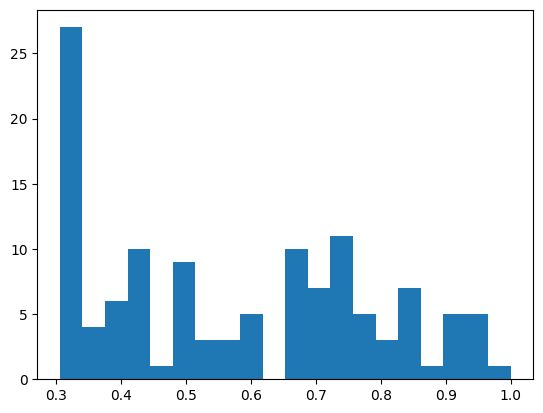

In [8]:

#plt.hist(Sales.query("article == 'IO7646'").current_price,bins=20)
plt.hist(Sales.query("article == 'IO7646'").ratio,bins=20)
plt.show()

In [9]:
Sales["country"].value_counts()

country
Germany    39975
Austria    28782
France     12669
Name: count, dtype: int64

In [10]:
Sales

country article  sales  regular_price  current_price     ratio  \
0      Germany  AA1821     62          31.95          25.95  0.812207   
1      Germany  AA1821     29          31.95          22.95  0.718310   
2      Germany  AA1821     58          31.95          28.95  0.906103   
3      Germany  AA1821     49          31.95          29.95  0.937402   
4      Germany  AA1821    883          31.95          24.95  0.780908   
...        ...     ...    ...            ...            ...       ...   
81421  Germany  ZZ2466    147          63.95          24.95  0.390149   
81422  Germany  ZZ2466    255          63.95          19.95  0.311962   
81423  Germany  ZZ2466     45          63.95          21.95  0.343237   
81424  Germany  ZZ2466     10          63.95          19.95  0.311962   
81425  Germany  ZZ2466    109          63.95          19.95  0.311962   

       retailweek  promo1  promo2  
0      2014-12-28       1       0  
1      2015-01-04       0       0  
2      2015-01-11       0       0  
3      2015-01-18       0       0  
4      2015-01-25       0       0  
...           ...     ...     ...  
81421  2017-04-02       0       0  
81422  2017-04-09       0       0  
81423  2017-04-16       0       0  
81424  2017-04-23       0       0  
81425  2017-04-30       0       0  

[81426 rows x 9 columns]

In [11]:
from ydata_profiling import ProfileReport

In [12]:
profile = ProfileReport(final, title="Profiling Report",explorative=True, correlations={
        "auto": {"calculate": True},
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    })

In [13]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the pearson correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"pearson": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Germany'')
  warnings.warn(
/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the spearman correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"spearman": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
final[["cost","regular_price"]]

cost  regular_price
0       3.2          31.95
1       3.2          31.95
2       3.2          31.95
3       3.2          31.95
4       3.2          31.95
...     ...            ...
81421   6.4          63.95
81422   6.4          63.95
81423   6.4          63.95
81424   6.4          63.95
81425   6.4          63.95

[81426 rows x 2 columns]

In [37]:
( final["cost"]*10-final["regular_price"] ).sum()

-214518.1500000001

In [41]:
final.groupby("country")[["cost","regular_price"]].sum()

cost  regular_price
country                          
Austria  145753.77     1503588.90
France    56810.01      732323.55
Germany  204134.49     2048780.25

In [44]:
-204134.49*10+2048780.25

7435.350000000093

In [67]:
final

country article  sales  regular_price  current_price     ratio  \
0      Germany  AA1821     62          31.95          25.95  0.812207   
1      Germany  AA1821     29          31.95          22.95  0.718310   
2      Germany  AA1821     58          31.95          28.95  0.906103   
3      Germany  AA1821     49          31.95          29.95  0.937402   
4      Germany  AA1821    883          31.95          24.95  0.780908   
...        ...     ...    ...            ...            ...       ...   
81421  Germany  ZZ2466    147          63.95          24.95  0.390149   
81422  Germany  ZZ2466    255          63.95          19.95  0.311962   
81423  Germany  ZZ2466     45          63.95          21.95  0.343237   
81424  Germany  ZZ2466     10          63.95          19.95  0.311962   
81425  Germany  ZZ2466    109          63.95          19.95  0.311962   

       retailweek  promo1  promo2 productgroup  ... cost    style  \
0      2014-12-28       1       0     T-SHIRTS  ...  3.2     wide   
1      2015-01-04       0       0     T-SHIRTS  ...  3.2     wide   
2      2015-01-11       0       0     T-SHIRTS  ...  3.2     wide   
3      2015-01-18       0       0     T-SHIRTS  ...  3.2     wide   
4      2015-01-25       0       0     T-SHIRTS  ...  3.2     wide   
...           ...     ...     ...          ...  ...  ...      ...   
81421  2017-04-02       0       0        SHOES  ...  6.4  regular   
81422  2017-04-09       0       0        SHOES  ...  6.4  regular   
81423  2017-04-16       0       0        SHOES  ...  6.4  regular   
81424  2017-04-23       0       0        SHOES  ...  6.4  regular   
81425  2017-04-30       0       0        SHOES  ...  6.4  regular   

                     sizes  gender rgb_r_main_col  rgb_g_main_col  \
0             s,m,l,xl,xxl  unisex          205.0           133.0   
1             s,m,l,xl,xxl  unisex          205.0           133.0   
2             s,m,l,xl,xxl  unisex          205.0           133.0   
3             s,m,l,xl,xxl  unisex          205.0           133.0   
4             s,m,l,xl,xxl  unisex          205.0           133.0   
...                    ...     ...            ...             ...   
81421  xxs,xs,s,m,l,xl,xxl   women          174.0           238.0   
81422  xxs,xs,s,m,l,xl,xxl   women          174.0           238.0   
81423  xxs,xs,s,m,l,xl,xxl   women          174.0           238.0   
81424  xxs,xs,s,m,l,xl,xxl   women          174.0           238.0   
81425  xxs,xs,s,m,l,xl,xxl   women          174.0           238.0   

       rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  
0                63.0           79.0           79.0           79.0  
1                63.0           79.0           79.0           79.0  
2                63.0           79.0           79.0           79.0  
3                63.0           79.0           79.0           79.0  
4                63.0           79.0           79.0           79.0  
...               ...            ...            ...            ...  
81421           238.0          139.0           76.0           57.0  
81422           238.0          139.0           76.0           57.0  
81423           238.0          139.0           76.0           57.0  
81424           238.0          139.0           76.0           57.0  
81425           238.0          139.0           76.0           57.0  

[81426 rows x 21 columns]

In [14]:
countries =  ['Germany','Austria','France']
df_countries=[]
for i in countries:
    df_countries.append(final.query(f"country == '{i}'").set_index("retailweek").sort_index())
df_countries

[            country article  sales  regular_price  current_price     ratio  \
 retailweek                                                                   
 2014-12-28  Germany  AA1821     62          31.95          25.95  0.812207   
 2014-12-28  Germany  PQ4964     24           3.95           2.95  0.746835   
 2014-12-28  Germany  GT5685     21         107.95          62.95  0.583140   
 2014-12-28  Germany  VD4566     49          69.95          52.95  0.756969   
 2014-12-28  Germany  KE3772     20           8.95           5.95  0.664804   
 ...             ...     ...    ...            ...            ...       ...   
 2017-04-30  Germany  WC1828     20          76.95          23.95  0.311241   
 2017-04-30  Germany  FE6641    135           6.95           2.95  0.424460   
 2017-04-30  Germany  AL2298     10          83.95          25.95  0.309113   
 2017-04-30  Germany  CF4856    221          85.95          25.95  0.301920   
 2017-04-30  Germany  ZZ2466    109          63.95  

In [89]:
final.query(f"country == '{i}'")

country article  sales  regular_price  current_price     ratio  \
246    France  AA7884    126          42.95          21.95  0.511059   
247    France  AA7884     50          42.95          30.95  0.720605   
248    France  AA7884     37          42.95          29.95  0.697322   
249    France  AA7884     35          42.95          30.95  0.720605   
250    France  AA7884    250          42.95          27.95  0.650757   
...       ...     ...    ...            ...            ...       ...   
81298  France  ZZ2466     59          67.95          20.95  0.308315   
81299  France  ZZ2466     29          67.95          20.95  0.308315   
81300  France  ZZ2466     16          67.95          28.95  0.426049   
81301  France  ZZ2466     12          67.95          20.95  0.308315   
81302  France  ZZ2466     41          67.95          20.95  0.308315   

       retailweek  promo1  promo2 productgroup  ... cost    style  \
246    2014-12-28       1       0  SWEATSHIRTS  ...  4.3     slim   
247    2015-01-04       0       0  SWEATSHIRTS  ...  4.3     slim   
248    2015-01-11       0       0  SWEATSHIRTS  ...  4.3     slim   
249    2015-01-18       0       0  SWEATSHIRTS  ...  4.3     slim   
250    2015-01-25       0       1  SWEATSHIRTS  ...  4.3     slim   
...           ...     ...     ...          ...  ...  ...      ...   
81298  2017-04-02       0       0        SHOES  ...  6.4  regular   
81299  2017-04-09       0       0        SHOES  ...  6.4  regular   
81300  2017-04-16       0       0        SHOES  ...  6.4  regular   
81301  2017-04-23       0       0        SHOES  ...  6.4  regular   
81302  2017-04-30       0       0        SHOES  ...  6.4  regular   

                     sizes gender rgb_r_main_col  rgb_g_main_col  \
246    xxs,xs,s,m,l,xl,xxl    men          205.0           155.0   
247    xxs,xs,s,m,l,xl,xxl    men          205.0           155.0   
248    xxs,xs,s,m,l,xl,xxl    men          205.0           155.0   
249    xxs,xs,s,m,l,xl,xxl    men          205.0           155.0   
250    xxs,xs,s,m,l,xl,xxl    men          205.0           155.0   
...                    ...    ...            ...             ...   
81298  xxs,xs,s,m,l,xl,xxl  women          174.0           238.0   
81299  xxs,xs,s,m,l,xl,xxl  women          174.0           238.0   
81300  xxs,xs,s,m,l,xl,xxl  women          174.0           238.0   
81301  xxs,xs,s,m,l,xl,xxl  women          174.0           238.0   
81302  xxs,xs,s,m,l,xl,xxl  women          174.0           238.0   

       rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  
246             155.0          245.0          245.0          245.0  
247             155.0          245.0          245.0          245.0  
248             155.0          245.0          245.0          245.0  
249             155.0          245.0          245.0          245.0  
250             155.0          245.0          245.0          245.0  
...               ...            ...            ...            ...  
81298           238.0          139.0           76.0           57.0  
81299           238.0          139.0           76.0           57.0  
81300           238.0          139.0           76.0           57.0  
81301           238.0          139.0           76.0           57.0  
81302           238.0          139.0           76.0           57.0  

[12669 rows x 21 columns]

In [90]:
df_countries[2].groupby('article')[["cost","sales"]].mean()

cost      sales
article                  
AA7884    4.30  91.552846
AC7347    8.70  94.195122
AH6675    4.10  63.203252
AP5568    2.29  24.609756
AR1923    3.00  72.577236
...        ...        ...
ZR3493    3.30  64.943089
ZU5523   10.30  66.674797
ZV2187   11.50  44.853659
ZW6694   10.00  32.333333
ZZ2466    6.40  28.170732

[103 rows x 2 columns]

In [91]:
df_countries[1]

country article  sales  regular_price  current_price     ratio  \
retailweek                                                                   
2014-12-28  Austria  AA7884    297          42.95          19.95  0.464494   
2015-01-04  Austria  AA7884     52          42.95          21.95  0.511059   
2015-01-11  Austria  AA7884     29          42.95          27.95  0.650757   
2015-01-18  Austria  AA7884     10          42.95          28.95  0.674040   
2015-01-25  Austria  AA7884     24          42.95          25.95  0.604191   
...             ...     ...    ...            ...            ...       ...   
2017-04-02  Austria  ZZ2466     22          65.95          42.95  0.651251   
2017-04-09  Austria  ZZ2466     17          65.95          21.95  0.332828   
2017-04-16  Austria  ZZ2466     65          65.95          19.95  0.302502   
2017-04-23  Austria  ZZ2466    122          65.95          19.95  0.302502   
2017-04-30  Austria  ZZ2466     51          65.95          19.95  0.302502   

            promo1  promo2 productgroup  category  cost    style  \
retailweek                                                         
2014-12-28       1       0  SWEATSHIRTS  TRAINING   4.3     slim   
2015-01-04       0       0  SWEATSHIRTS  TRAINING   4.3     slim   
2015-01-11       0       0  SWEATSHIRTS  TRAINING   4.3     slim   
2015-01-18       0       0  SWEATSHIRTS  TRAINING   4.3     slim   
2015-01-25       0       0  SWEATSHIRTS  TRAINING   4.3     slim   
...            ...     ...          ...       ...   ...      ...   
2017-04-02       0       0        SHOES  TRAINING   6.4  regular   
2017-04-09       0       0        SHOES  TRAINING   6.4  regular   
2017-04-16       0       0        SHOES  TRAINING   6.4  regular   
2017-04-23       0       0        SHOES  TRAINING   6.4  regular   
2017-04-30       0       0        SHOES  TRAINING   6.4  regular   

                          sizes gender  rgb_r_main_col  rgb_g_main_col  \
retailweek                                                               
2014-12-28  xxs,xs,s,m,l,xl,xxl    men           205.0           155.0   
2015-01-04  xxs,xs,s,m,l,xl,xxl    men           205.0           155.0   
2015-01-11  xxs,xs,s,m,l,xl,xxl    men           205.0           155.0   
2015-01-18  xxs,xs,s,m,l,xl,xxl    men           205.0           155.0   
2015-01-25  xxs,xs,s,m,l,xl,xxl    men           205.0           155.0   
...                         ...    ...             ...             ...   
2017-04-02  xxs,xs,s,m,l,xl,xxl  women           174.0           238.0   
2017-04-09  xxs,xs,s,m,l,xl,xxl  women           174.0           238.0   
2017-04-16  xxs,xs,s,m,l,xl,xxl  women           174.0           238.0   
2017-04-23  xxs,xs,s,m,l,xl,xxl  women           174.0           238.0   
2017-04-30  xxs,xs,s,m,l,xl,xxl  women           174.0           238.0   

            rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  
retailweek                                                               
2014-12-28           155.0          245.0          245.0          245.0  
2015-01-04           155.0          245.0          245.0          245.0  
2015-01-11           155.0          245.0          245.0          245.0  
2015-01-18           155.0          245.0          245.0          245.0  
2015-01-25           155.0          245.0          245.0          245.0  
...                    ...            ...            ...            ...  
2017-04-02           238.0          139.0           76.0           57.0  
2017-04-09           238.0          139.0           76.0           57.0  
2017-04-16           238.0          139.0           76.0           57.0  
2017-04-23           238.0          139.0           76.0           57.0  
2017-04-30           238.0          139.0           76.0           57.0  

[28782 rows x 20 columns]

In [94]:

tmp=df_countries[1].filter(regex="rgb")

In [98]:
tmp.isna().sum()

rgb_r_main_col    123
rgb_g_main_col    123
rgb_b_main_col    123
rgb_r_sec_col     123
rgb_g_sec_col     123
rgb_b_sec_col     123
dtype: int64

/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.

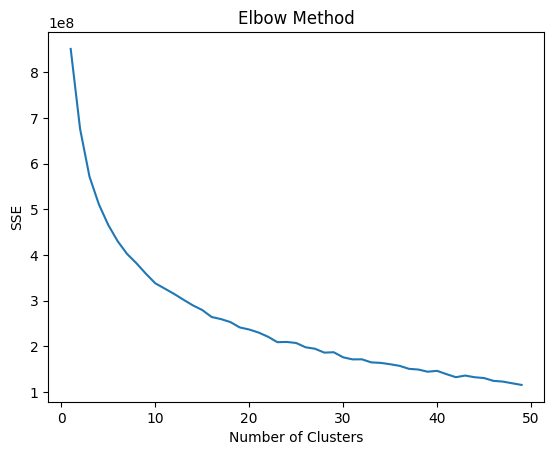

In [108]:

# Import Libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Prepare Data
X = tmp.dropna().values
sse = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 50), sse)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.1967648208860916


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.19300807777483586


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.18680043491384815


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.19247566955789744


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.19634541026905353


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.21193375292014177


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.20882639139187284


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.2151249987229827


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.21616019150563442


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11 The average silhouette_score is : 0.20523646195218415


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12 The average silhouette_score is : 0.21371680089244083


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13 The average silhouette_score is : 0.22674054462104024


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14 The average silhouette_score is : 0.2377337614075565


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.23096202966455093


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 16 The average silhouette_score is : 0.23129217046415426


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 17 The average silhouette_score is : 0.23903500667951655


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 18 The average silhouette_score is : 0.2535527179100146


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 19 The average silhouette_score is : 0.2548145177444179


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 20 The average silhouette_score is : 0.26219862579055375


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 21 The average silhouette_score is : 0.2542501513768514


/var/folders/mk/h79r8lr126vg1cnn05pmrs380000gn/T/ipykernel_1254/4045741968.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1, 1)
/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 22 The average silhouette_score is : 0.26487739624643863


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 23 The average silhouette_score is : 0.27802955960849507


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 24 The average silhouette_score is : 0.27911017398029114


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : 0.26840593632798093


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 26 The average silhouette_score is : 0.2859962729261048


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 27 The average silhouette_score is : 0.29041246159207296


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 28 The average silhouette_score is : 0.2869330082882562


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 29 The average silhouette_score is : 0.2968219200448428


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 30 The average silhouette_score is : 0.29143571642819255


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 31 The average silhouette_score is : 0.2991811576361836


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 32 The average silhouette_score is : 0.31132679022206666


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 33 The average silhouette_score is : 0.2992500627841183


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 34 The average silhouette_score is : 0.3184524976569739


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 35 The average silhouette_score is : 0.3216022399545324


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 36 The average silhouette_score is : 0.3257399698013421


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 37 The average silhouette_score is : 0.32853217582745026


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 38 The average silhouette_score is : 0.3299165433477513


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 39 The average silhouette_score is : 0.3522299255427846


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 40 The average silhouette_score is : 0.3325707914102493


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 41 The average silhouette_score is : 0.3520756141116467


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 42 The average silhouette_score is : 0.3684941627199898


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 43 The average silhouette_score is : 0.35752735243478806


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 44 The average silhouette_score is : 0.361191447260084


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 45 The average silhouette_score is : 0.3649406008316924


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 46 The average silhouette_score is : 0.3756807588295124


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 47 The average silhouette_score is : 0.373679325733287


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 48 The average silhouette_score is : 0.37548773792147616


/Users/jamontanac/miniconda3/envs/dsCase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 49 The average silhouette_score is : 0.3820637226383193


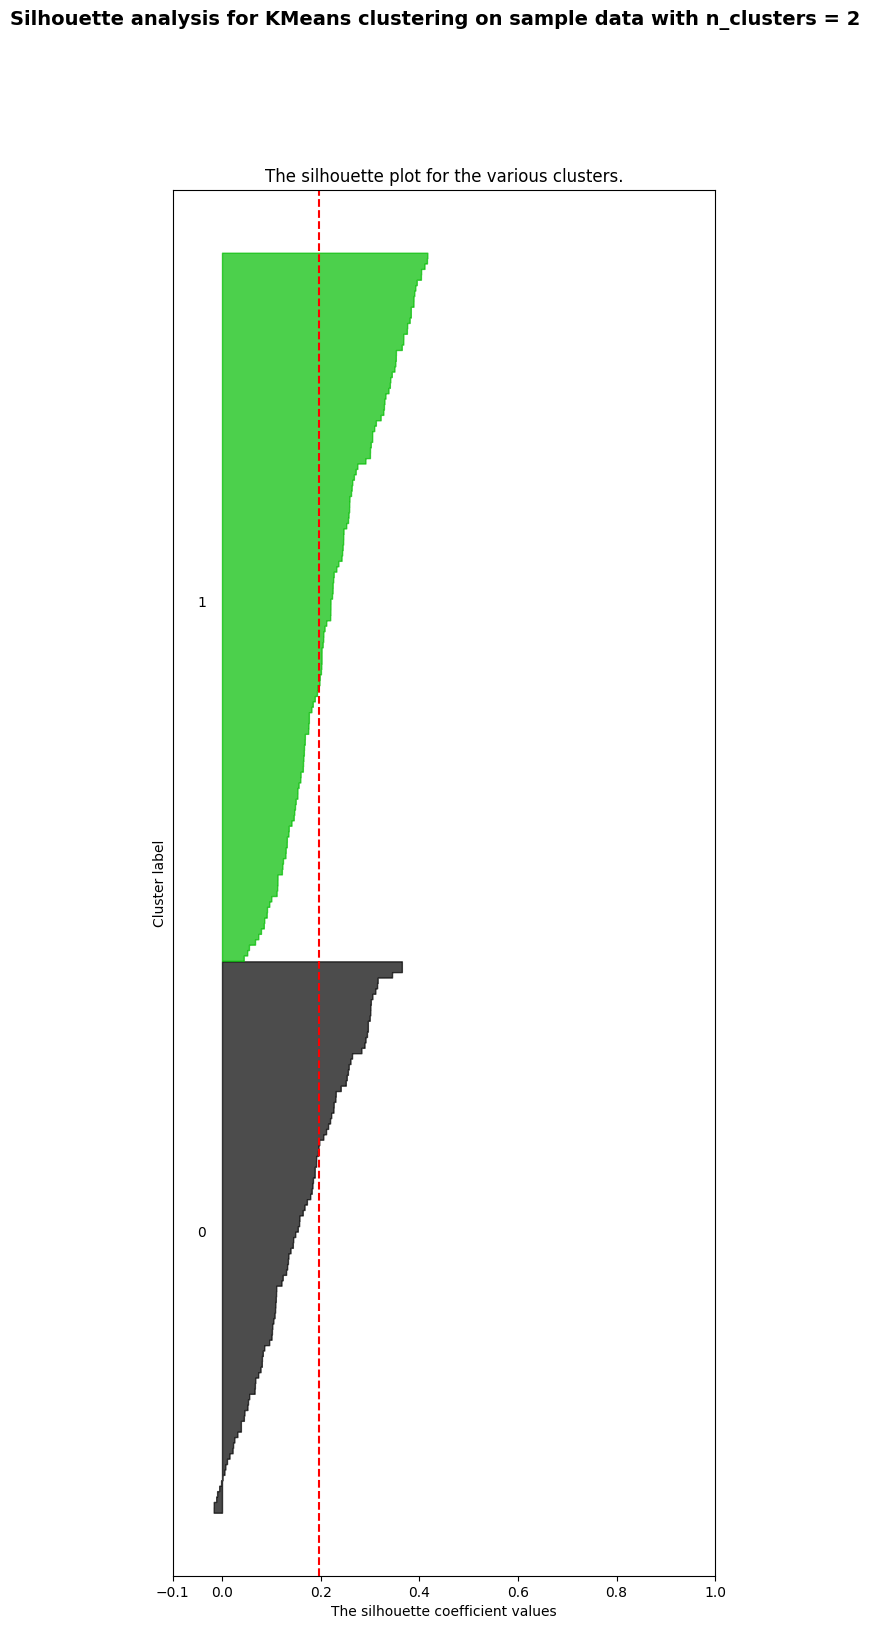

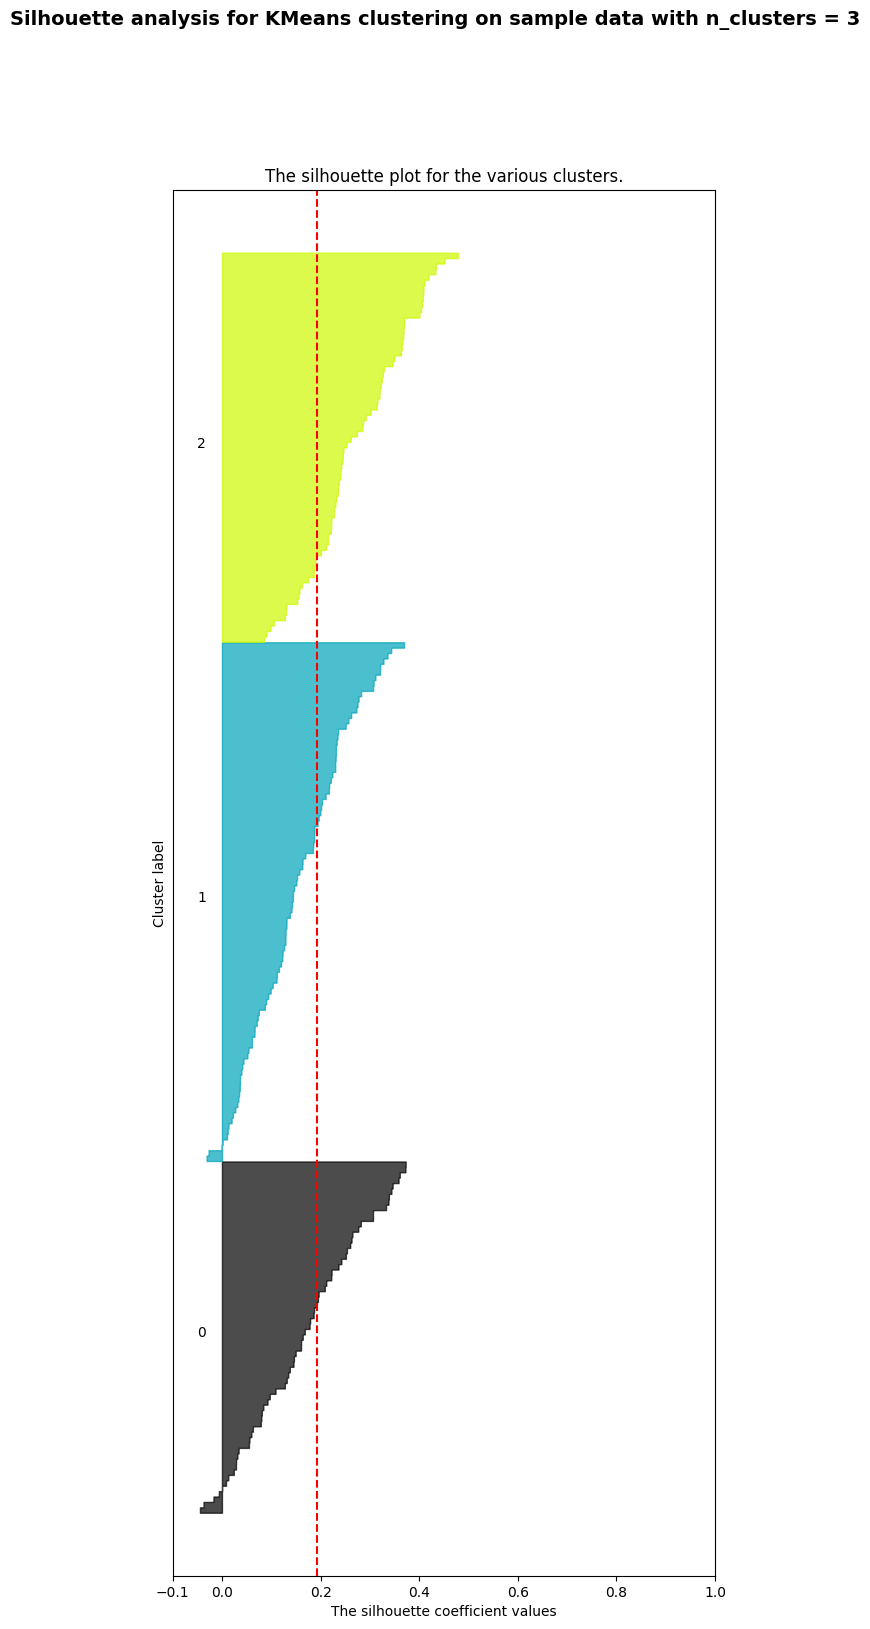

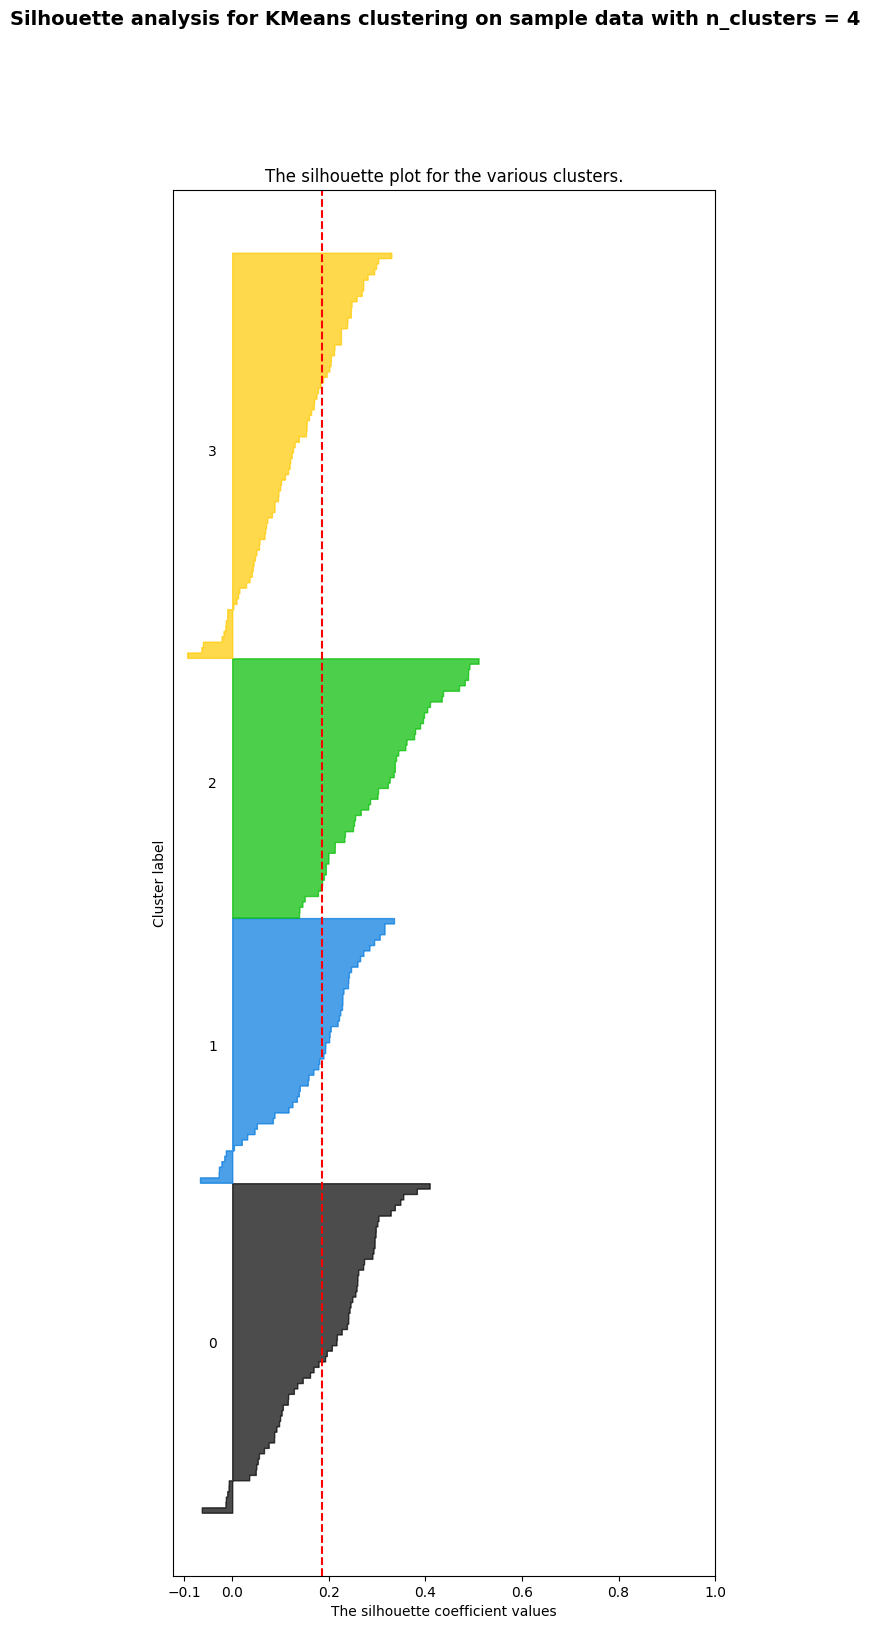

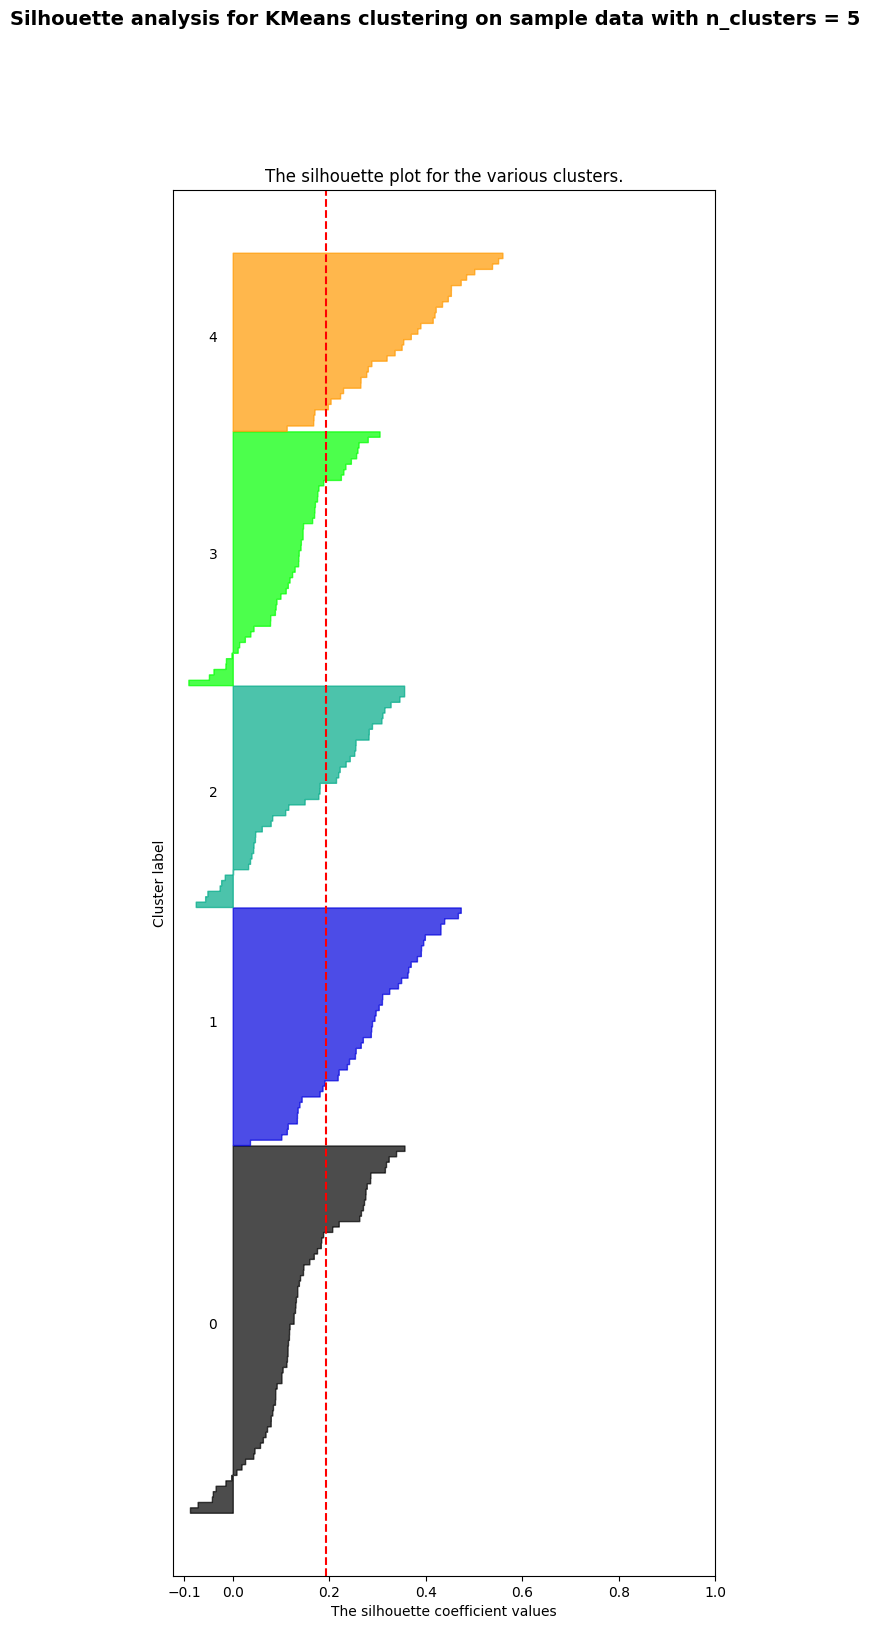

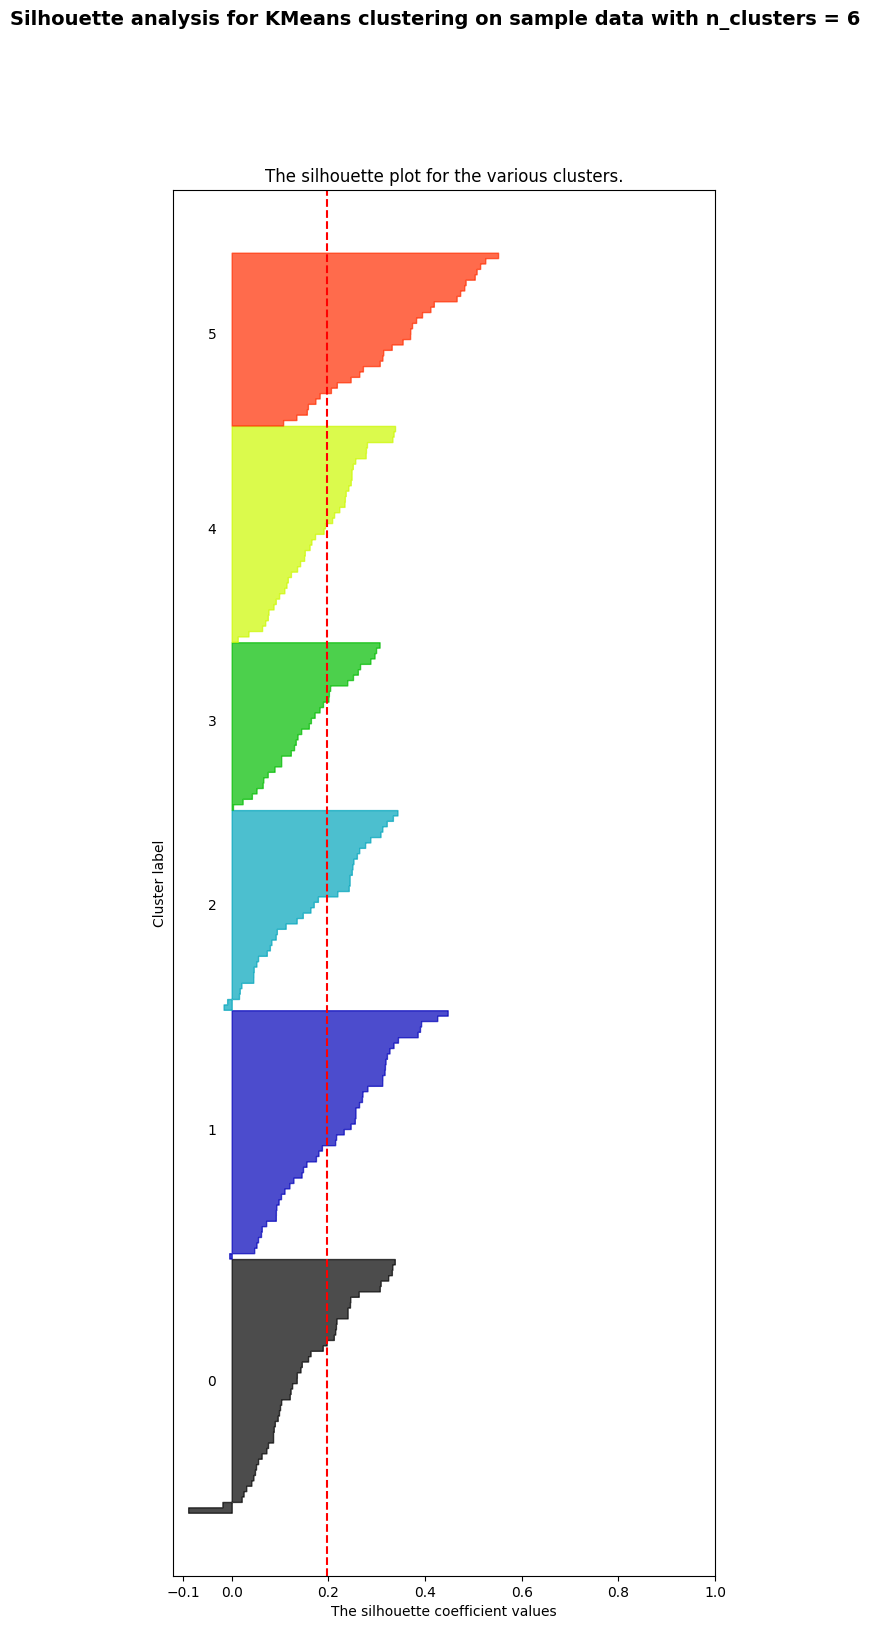

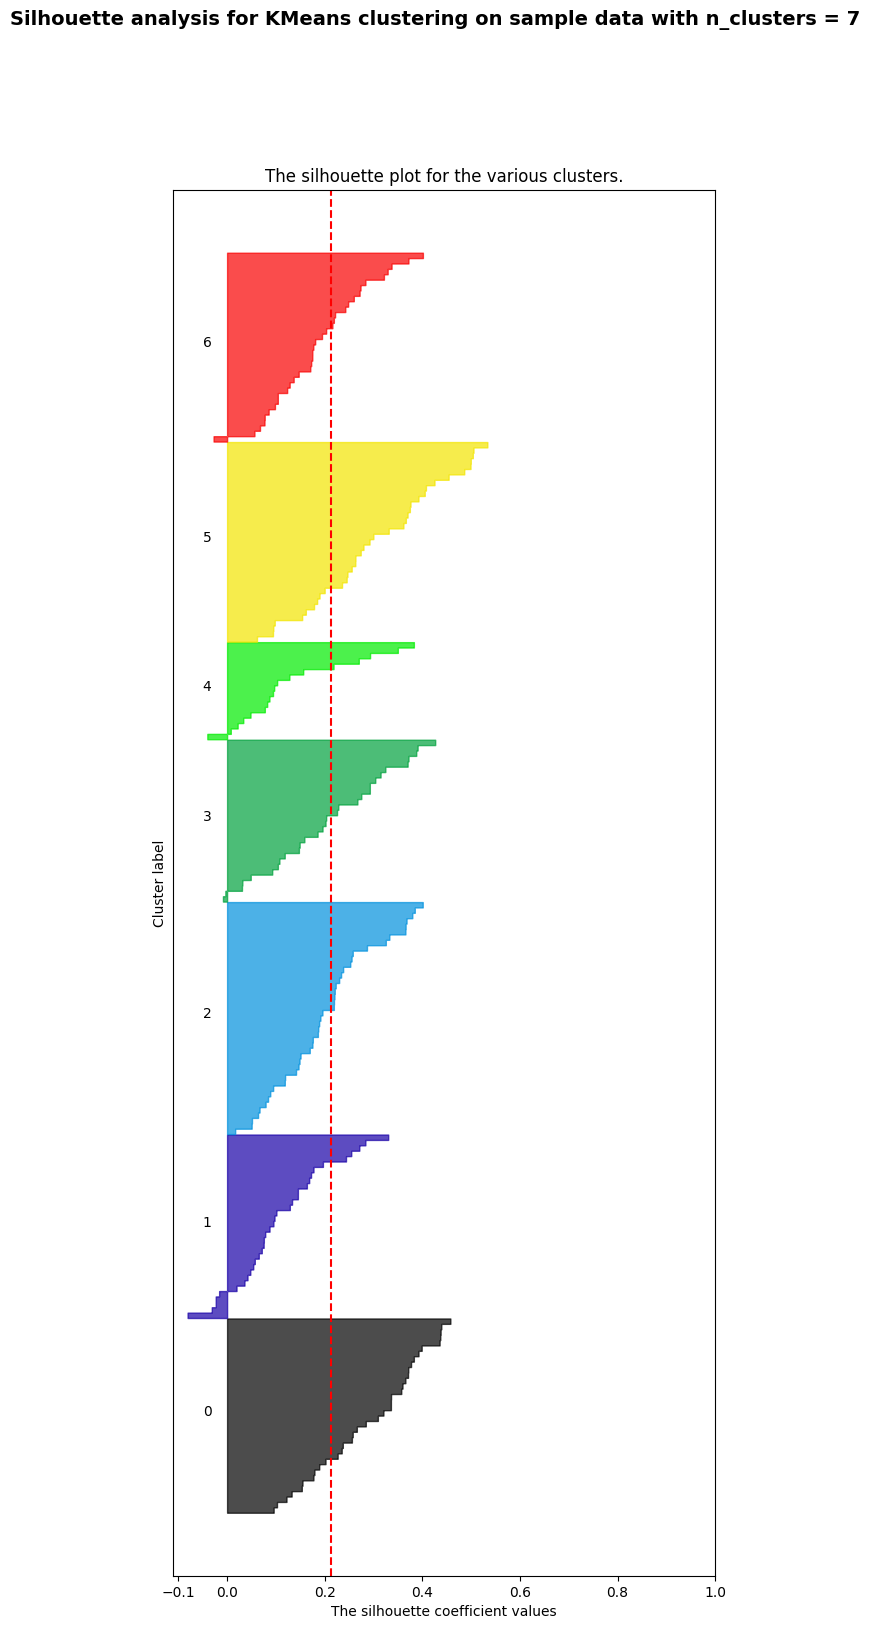

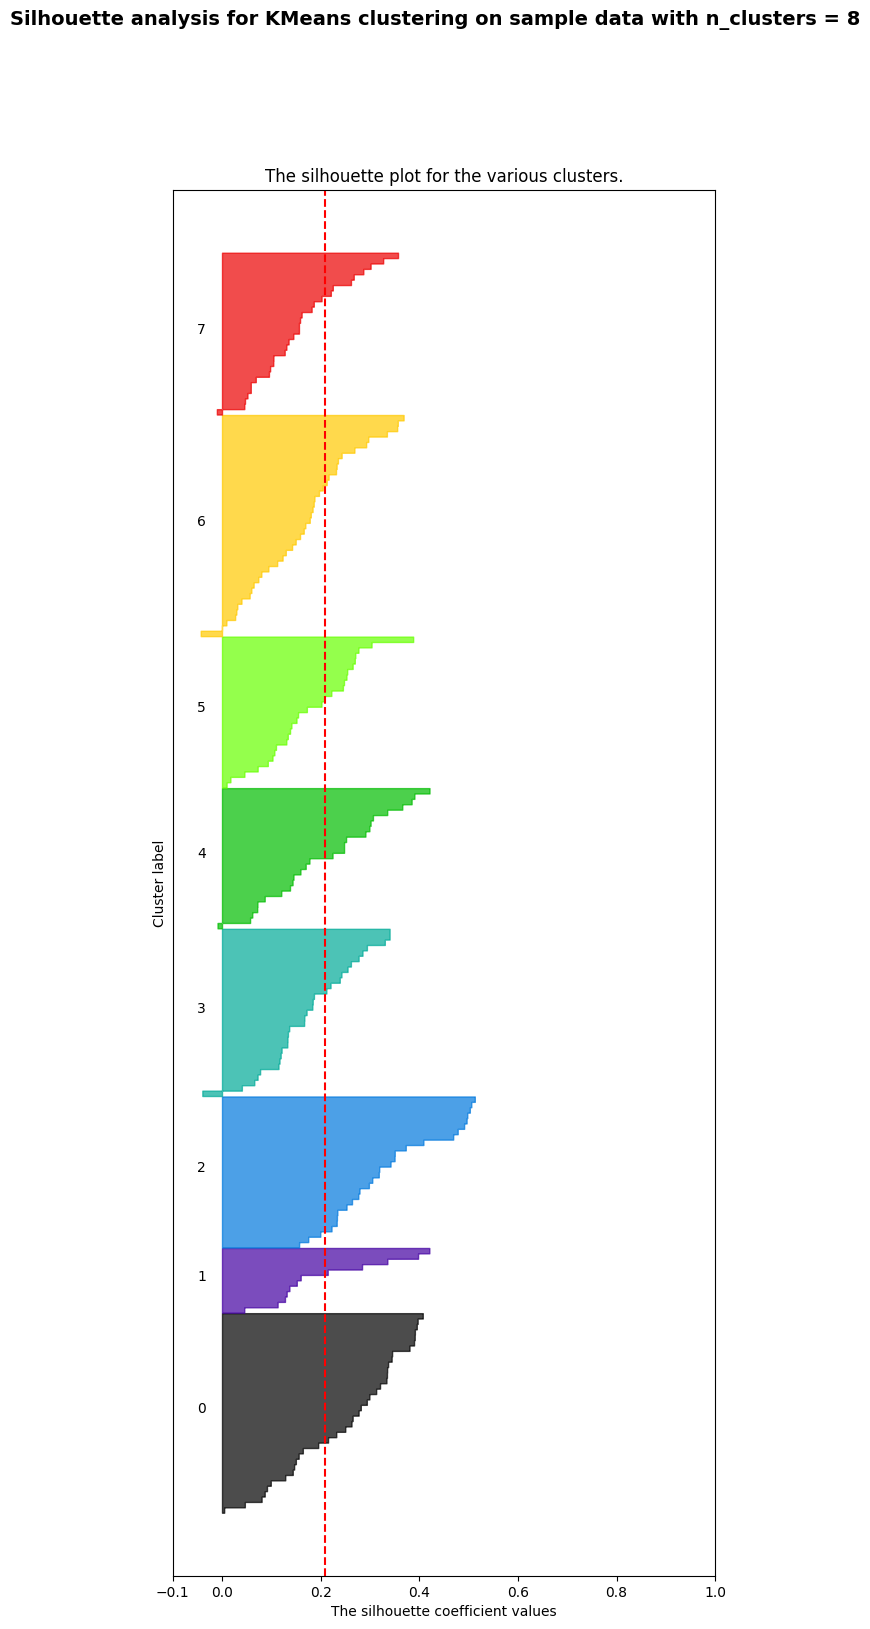

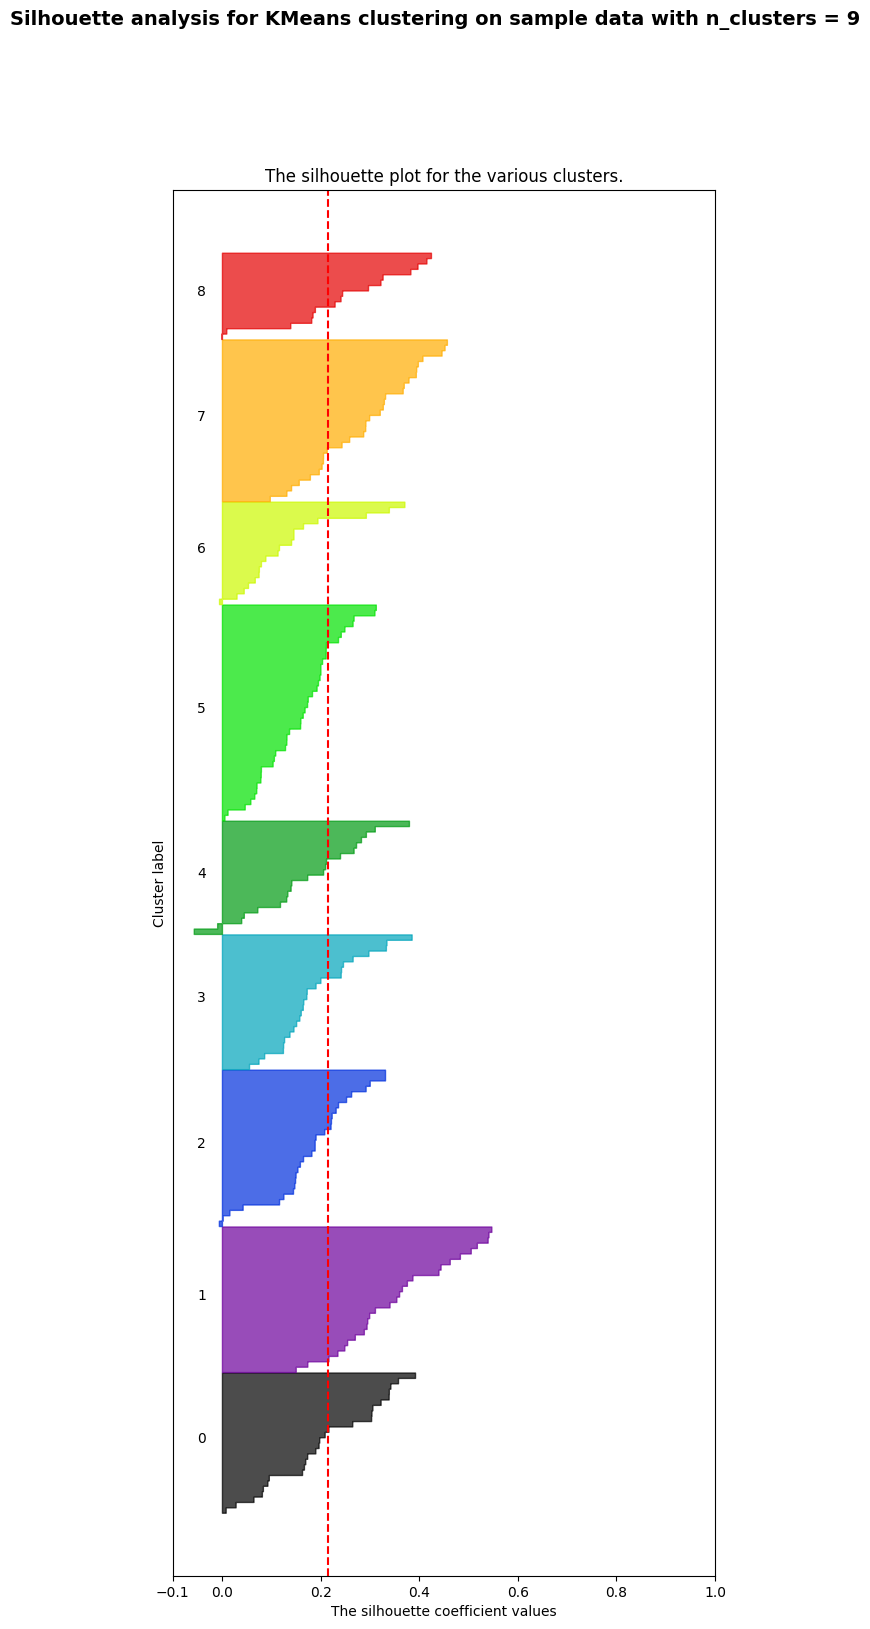

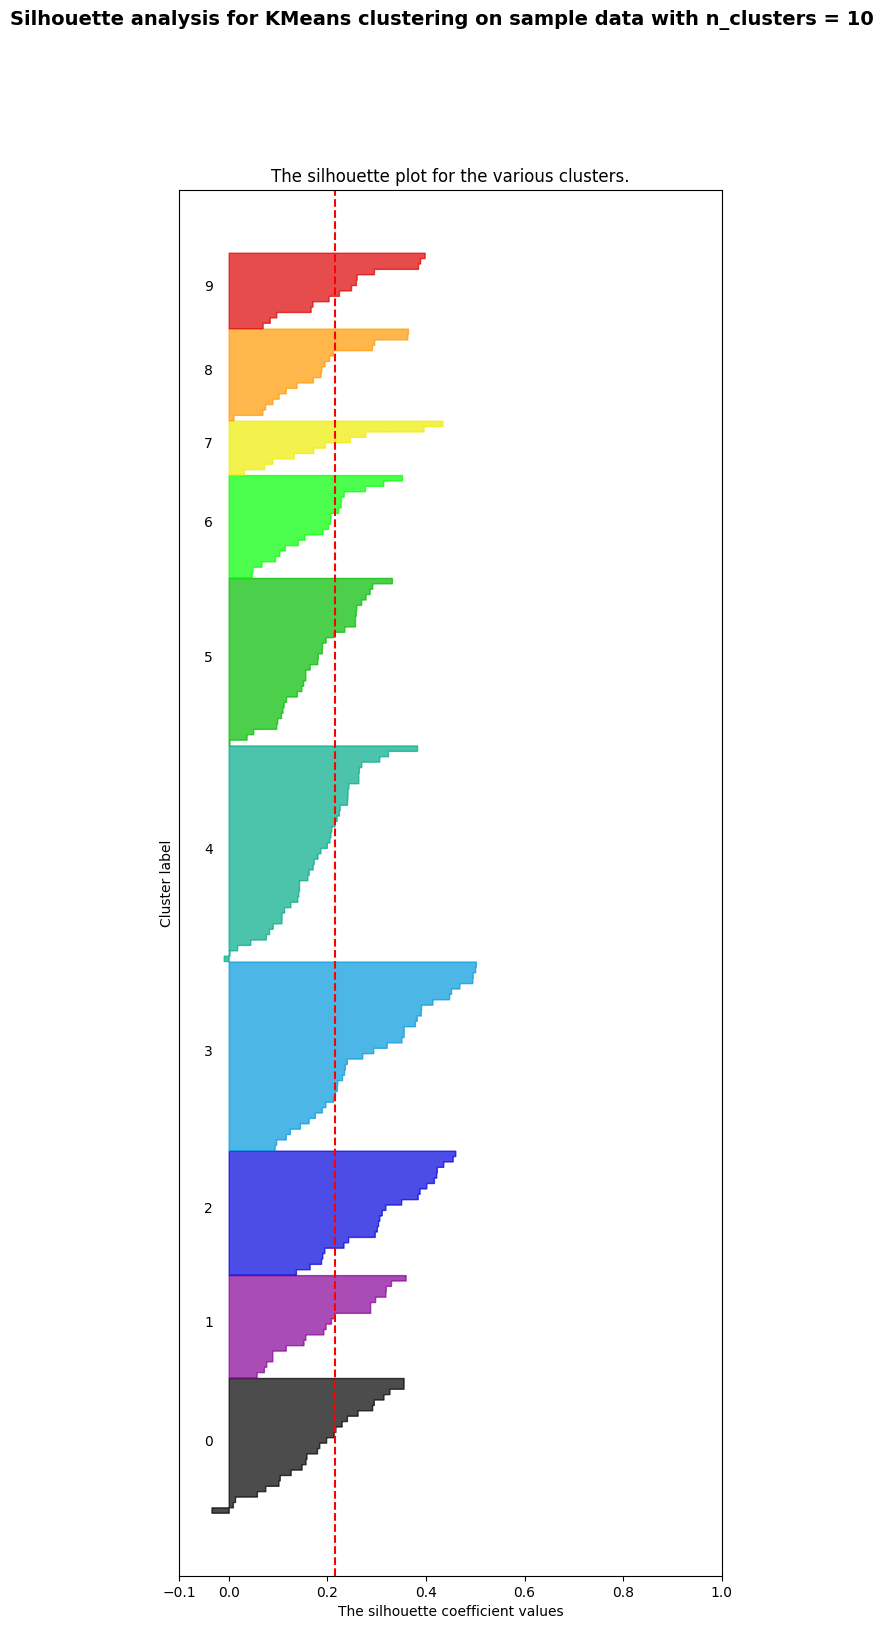

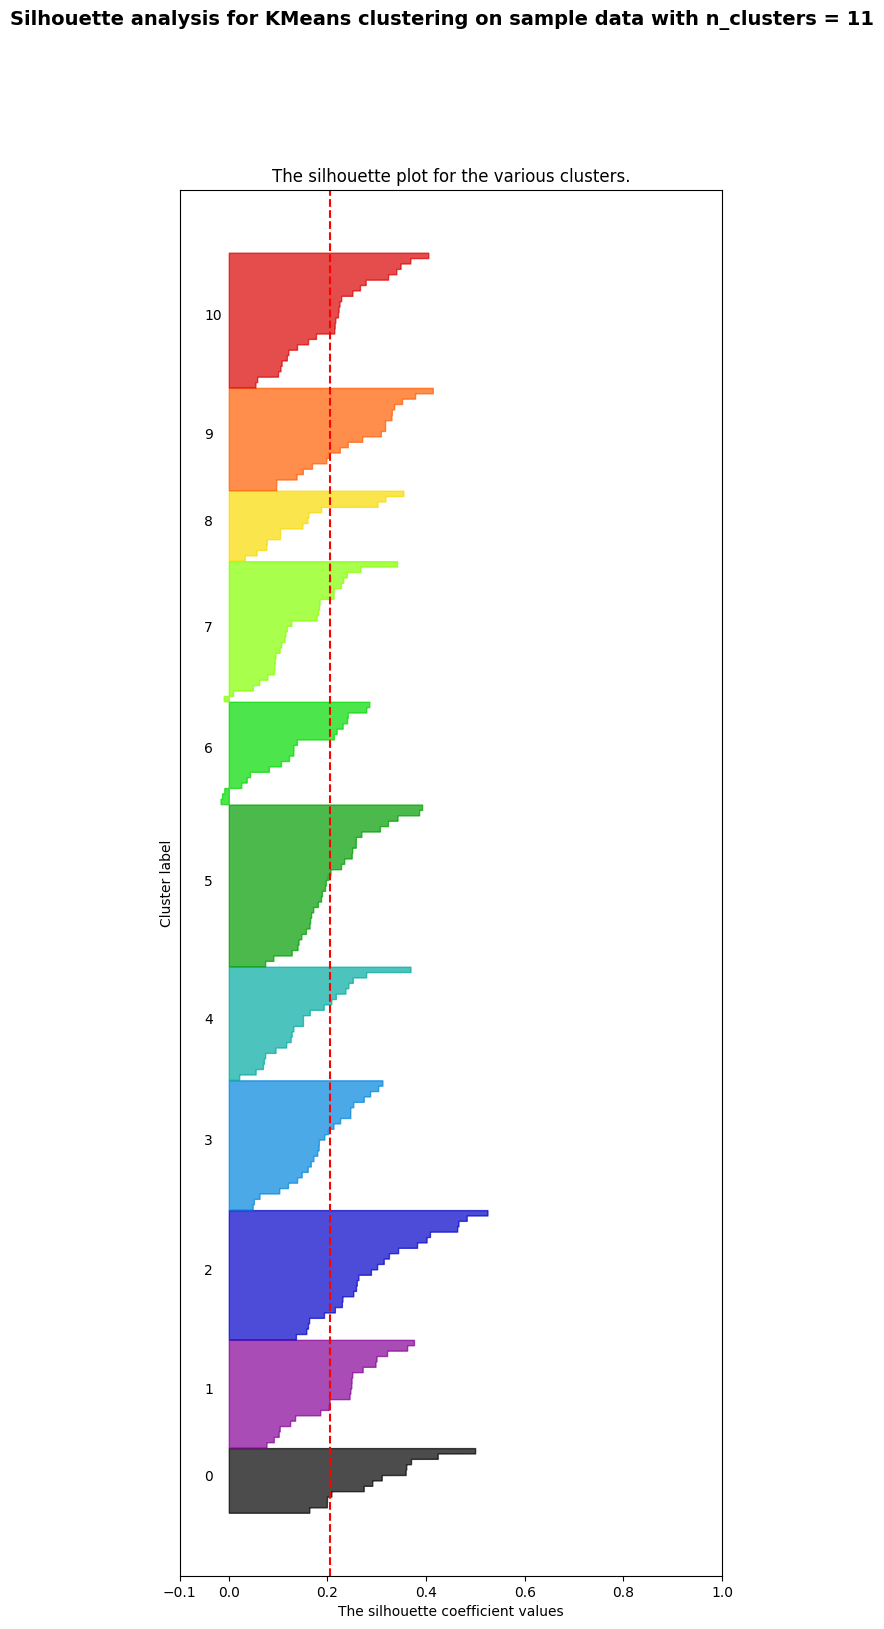

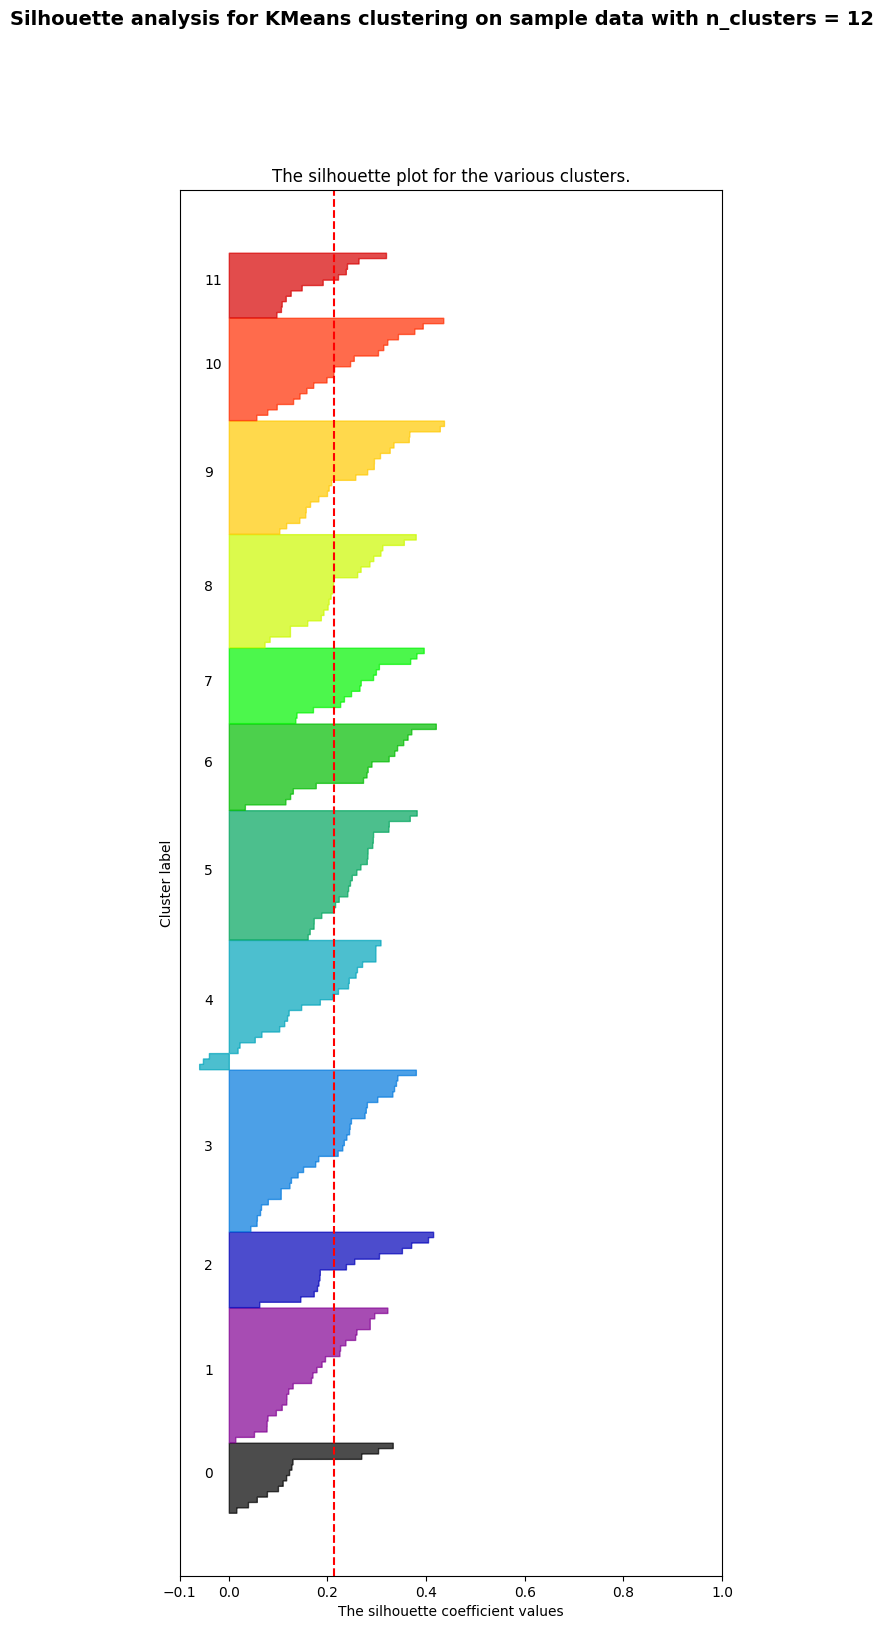

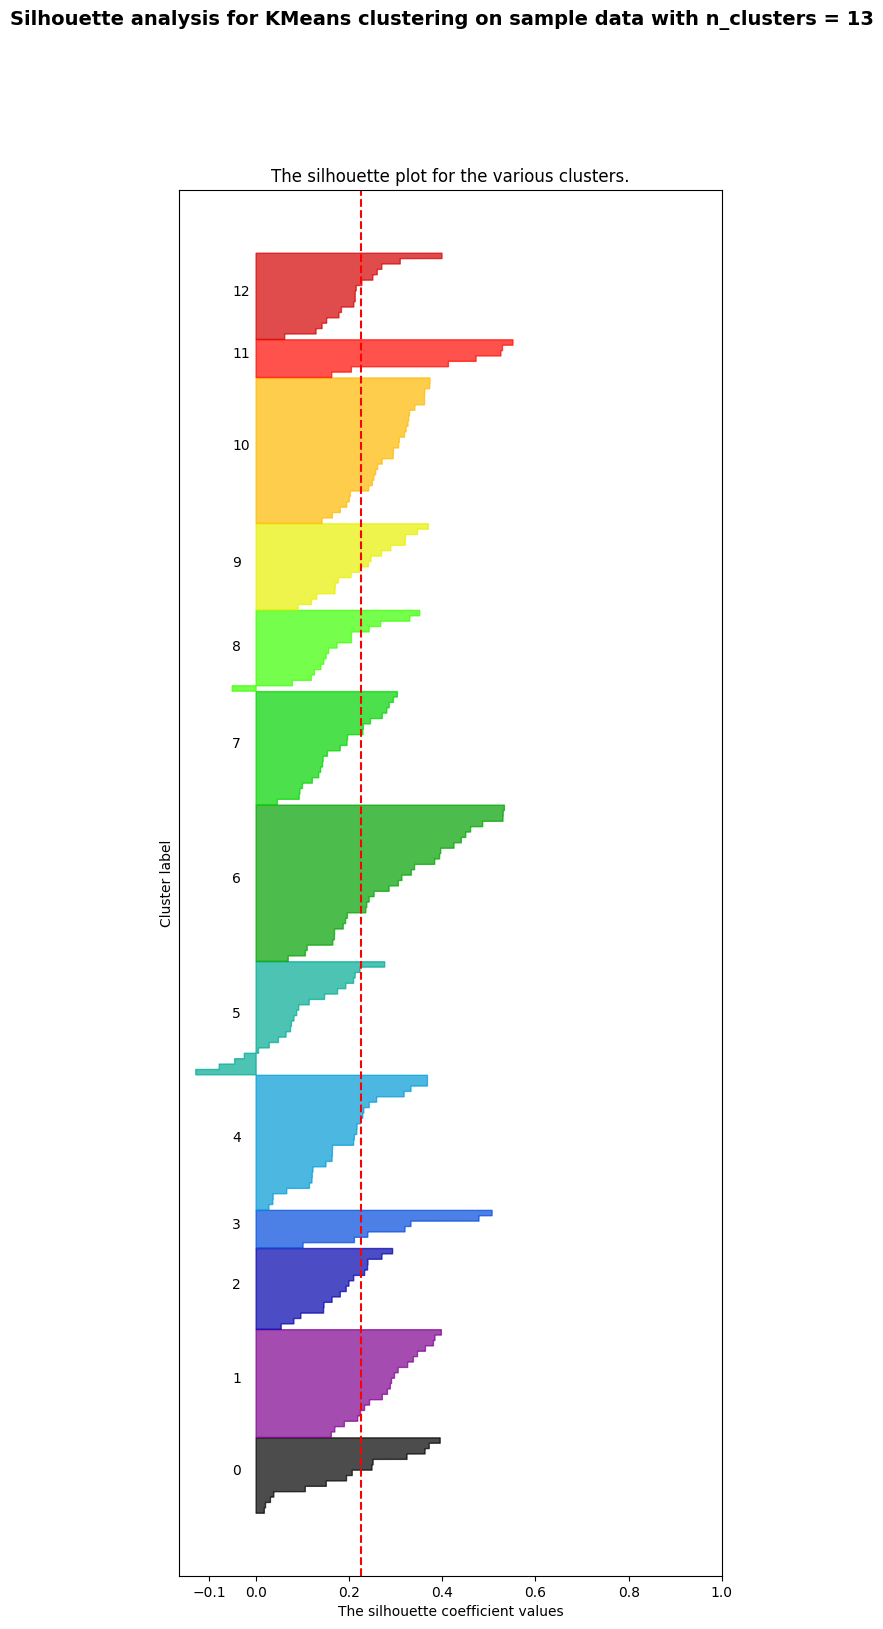

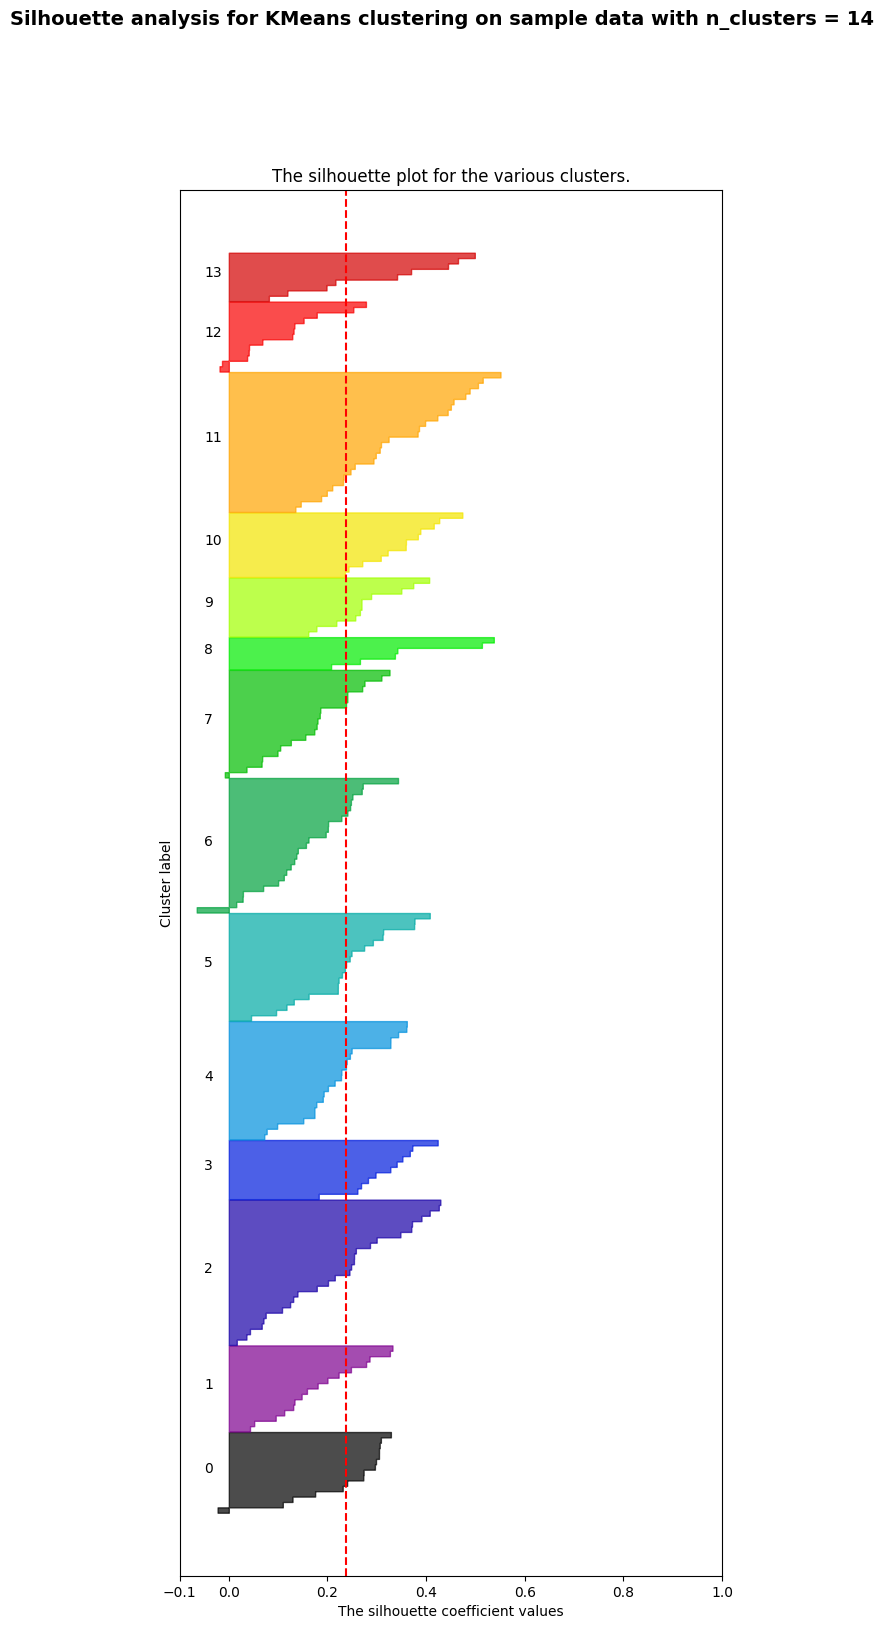

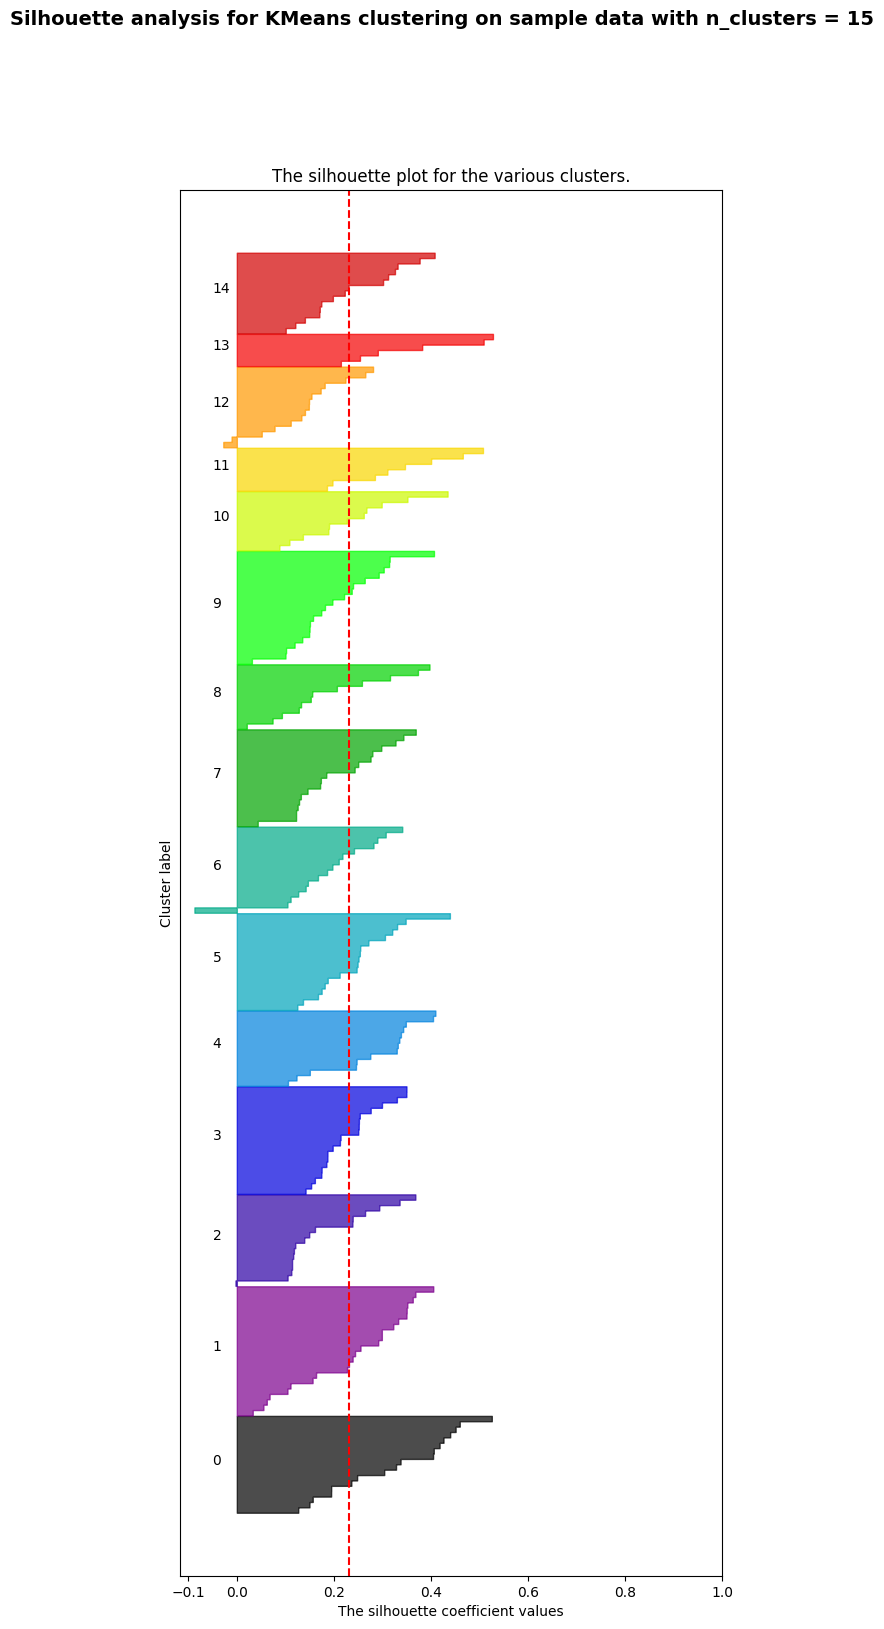

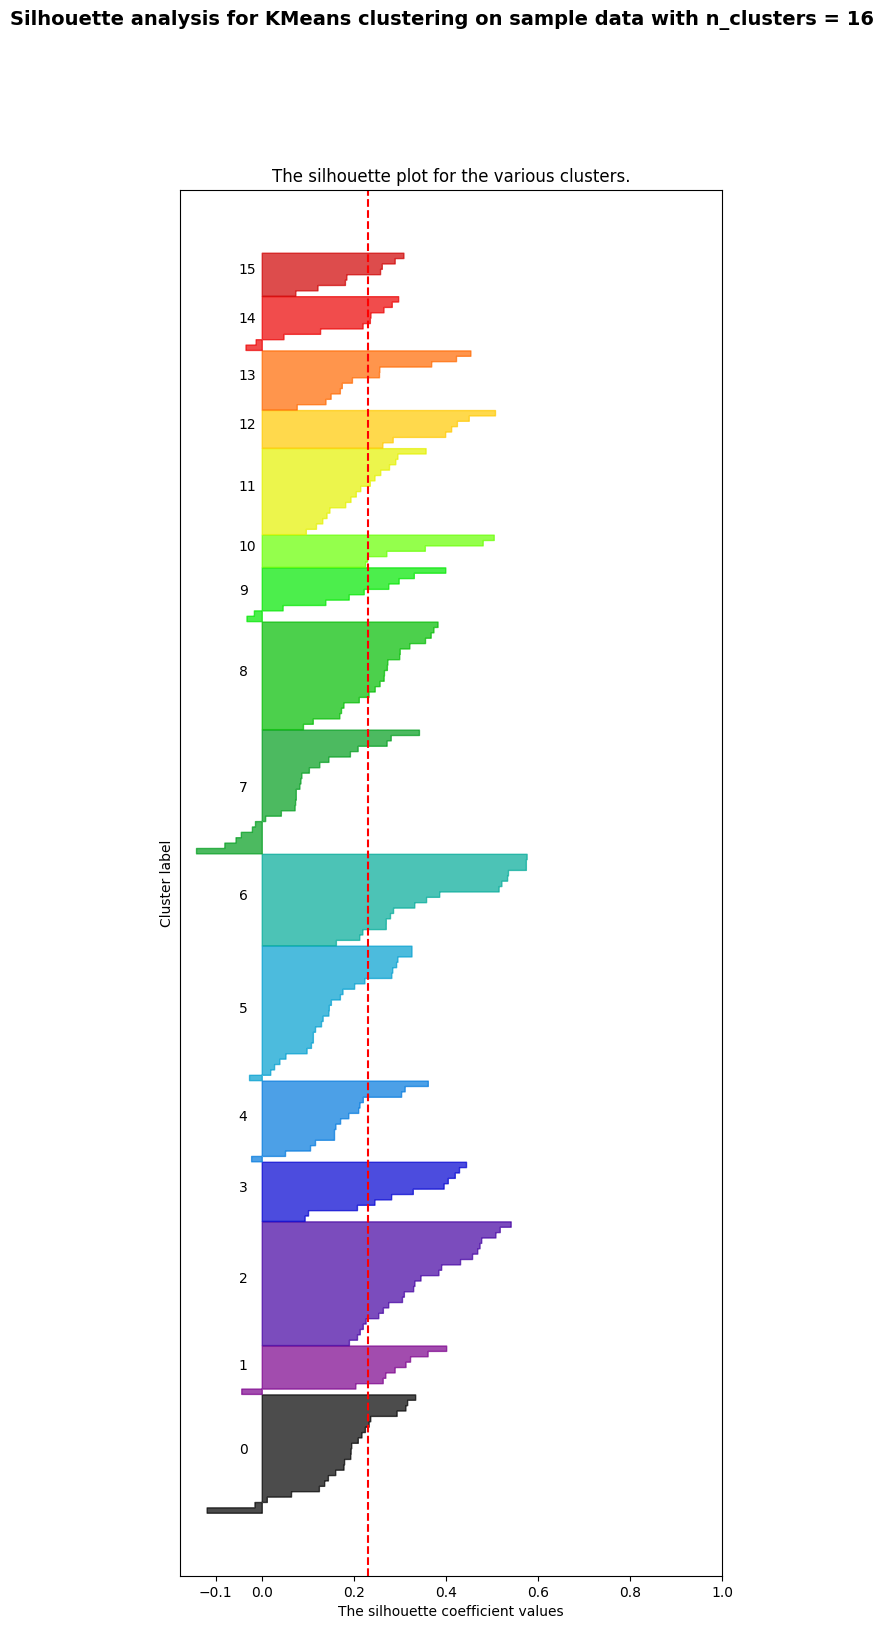

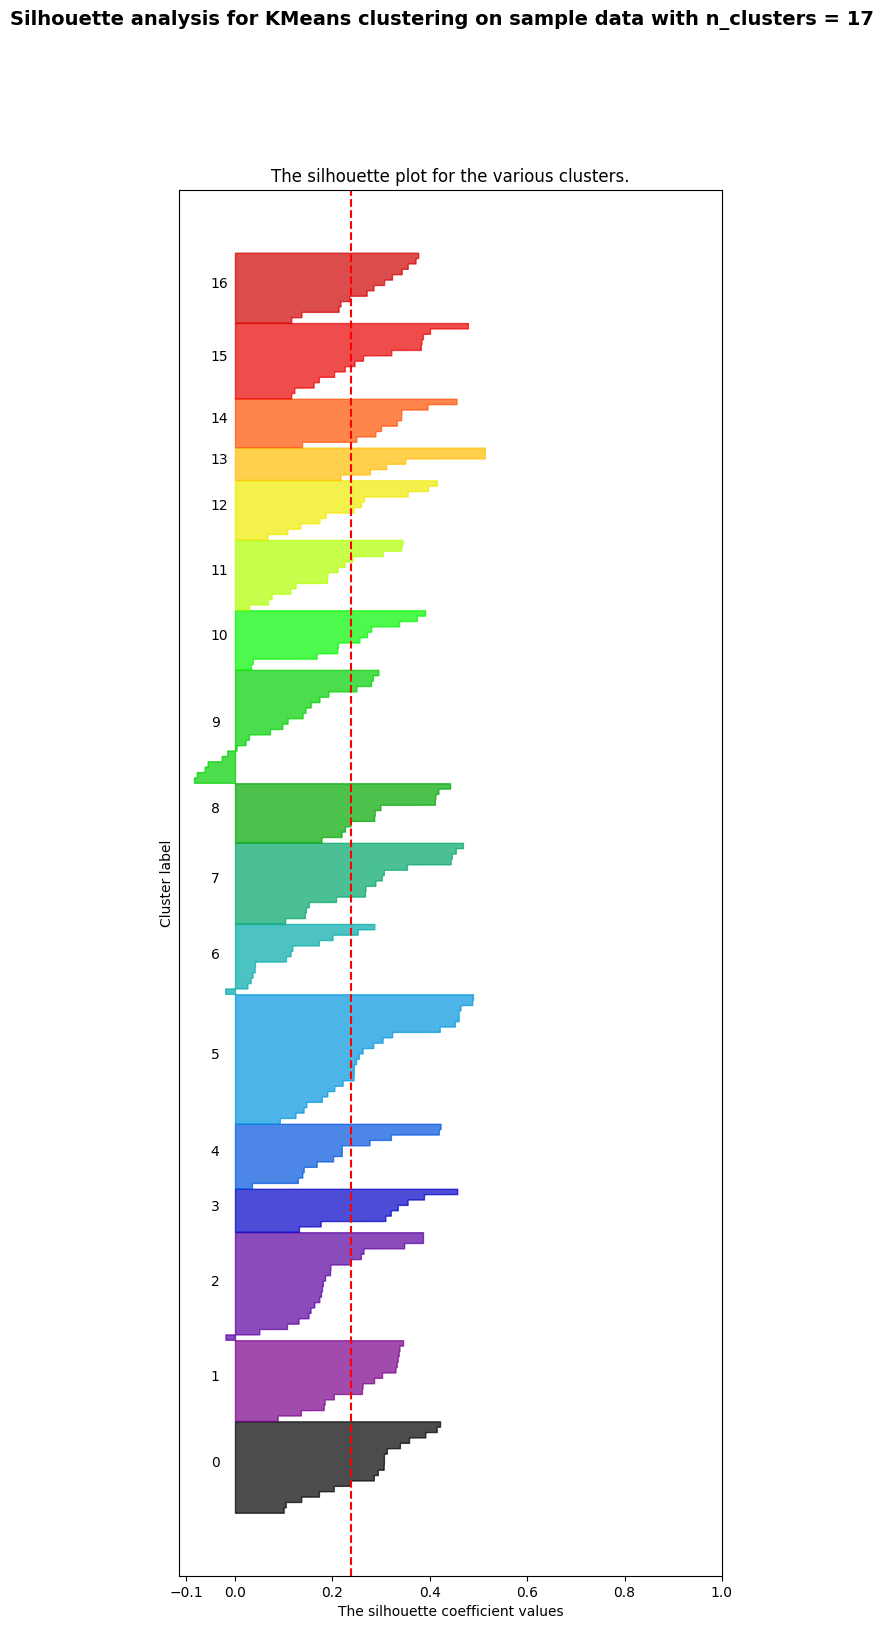

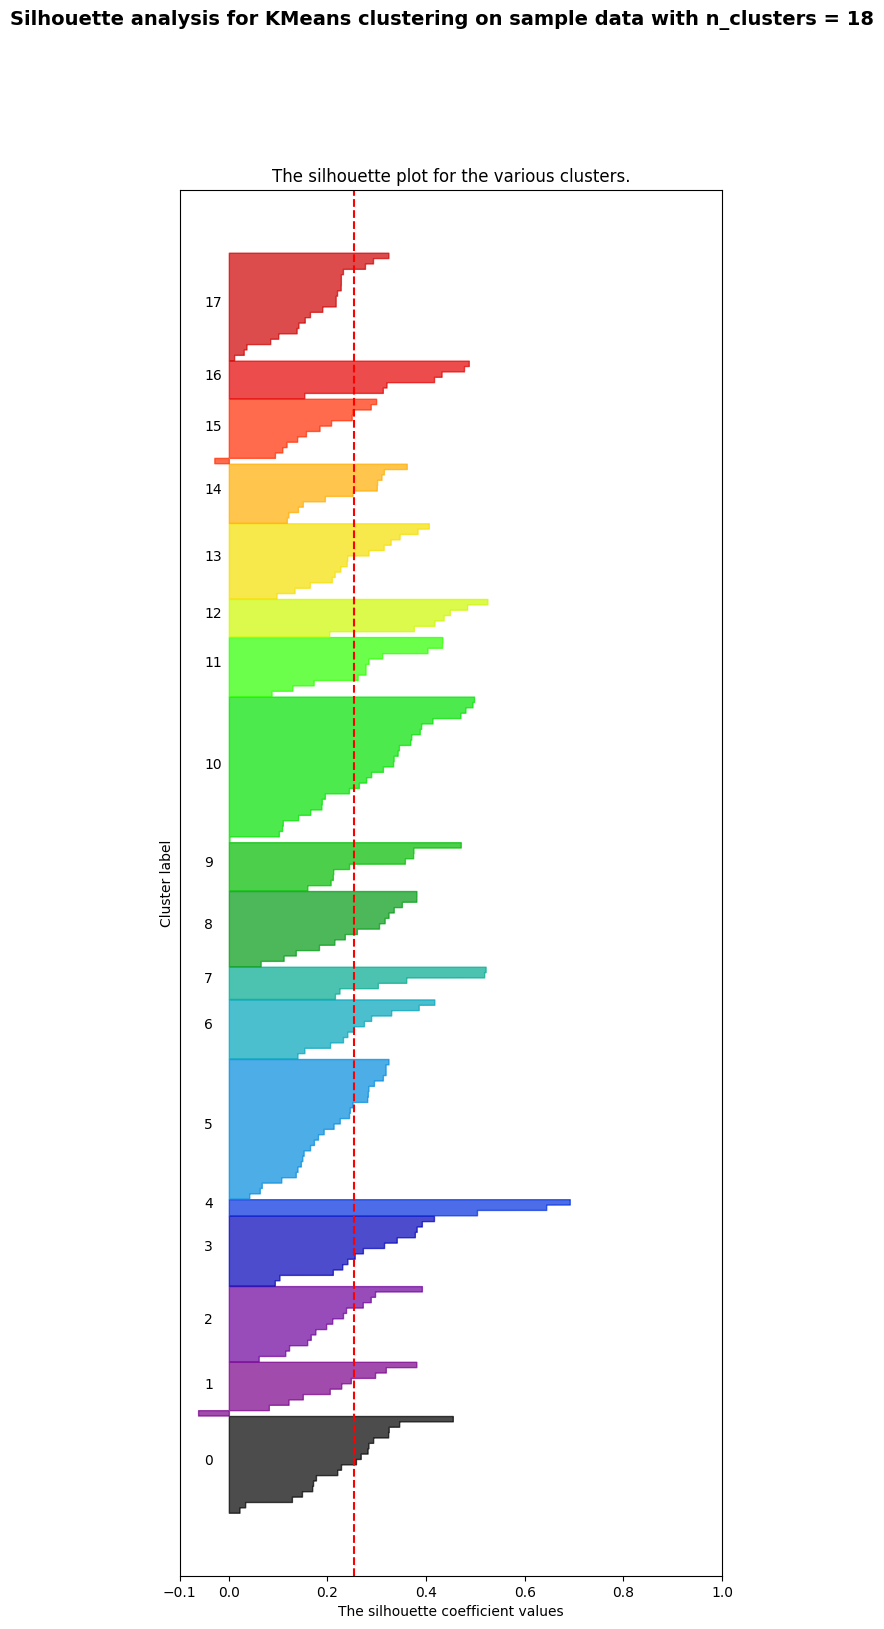

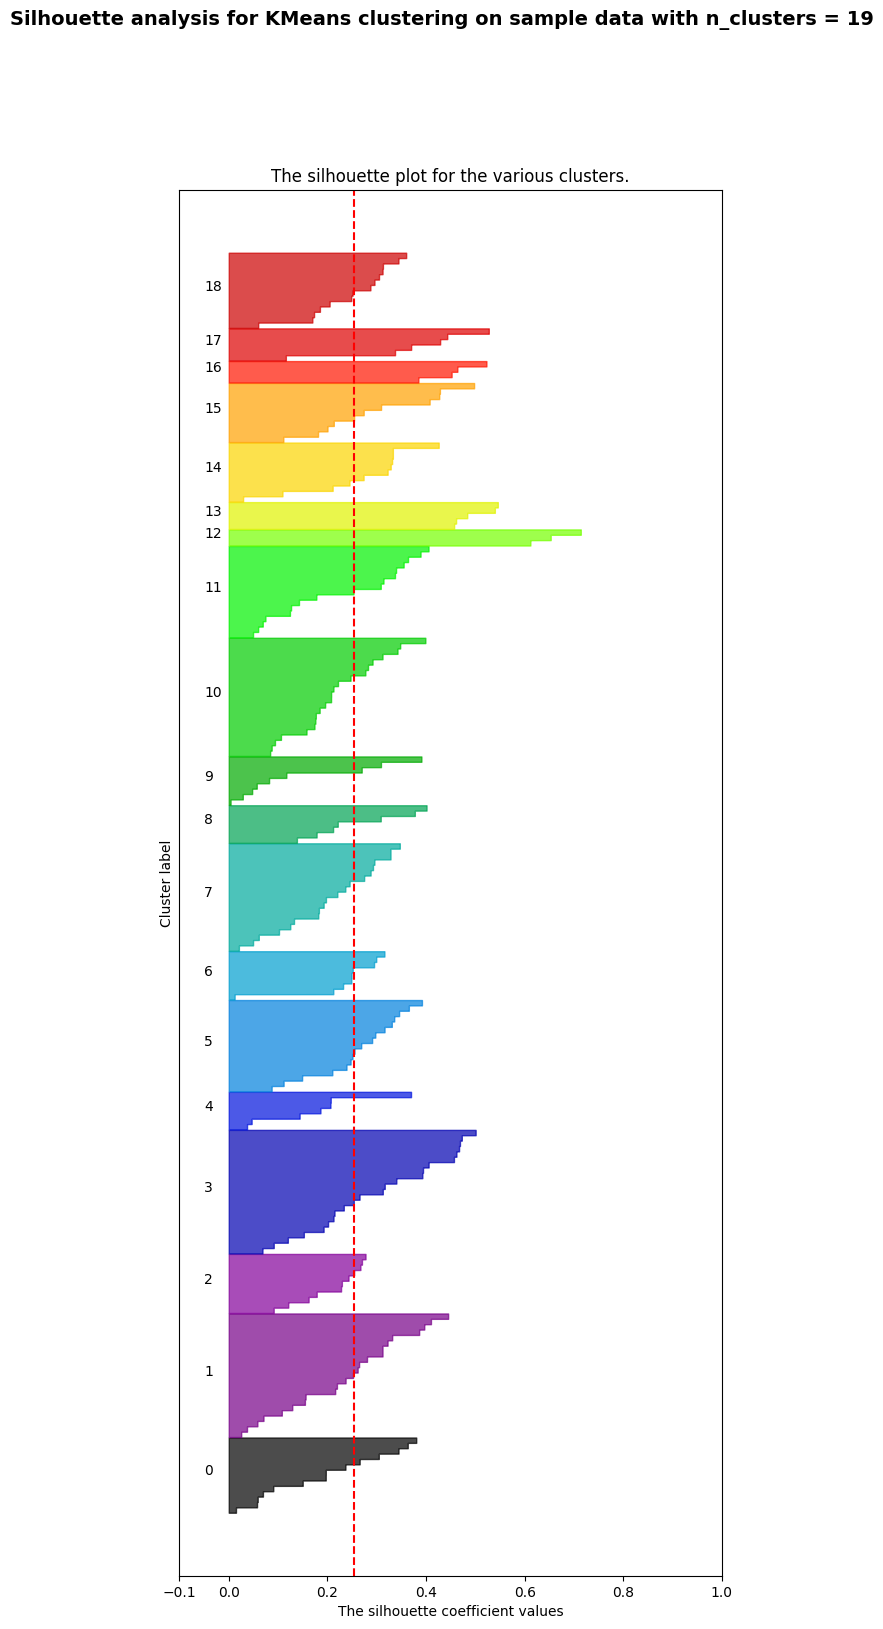

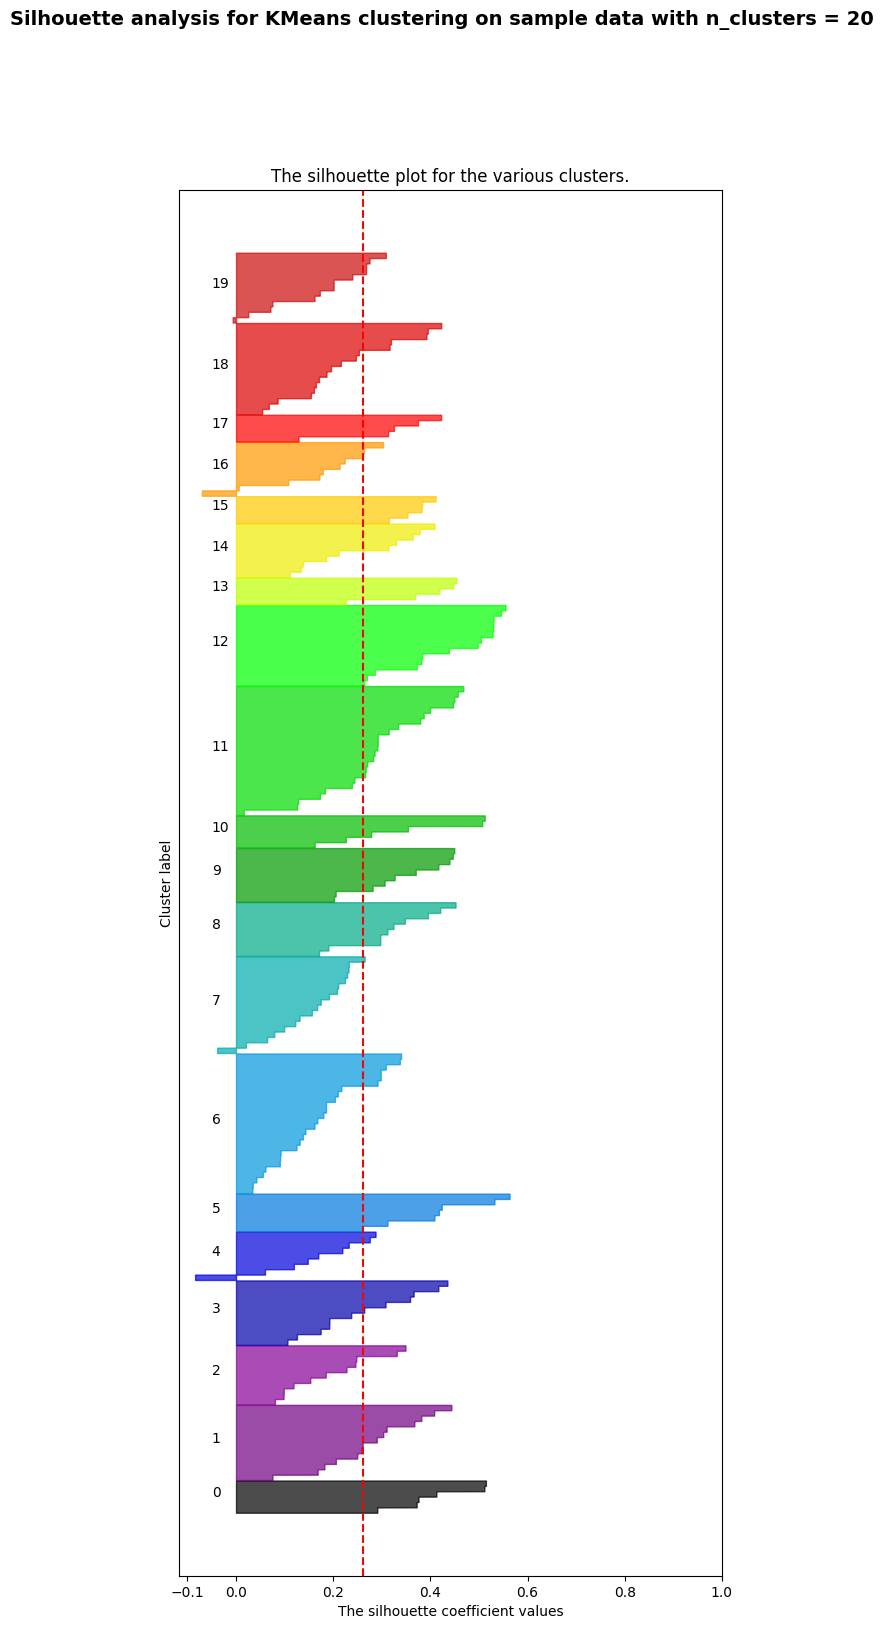

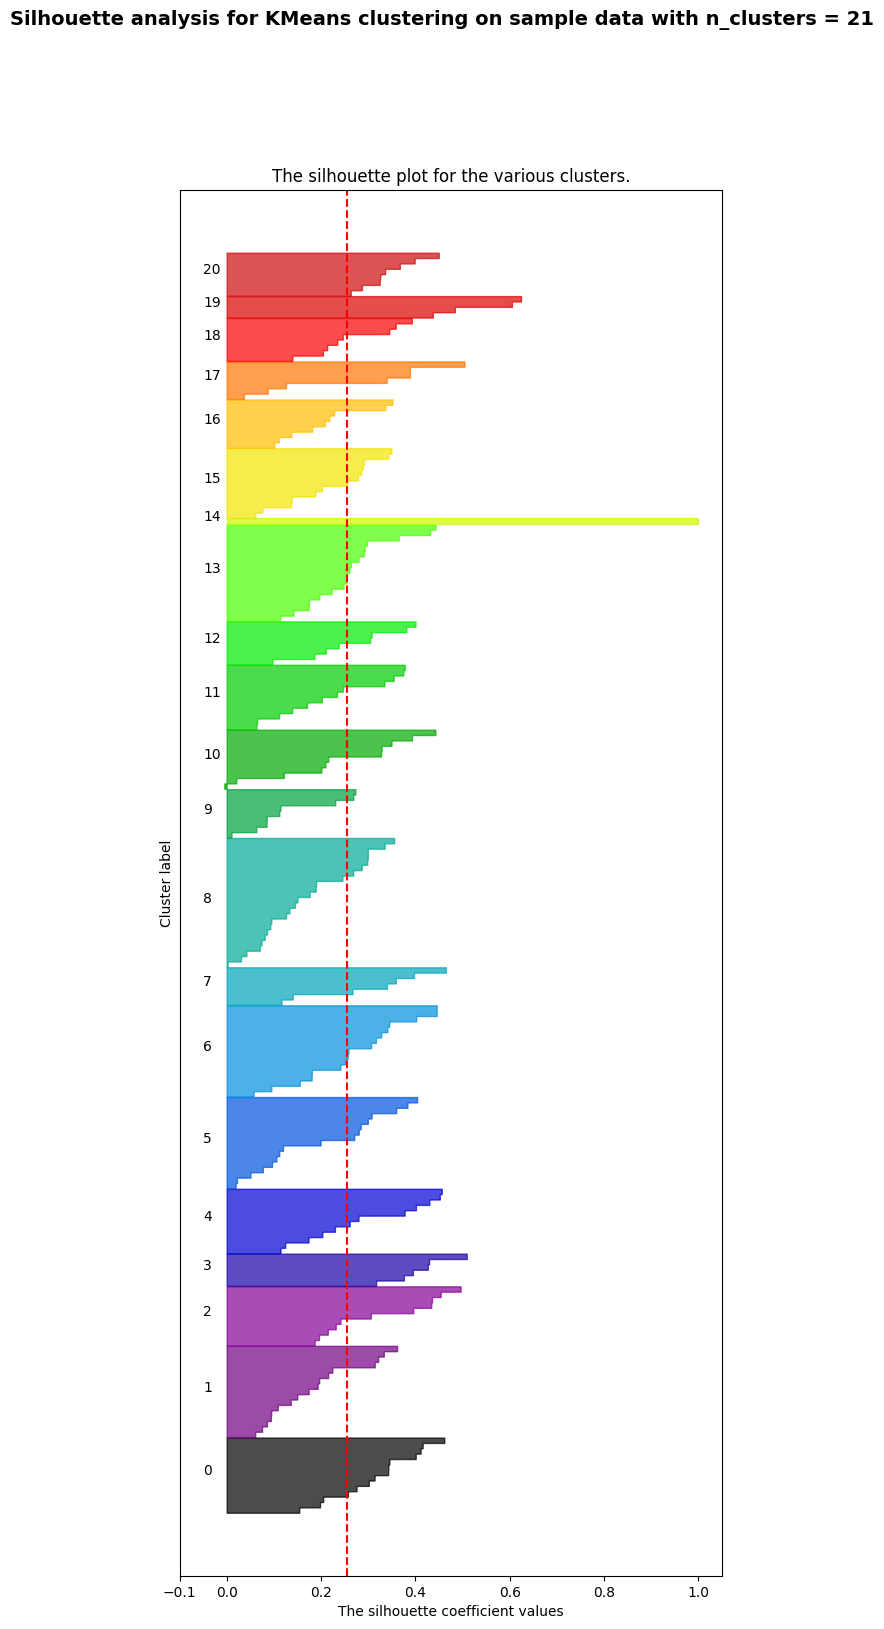

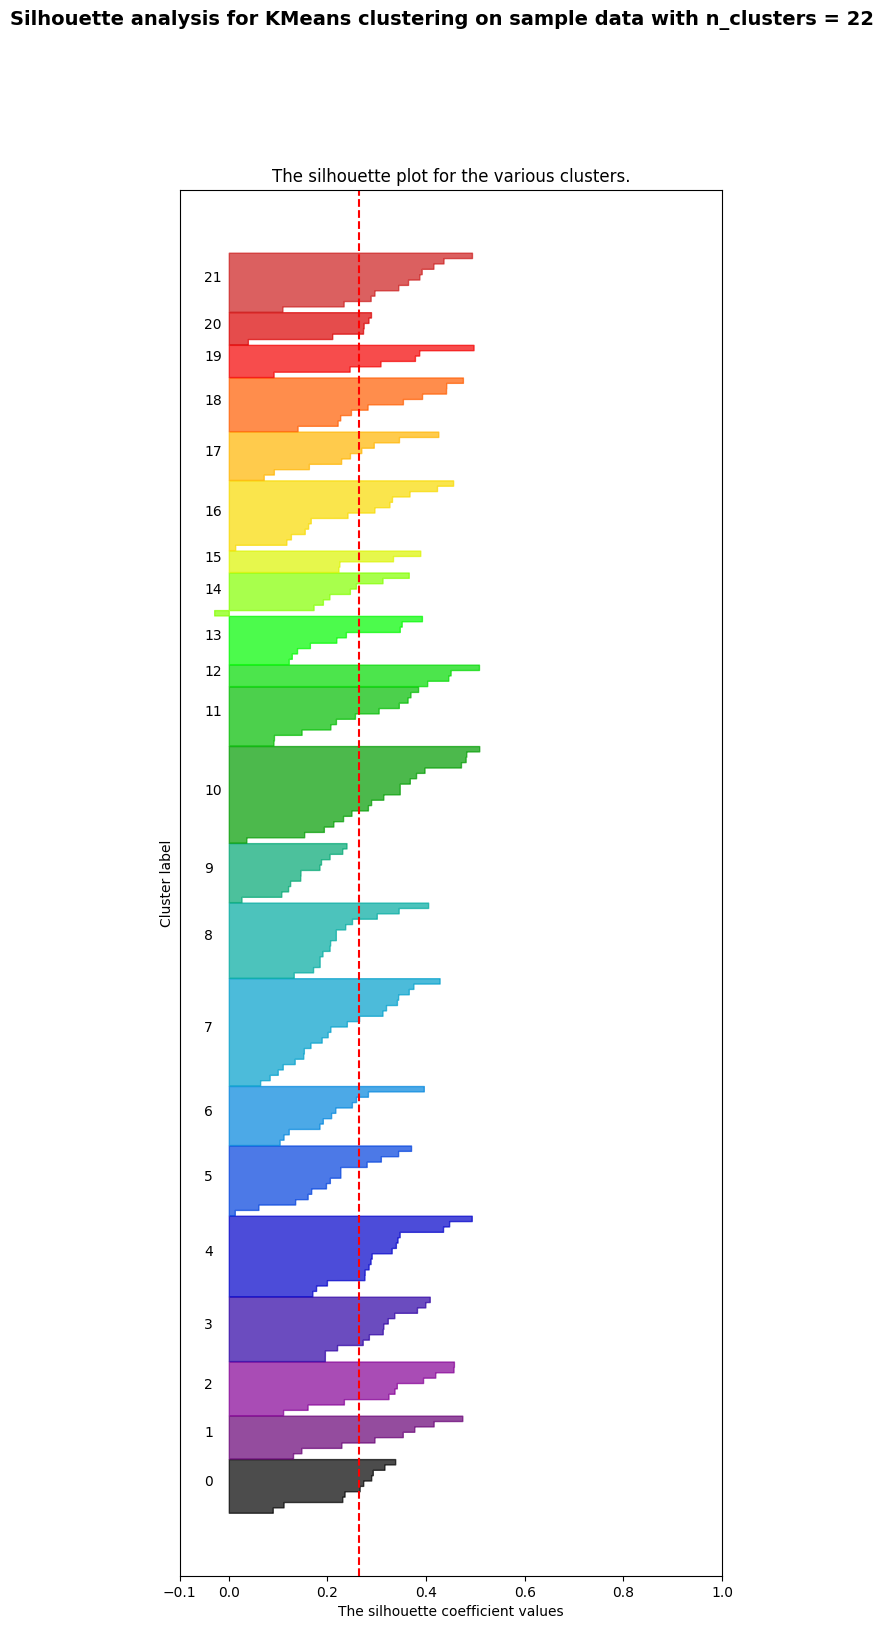

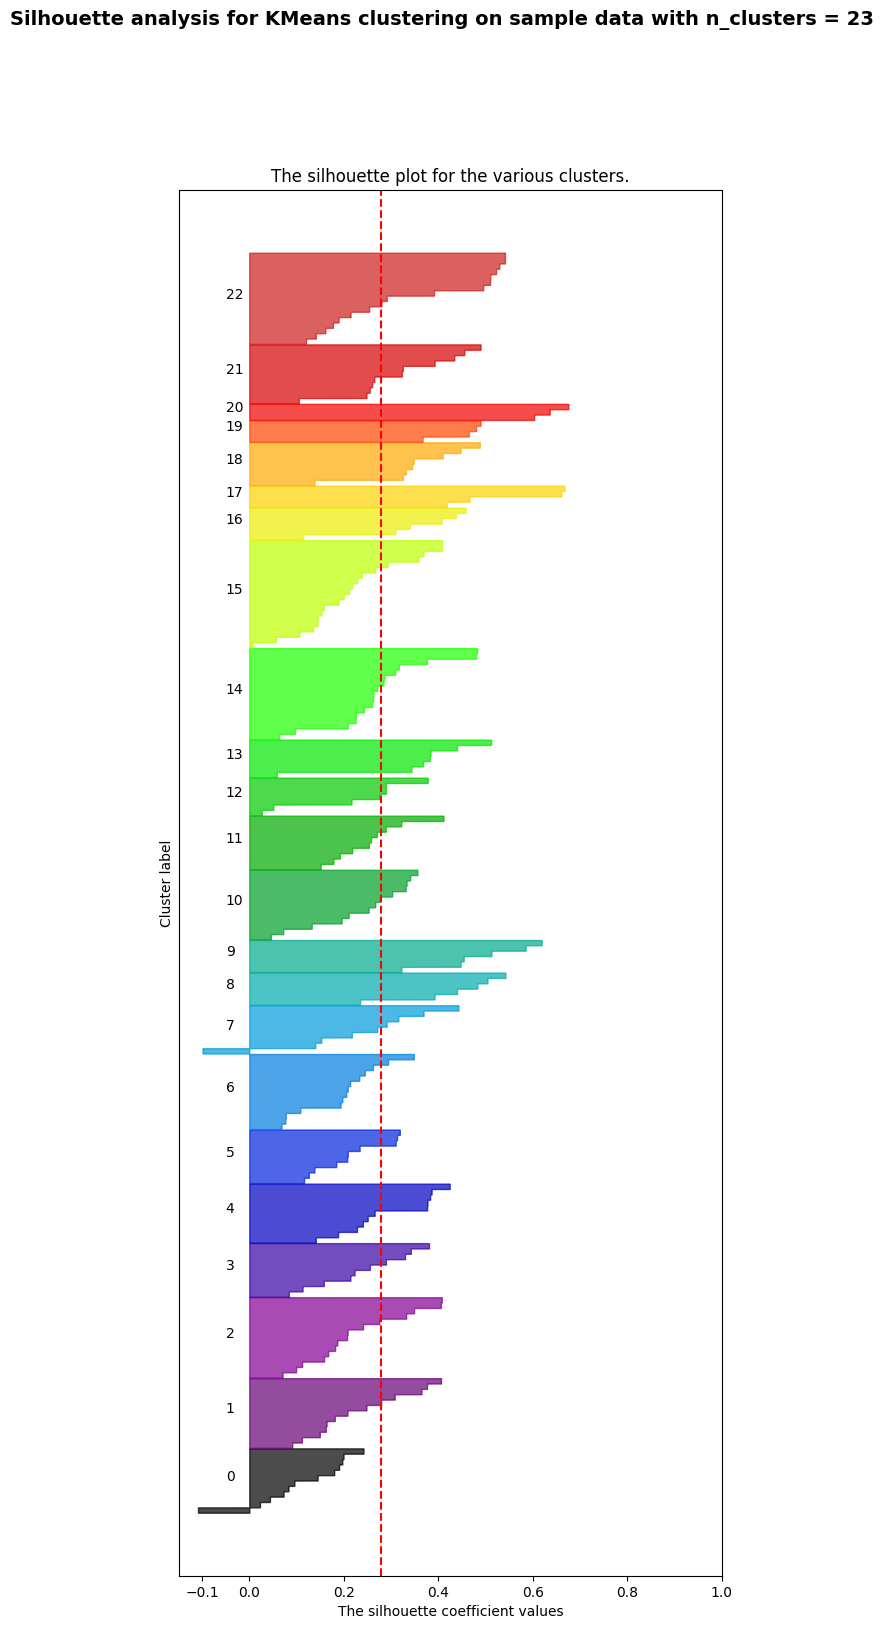

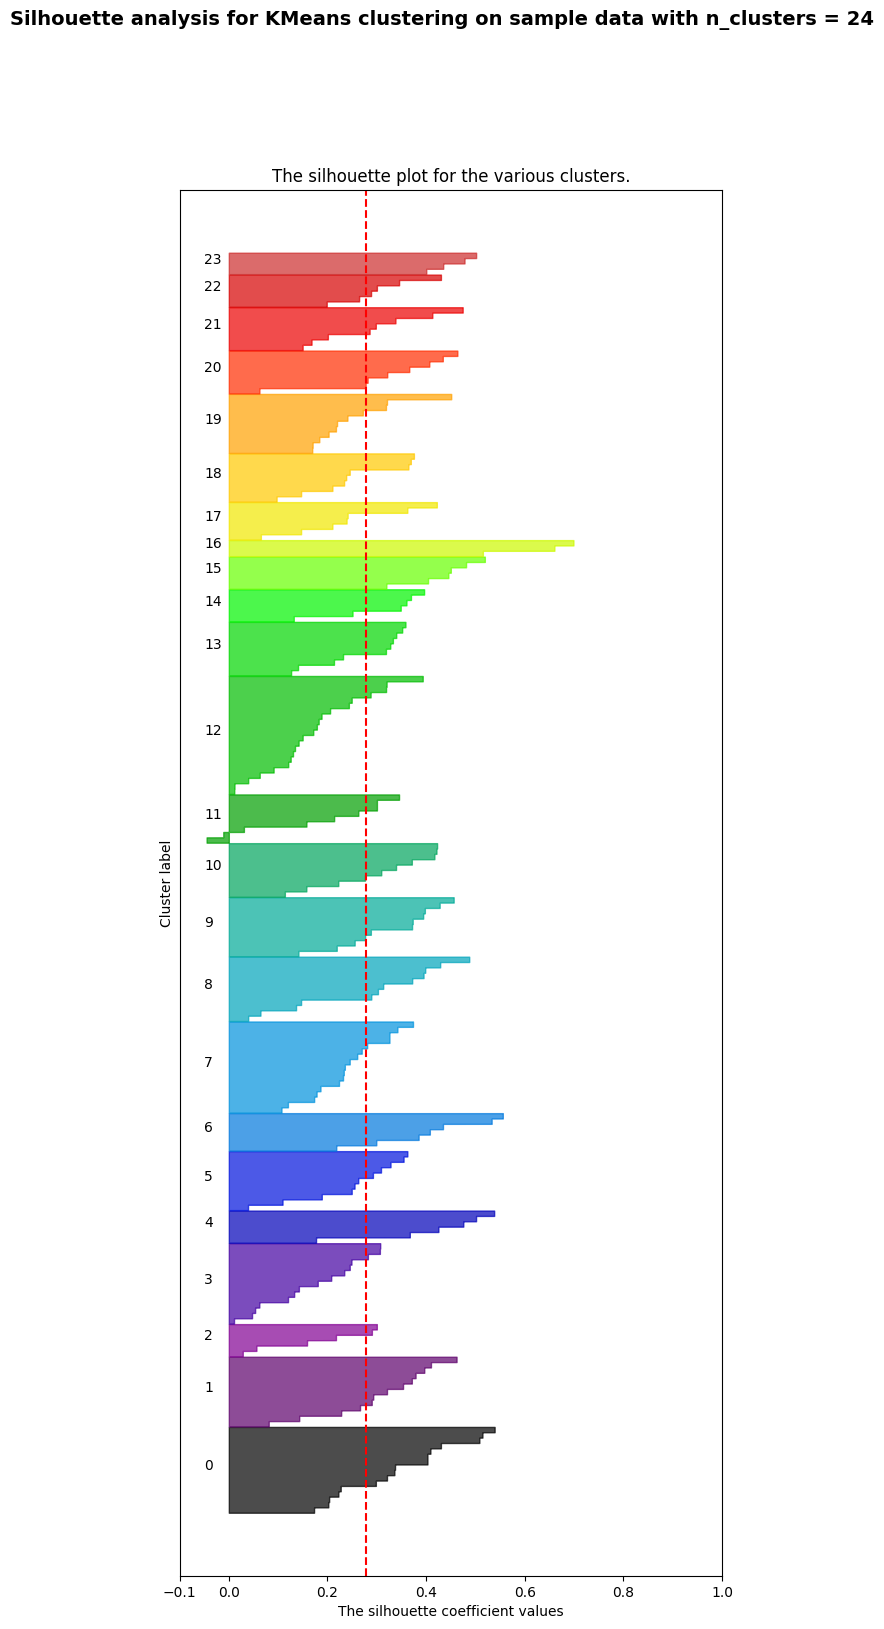

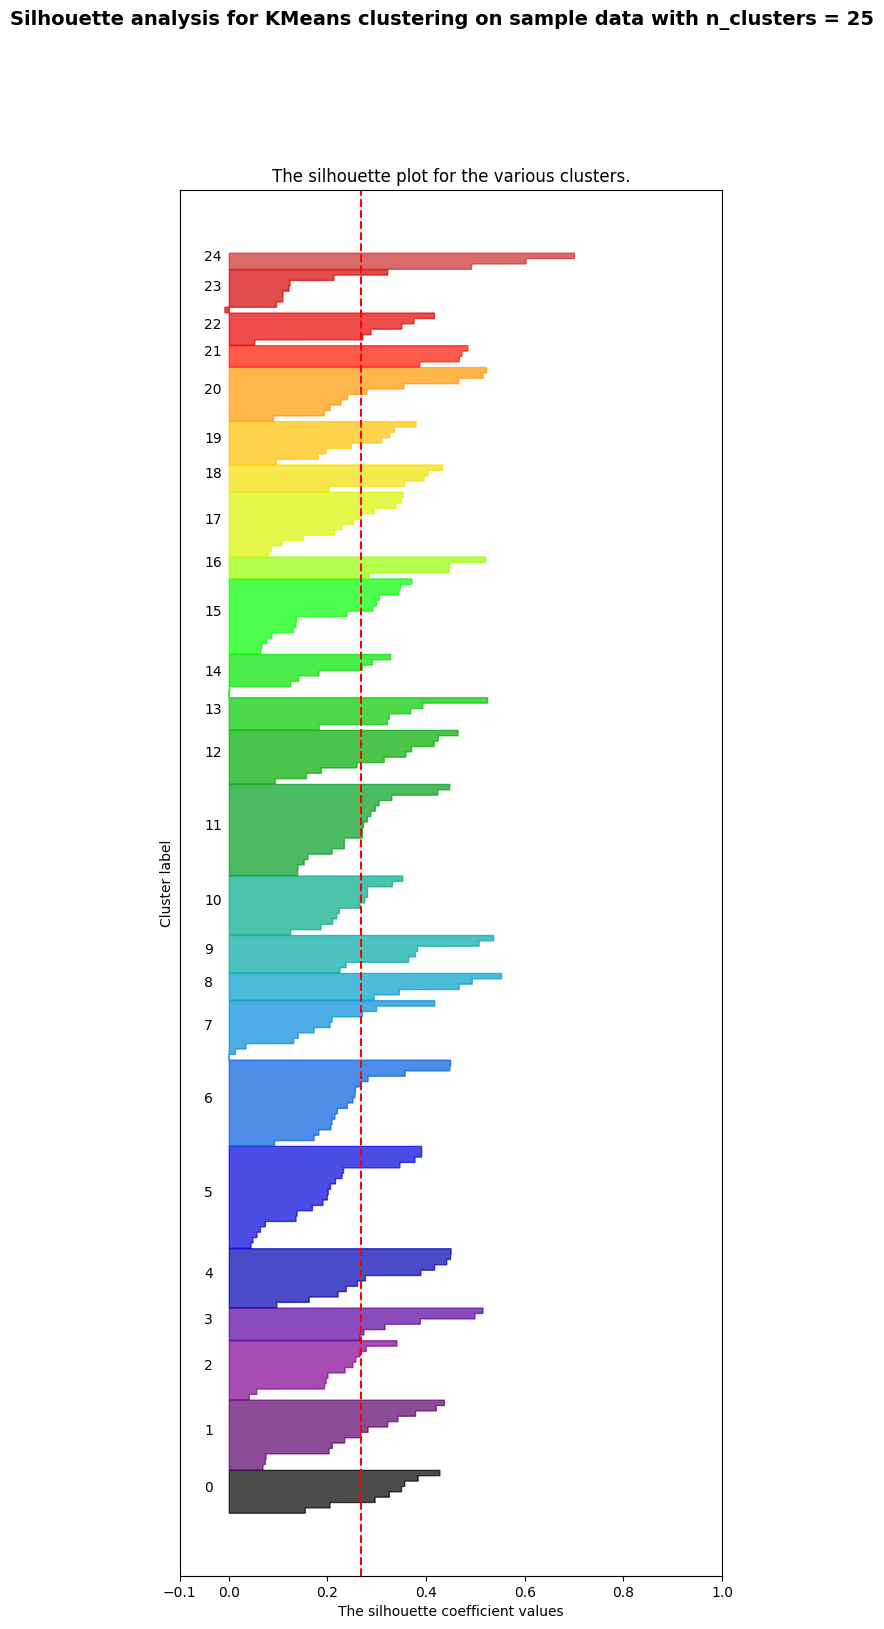

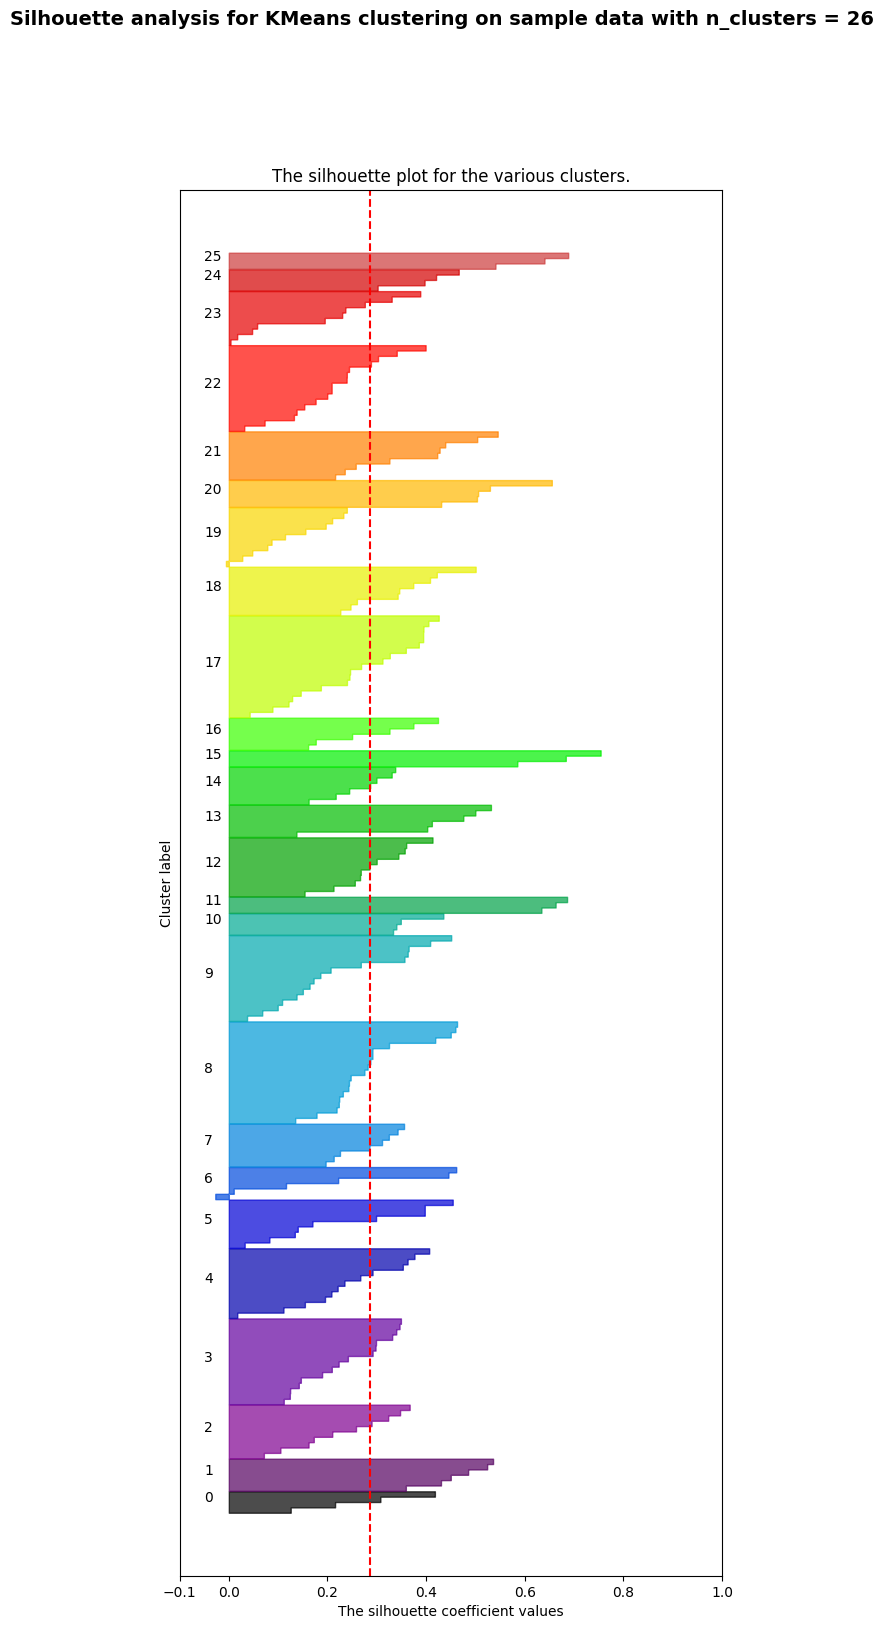

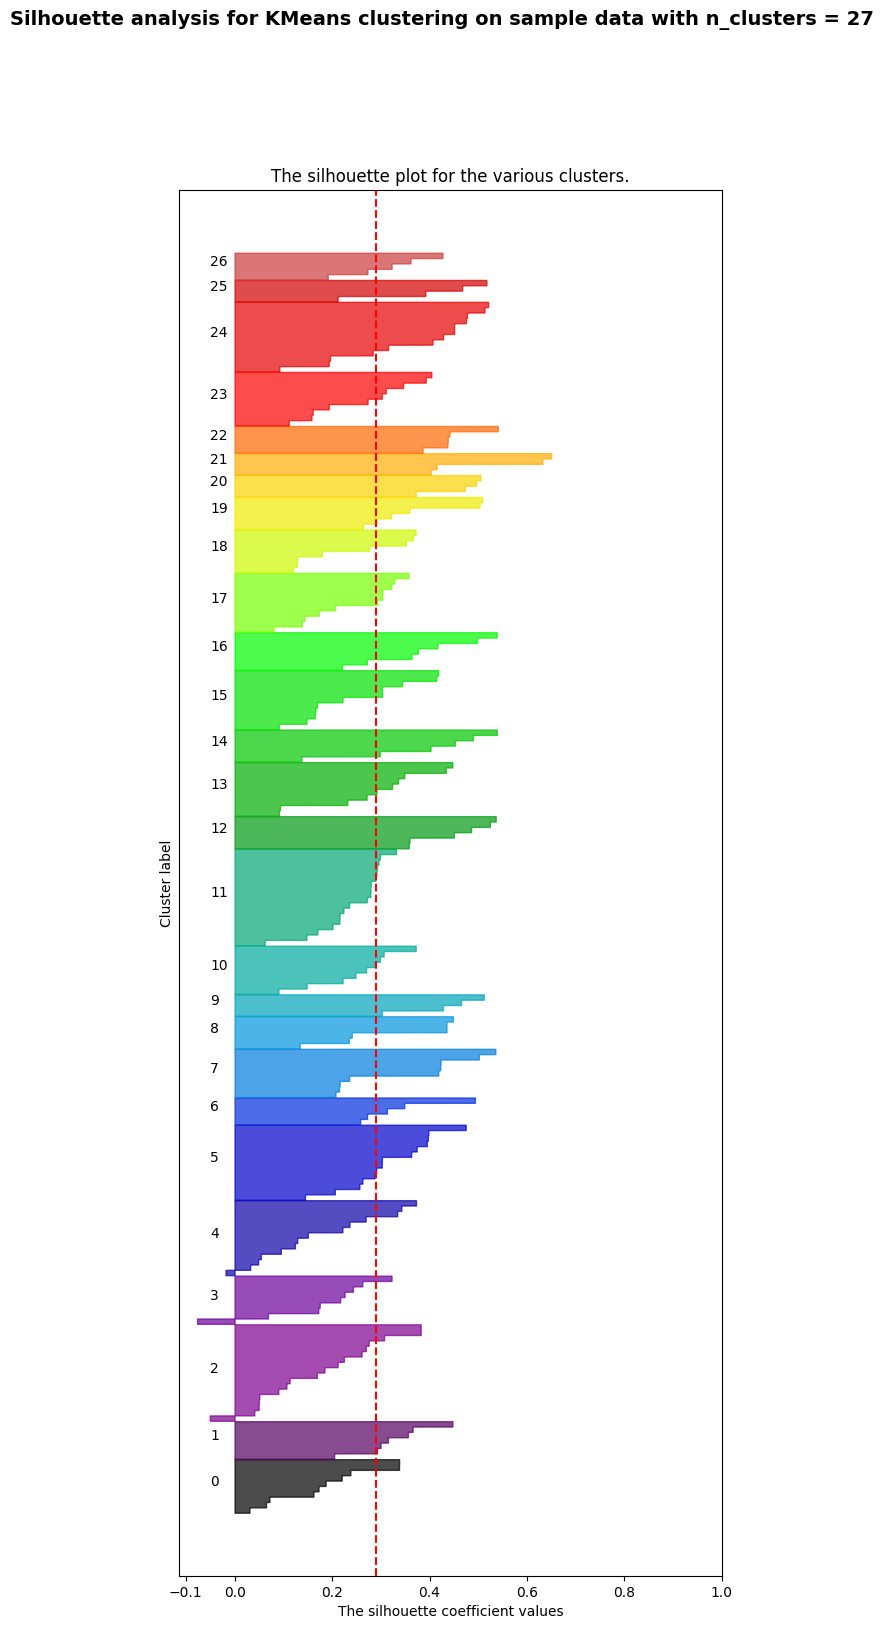

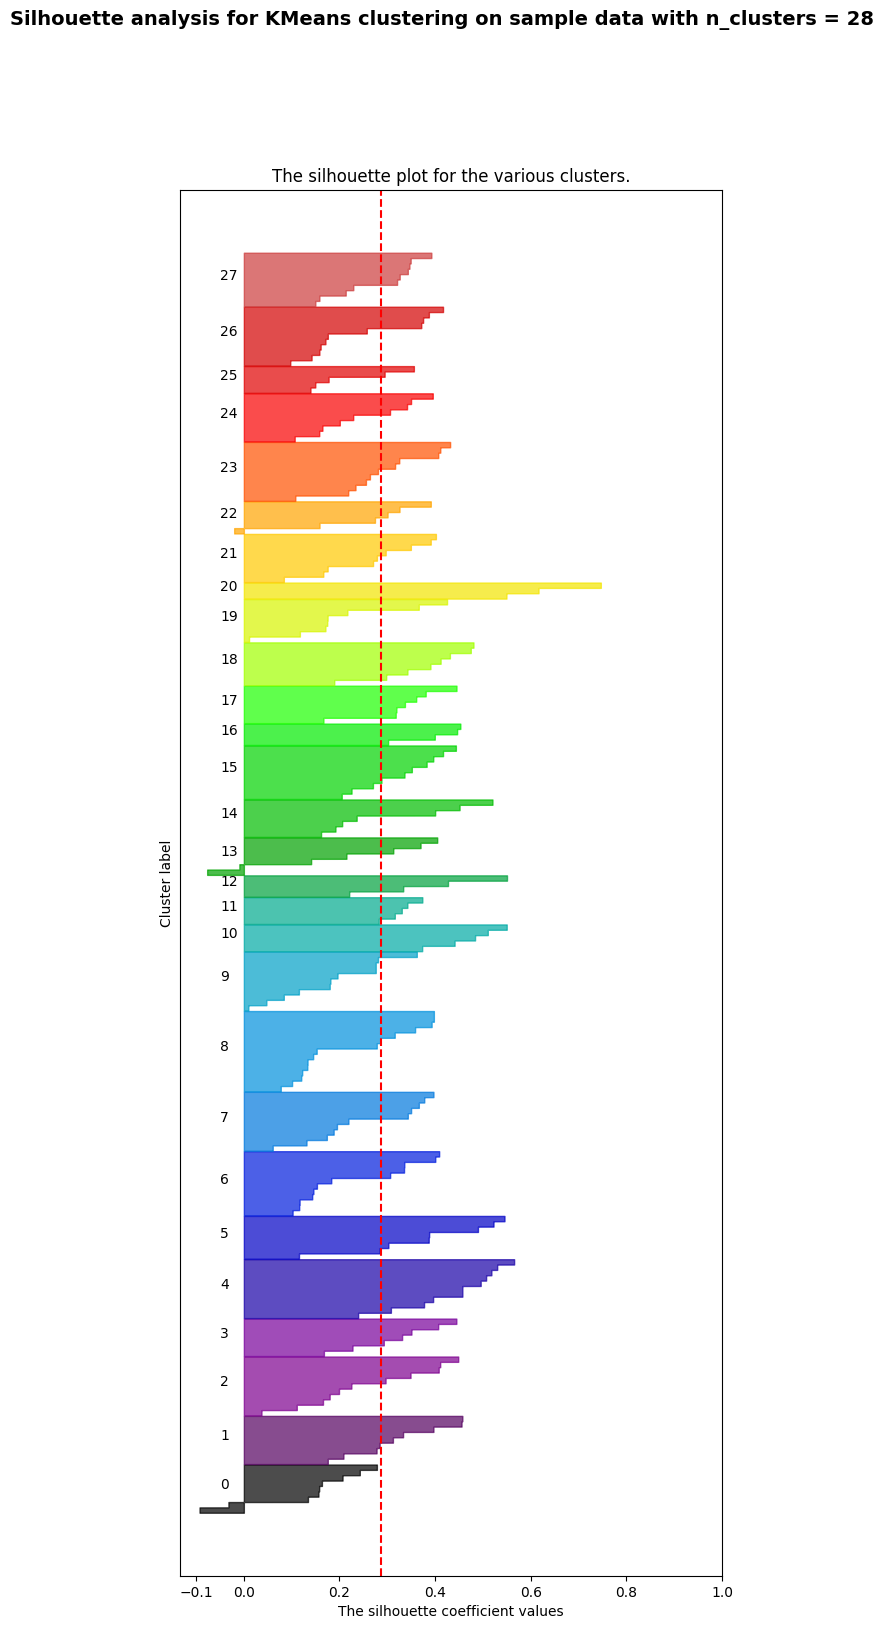

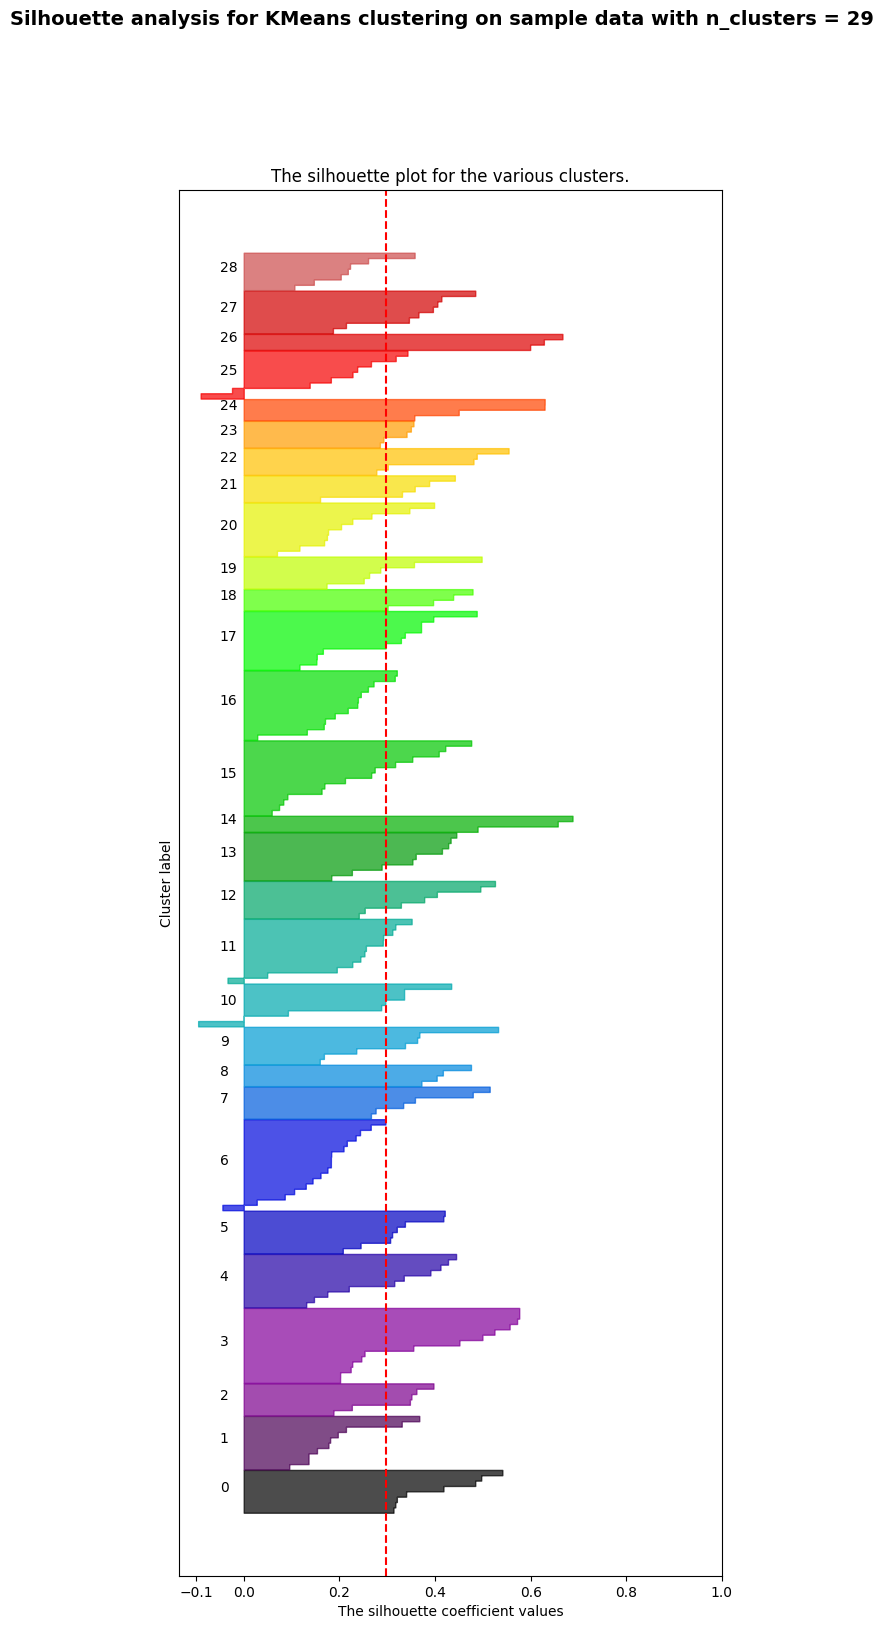

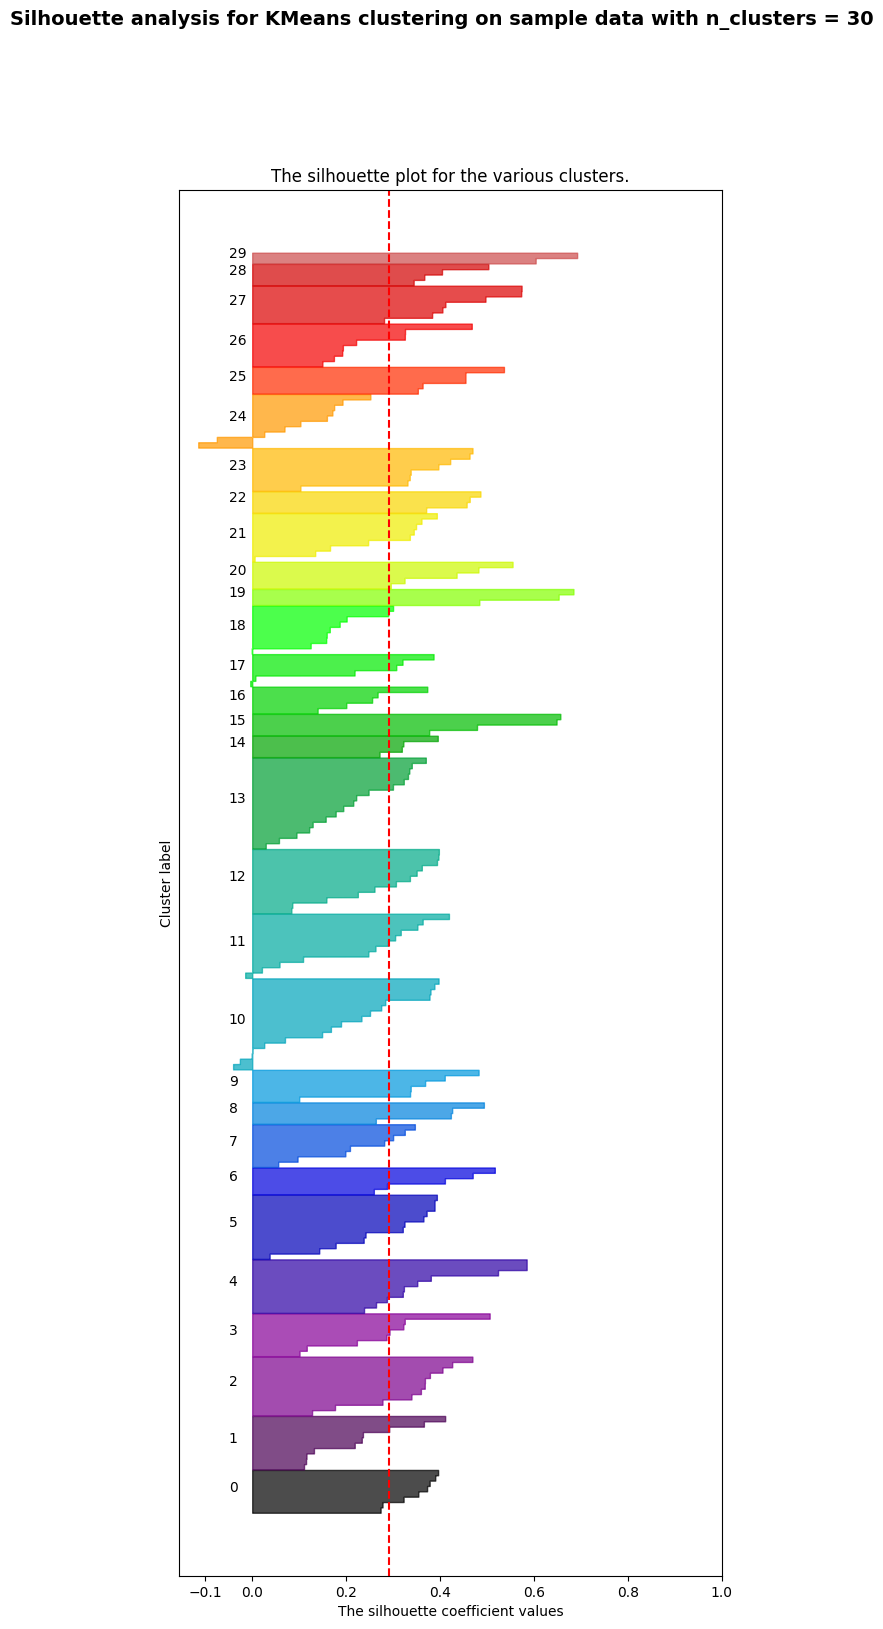

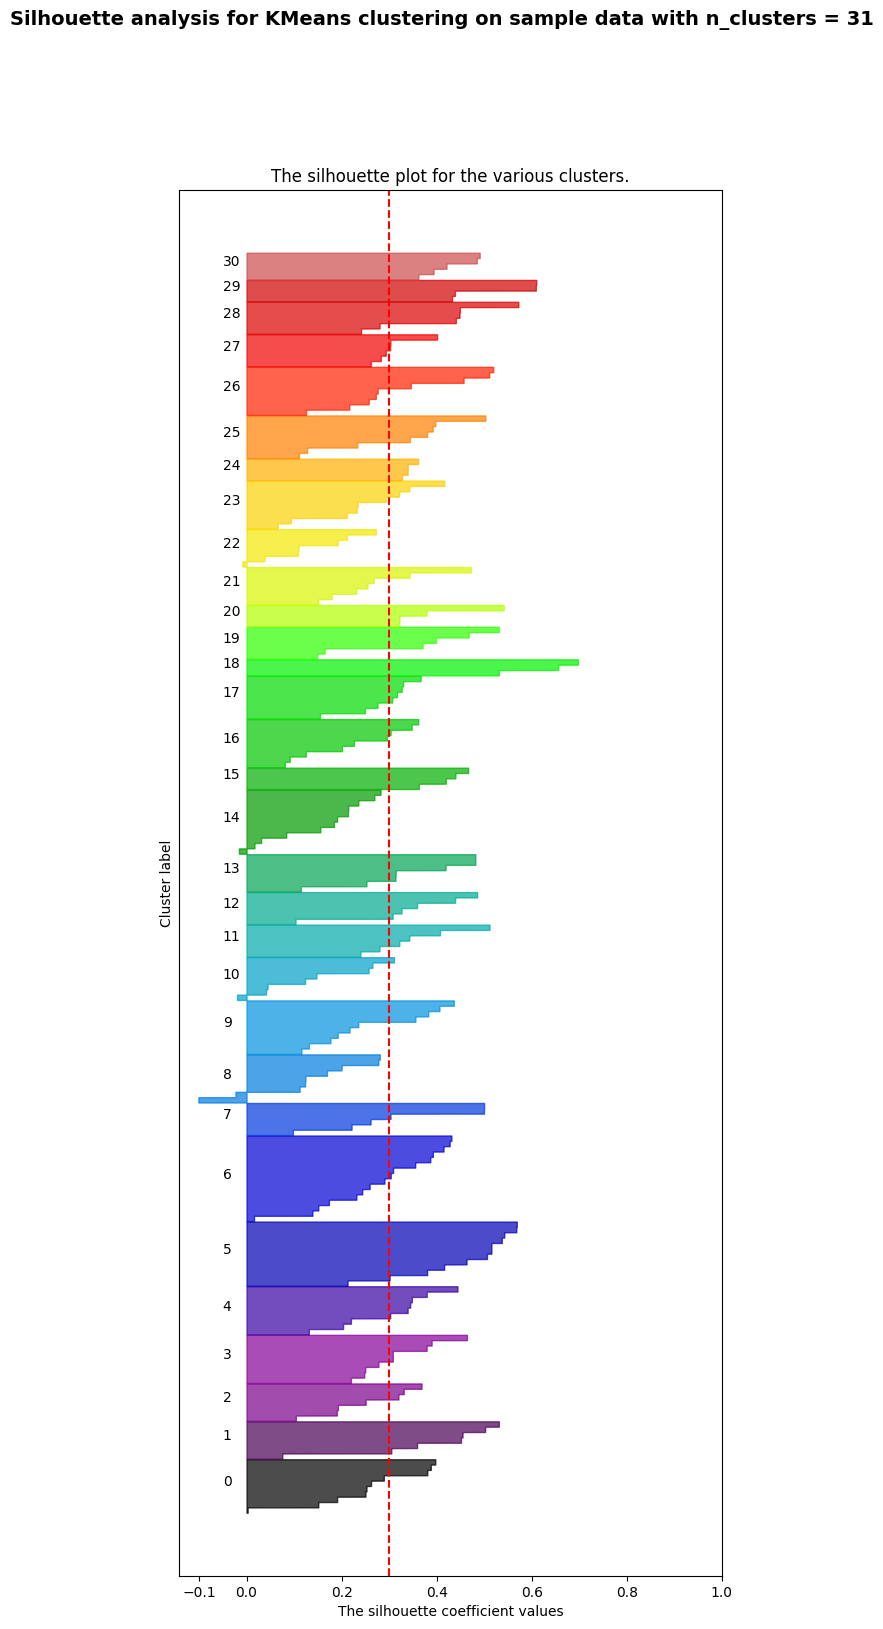

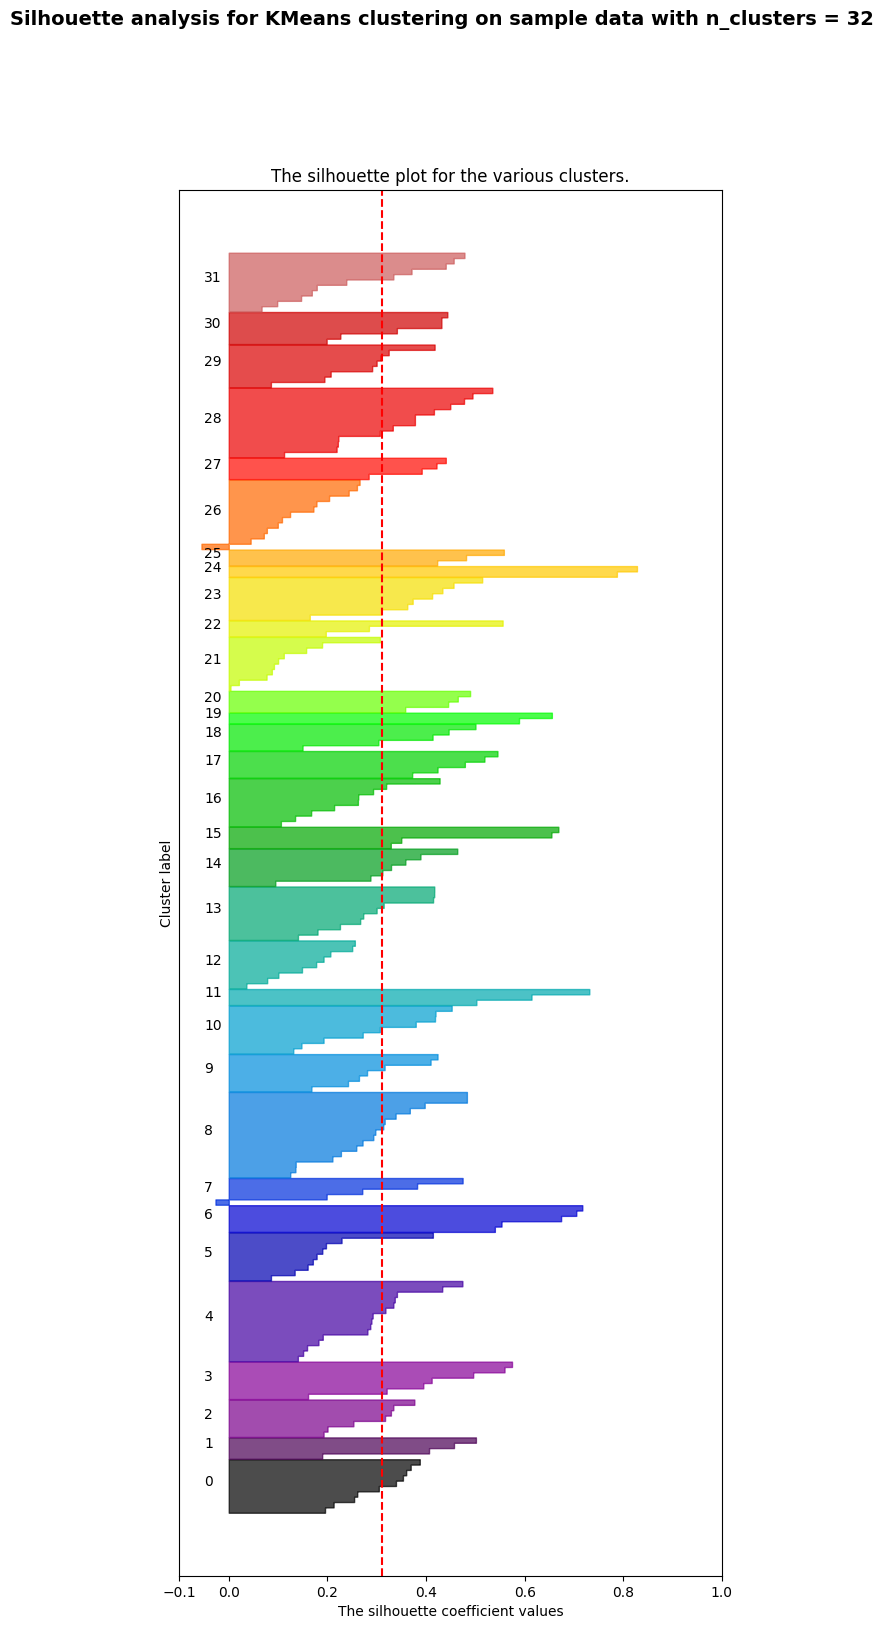

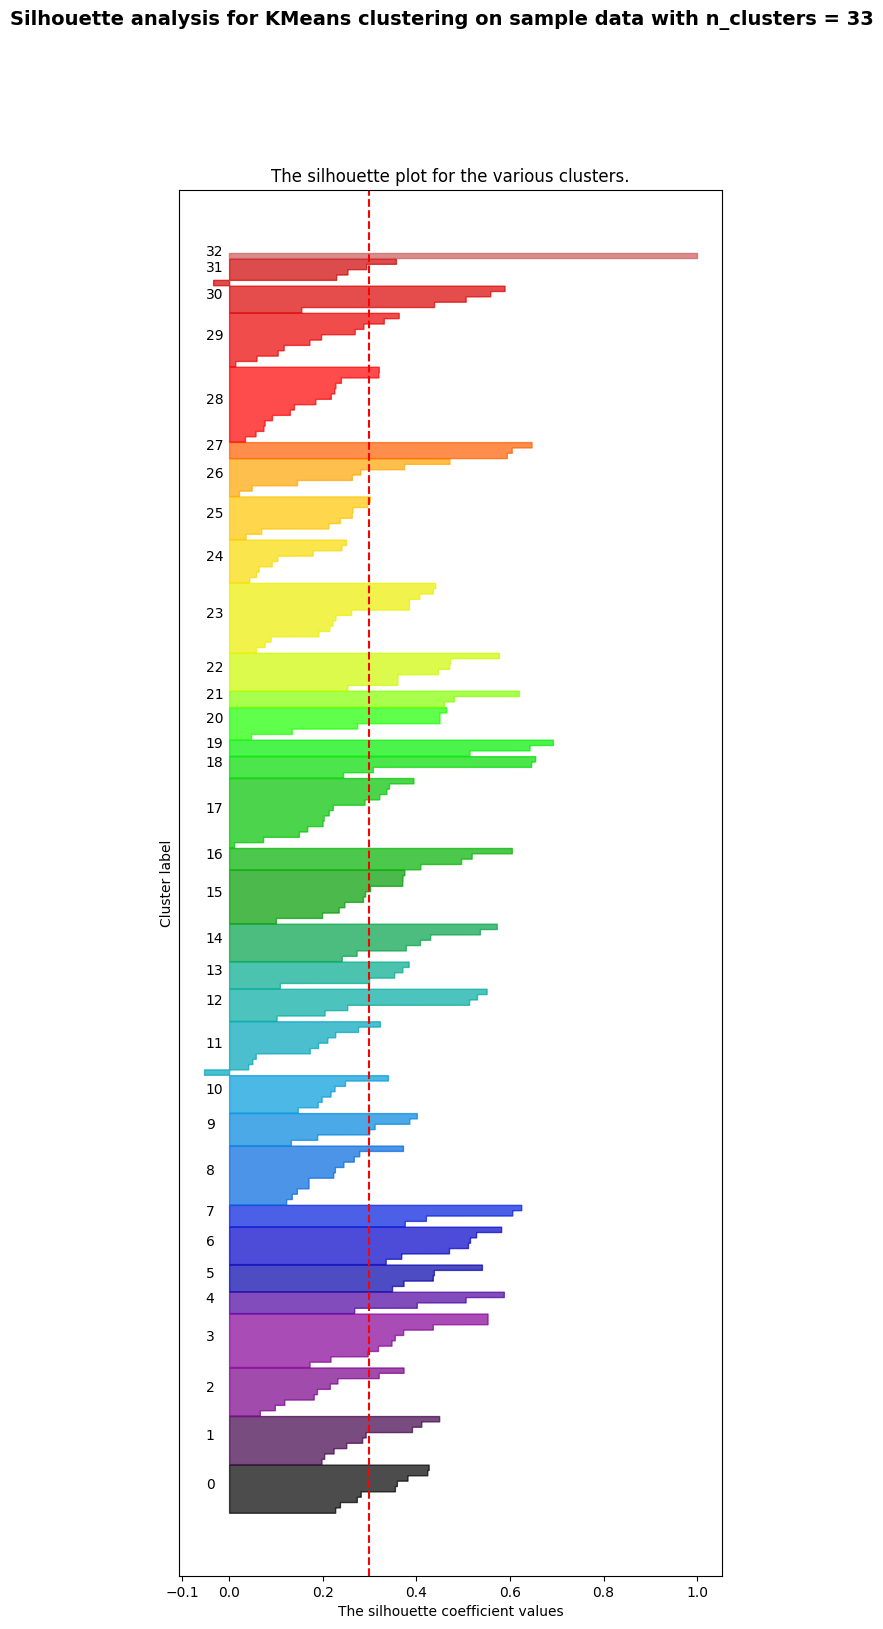

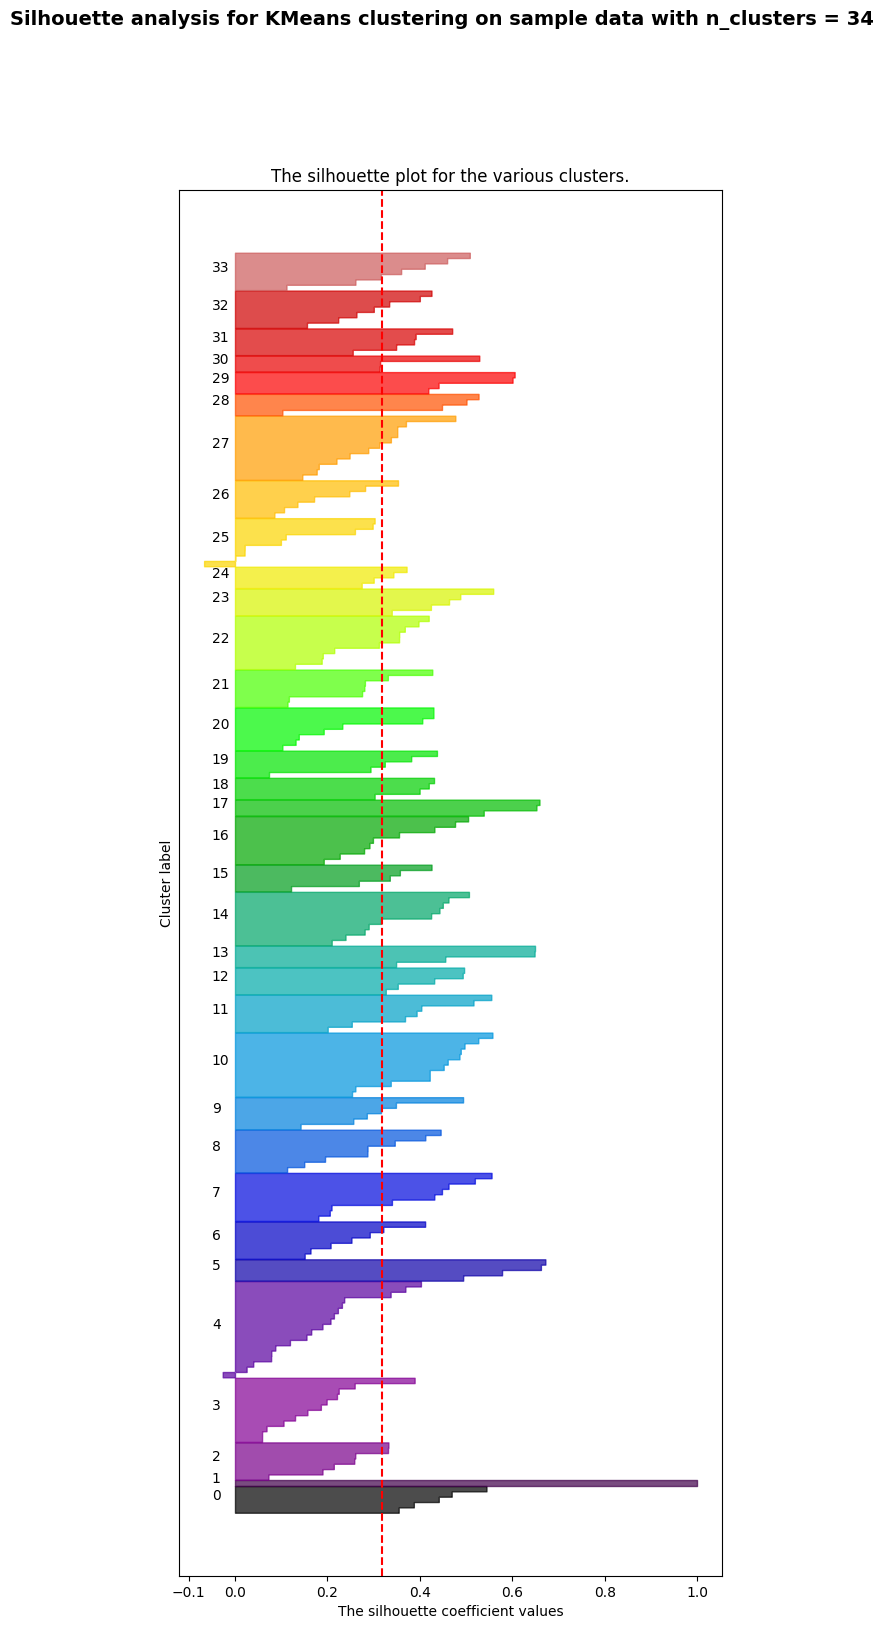

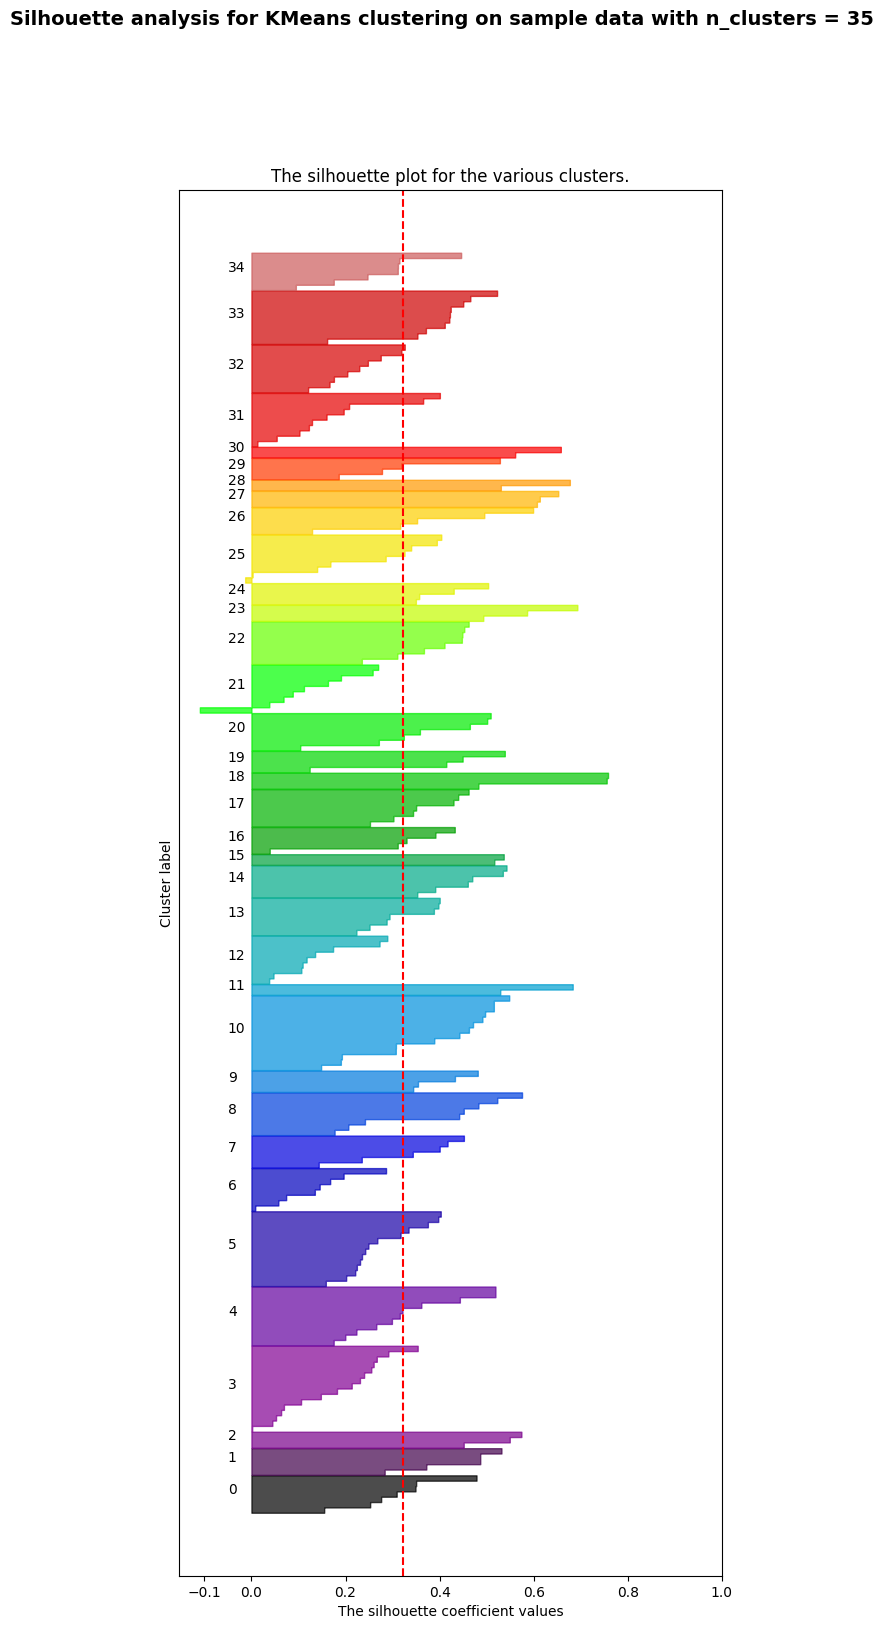

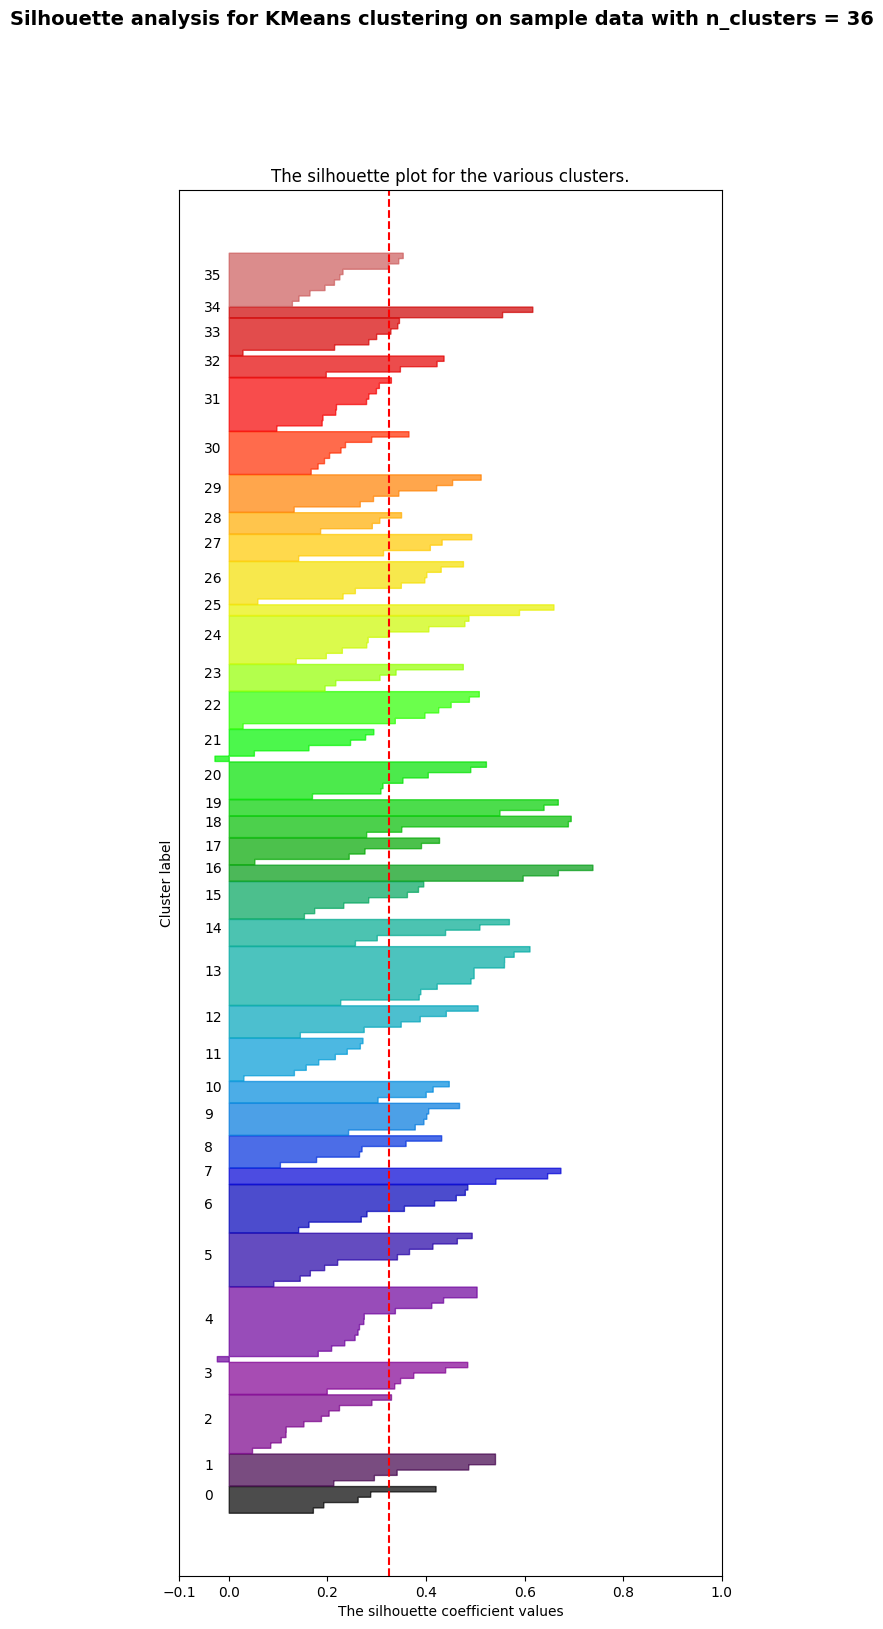

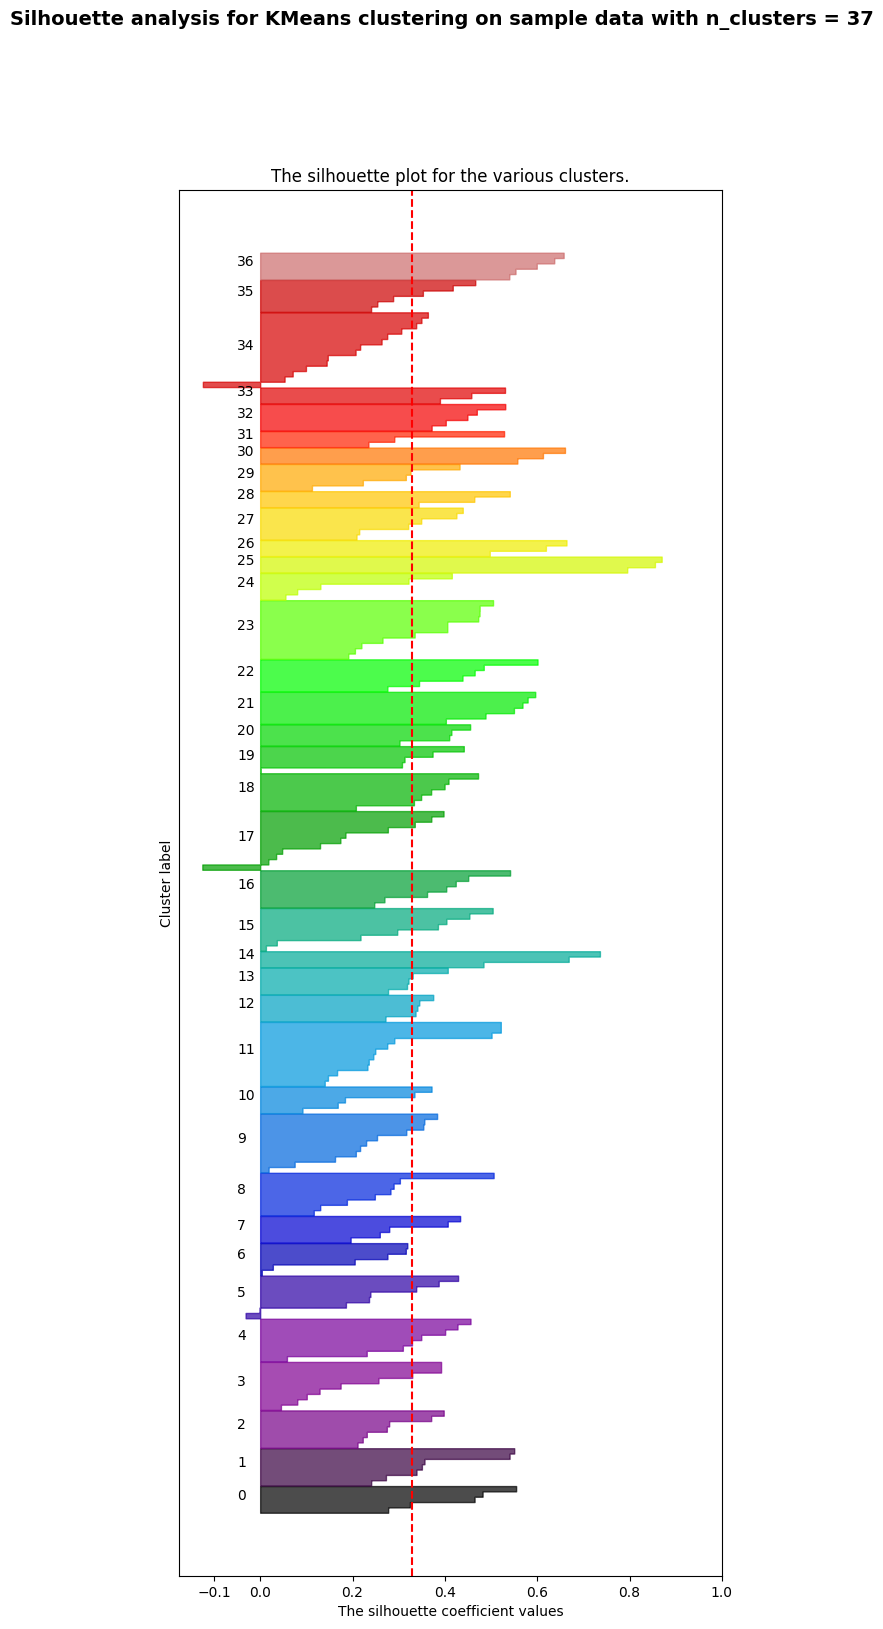

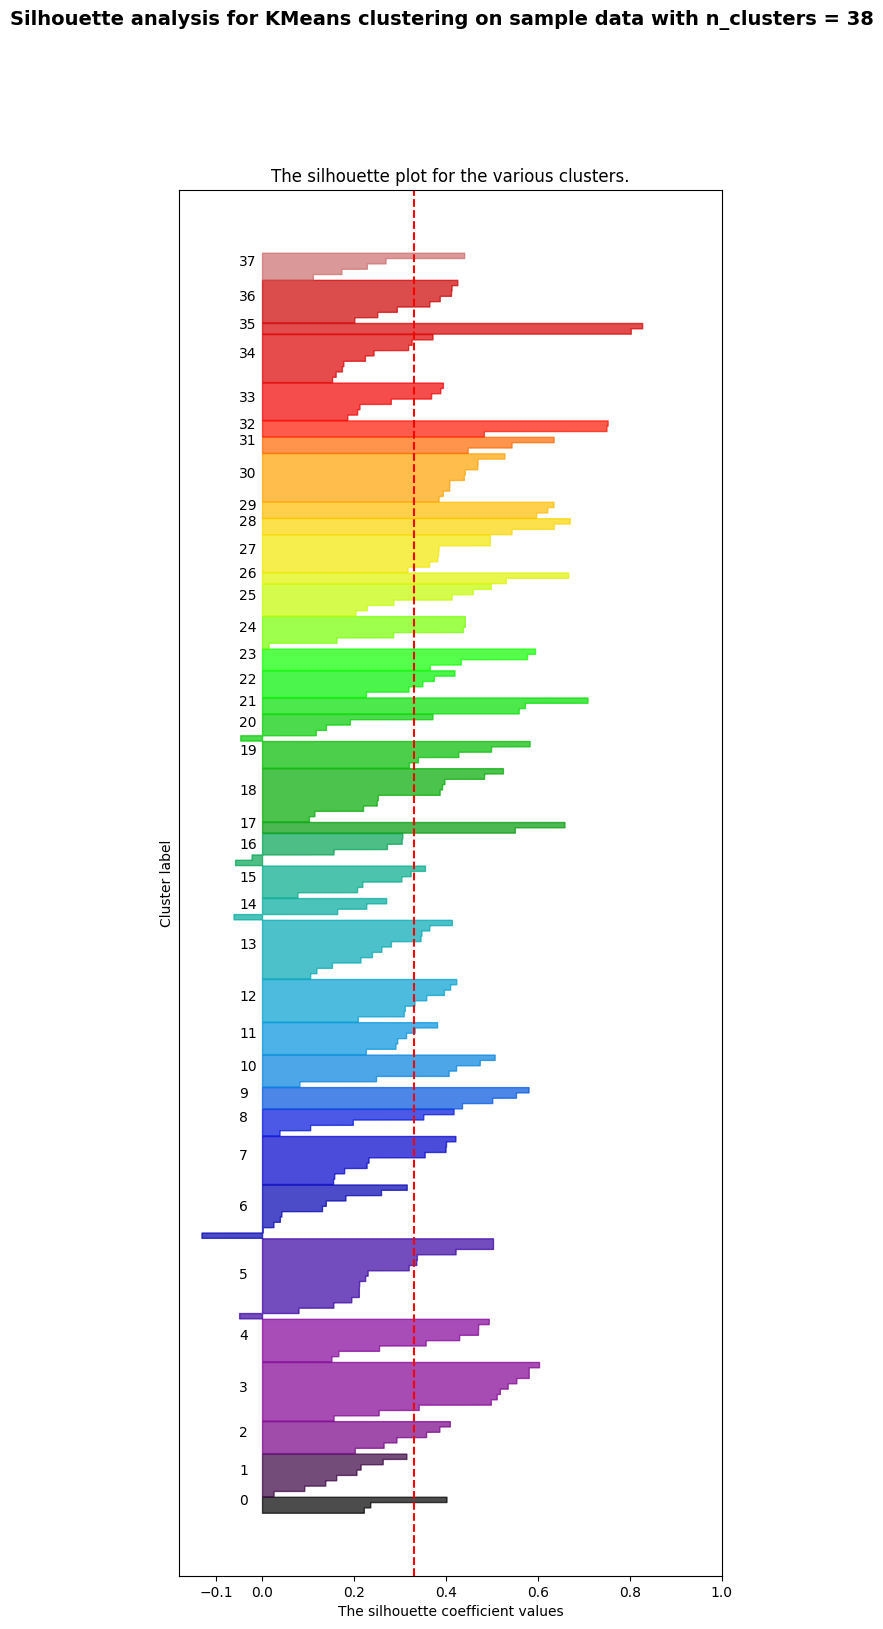

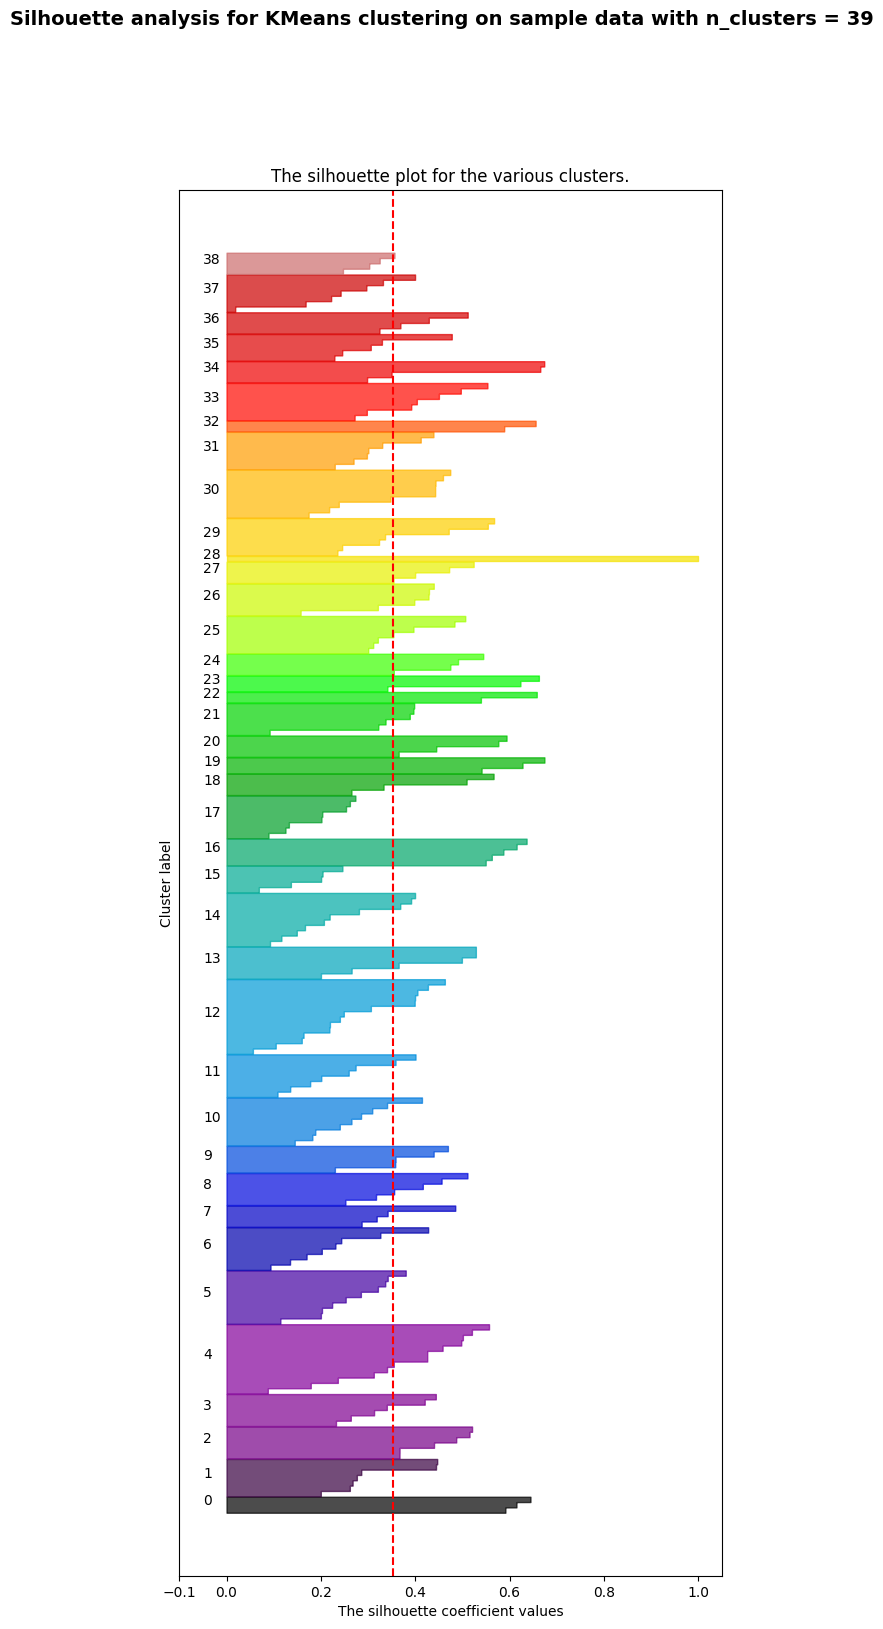

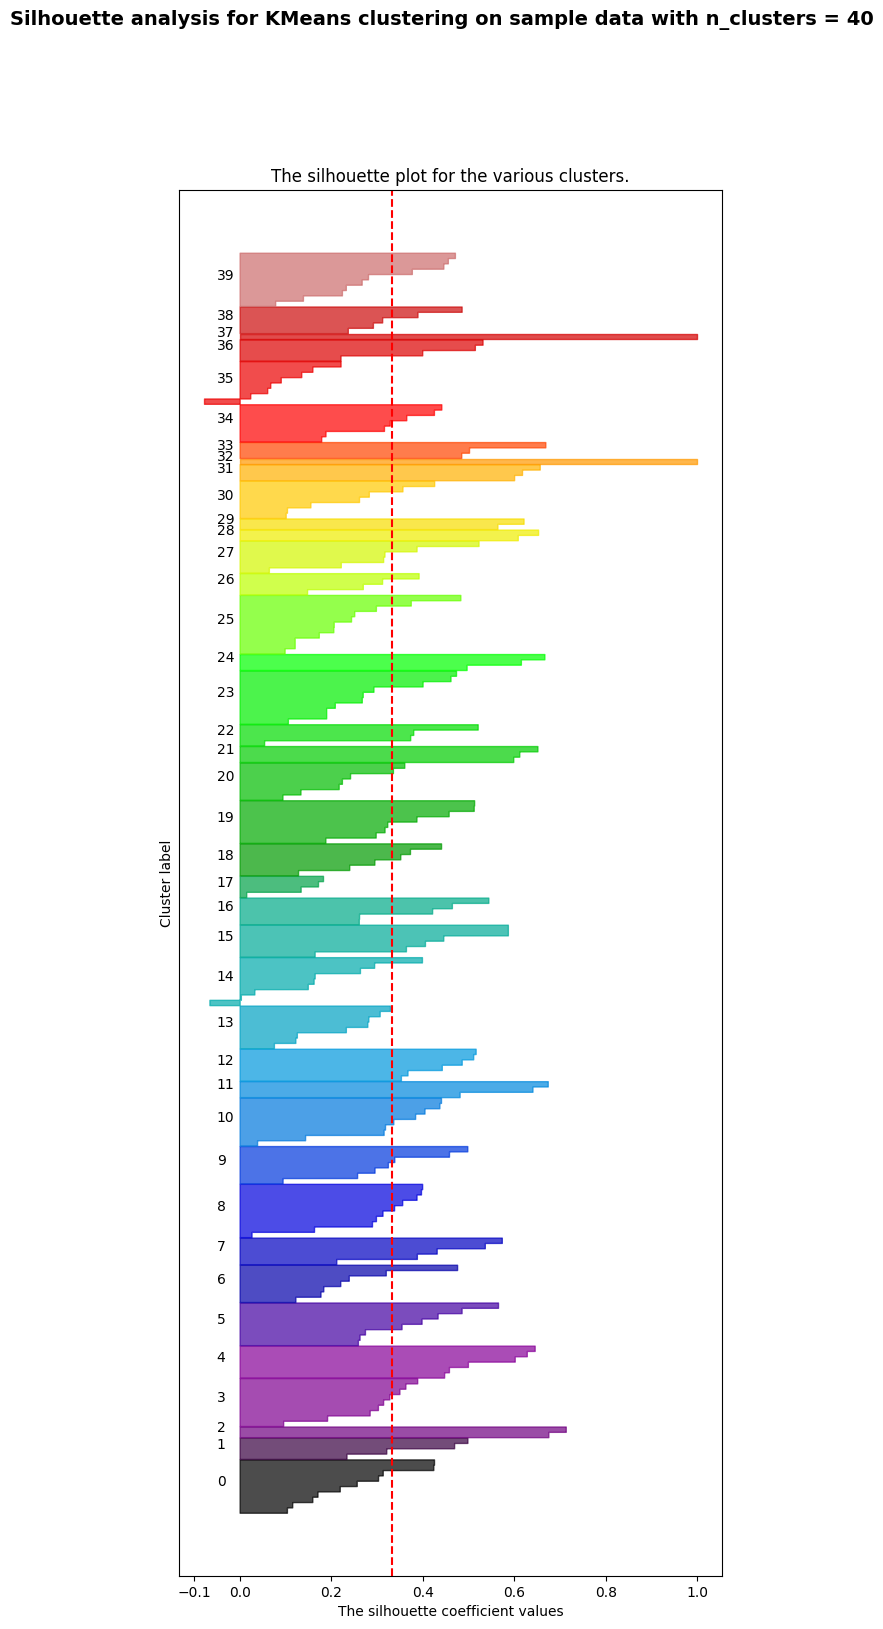

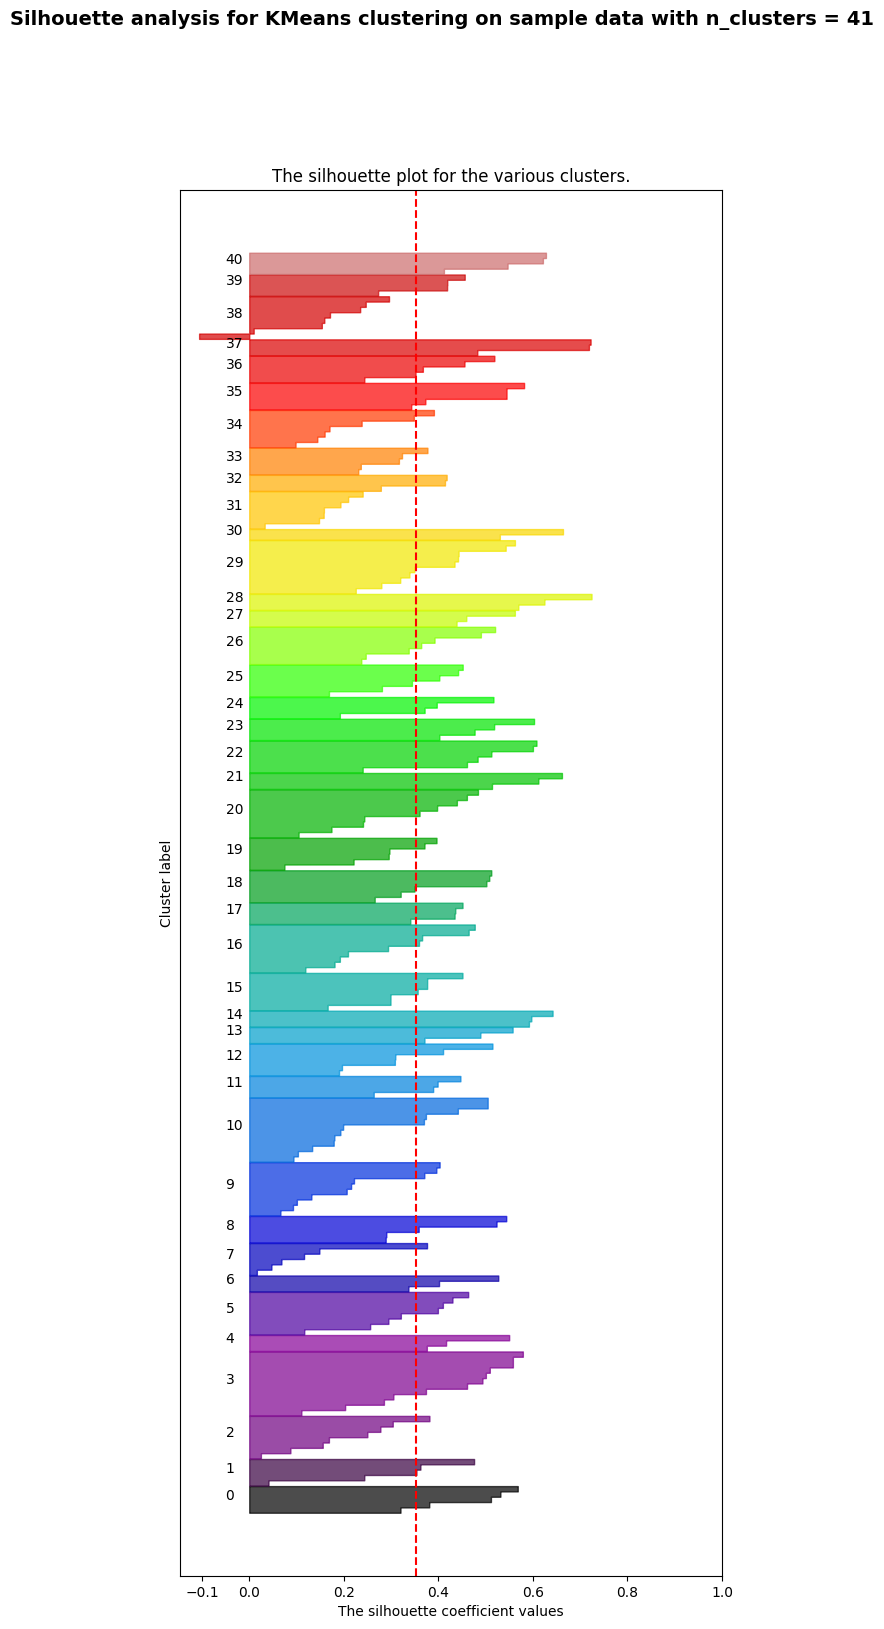

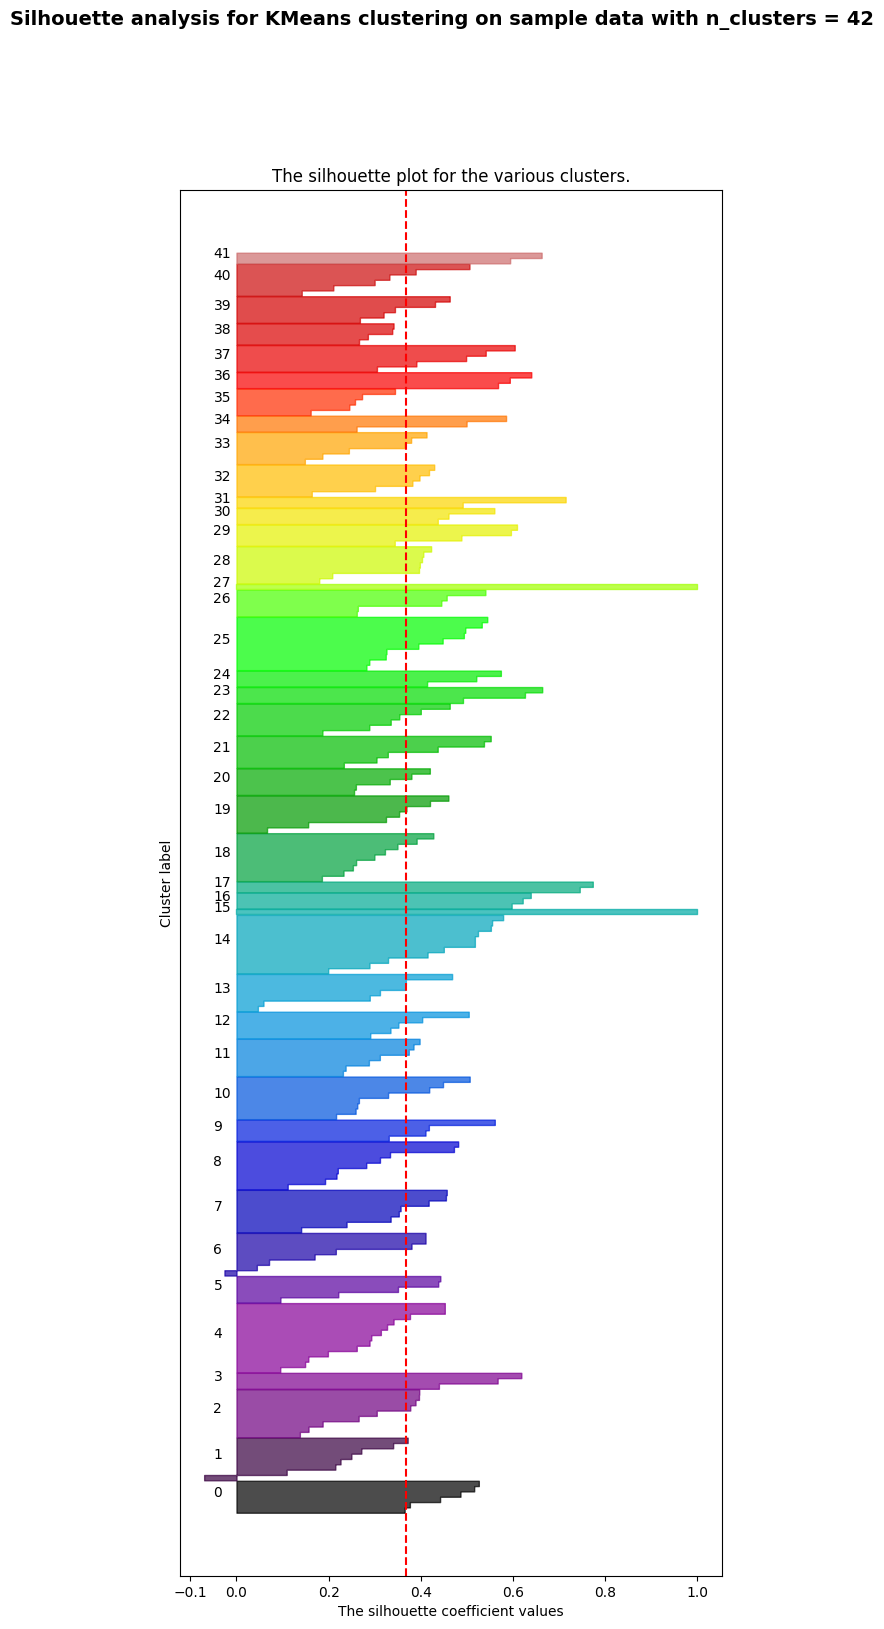

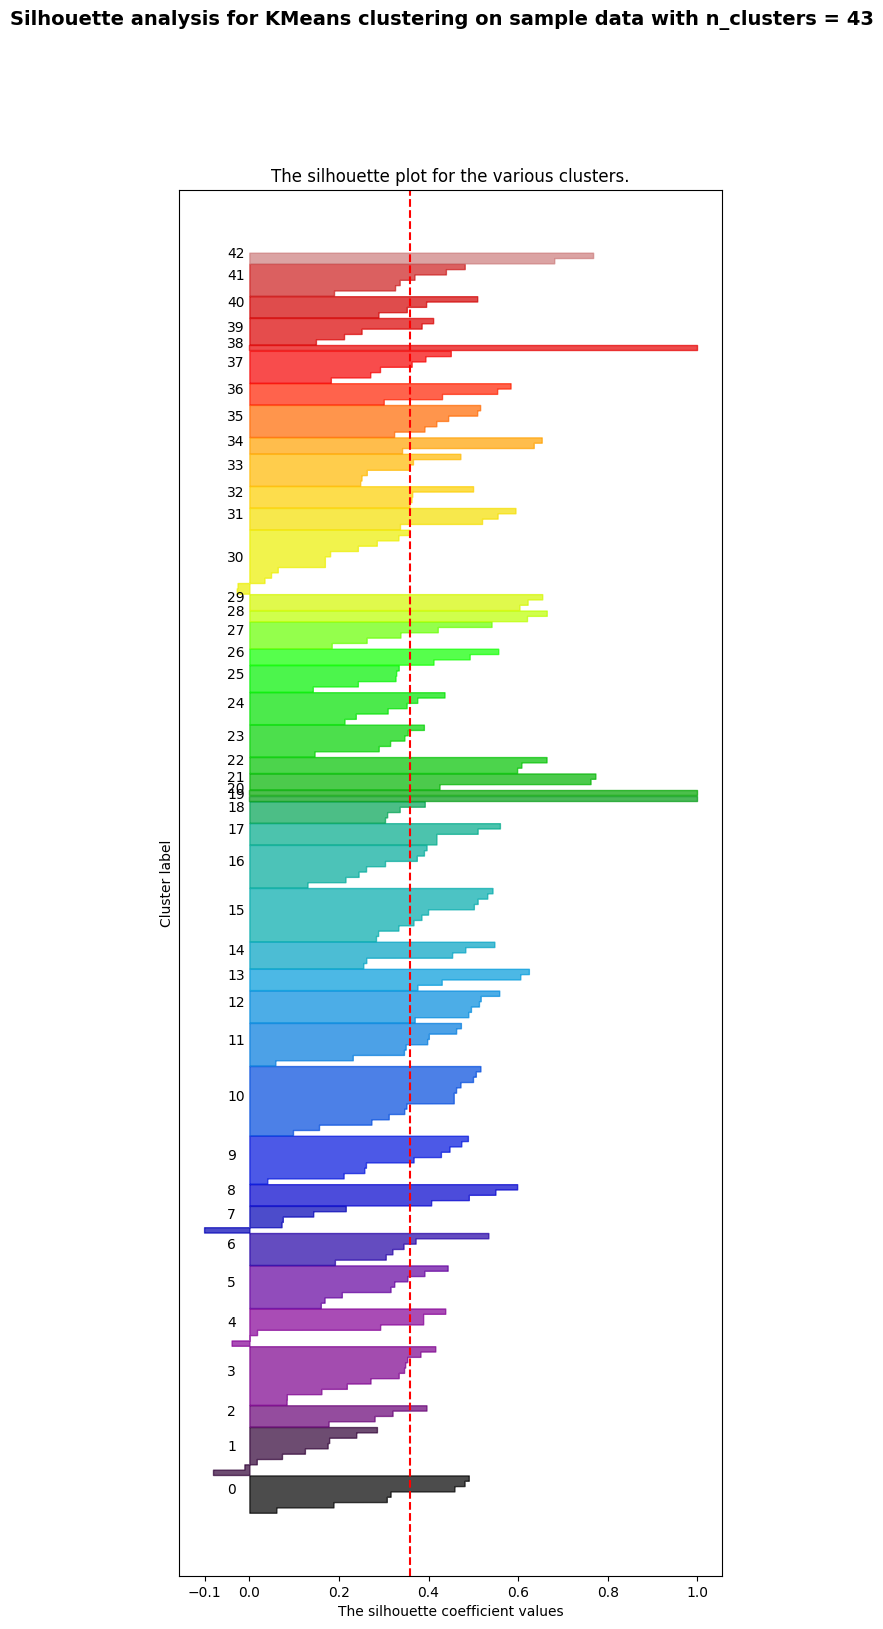

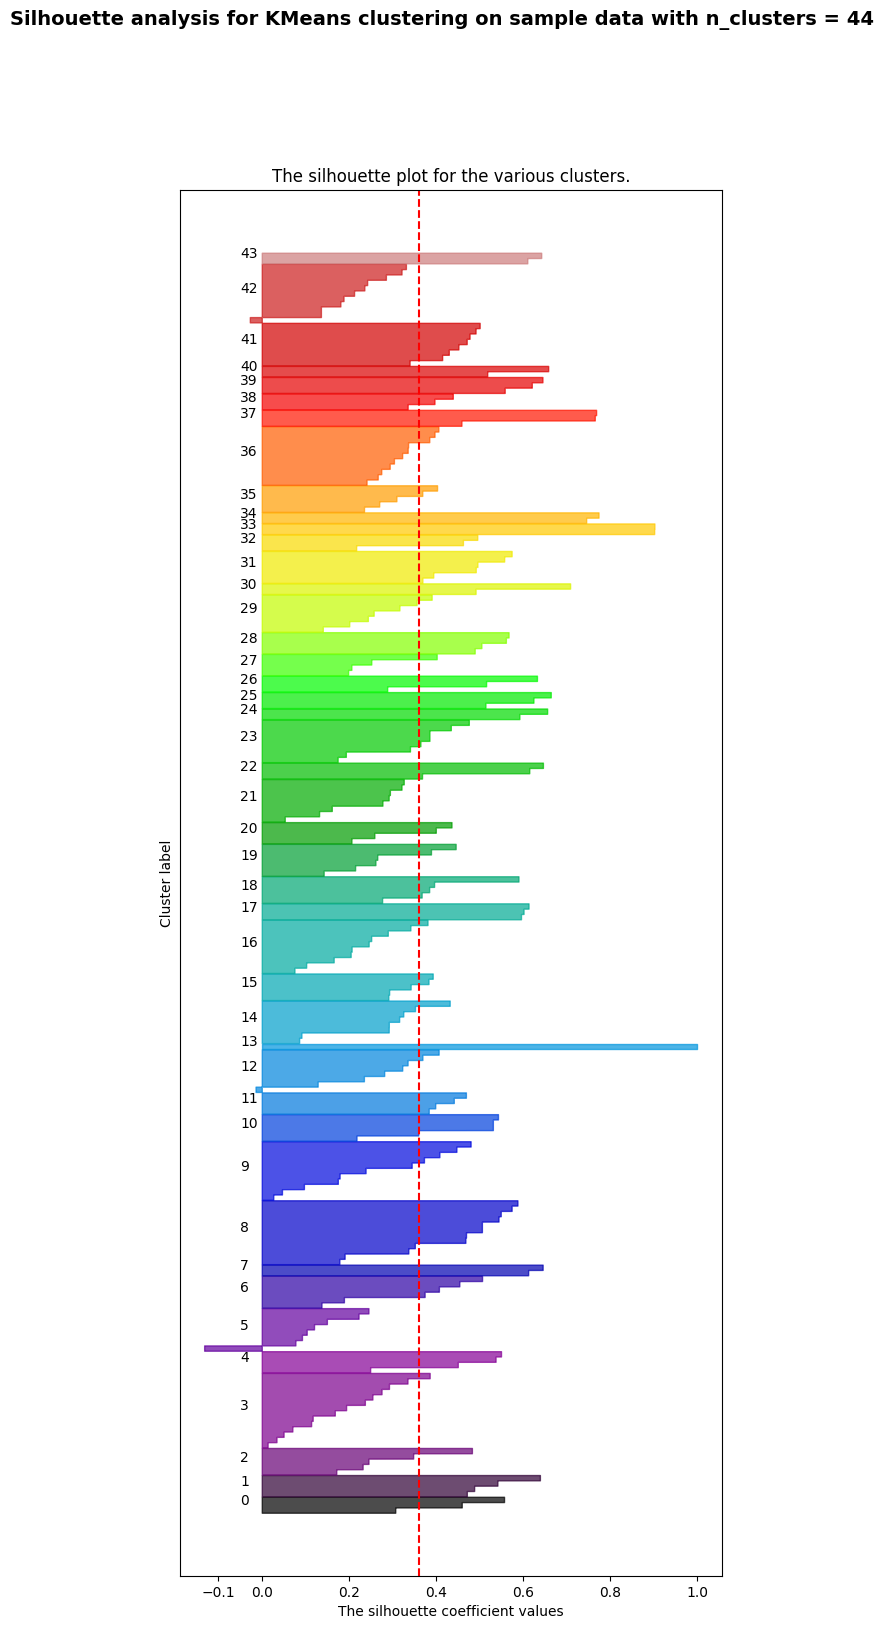

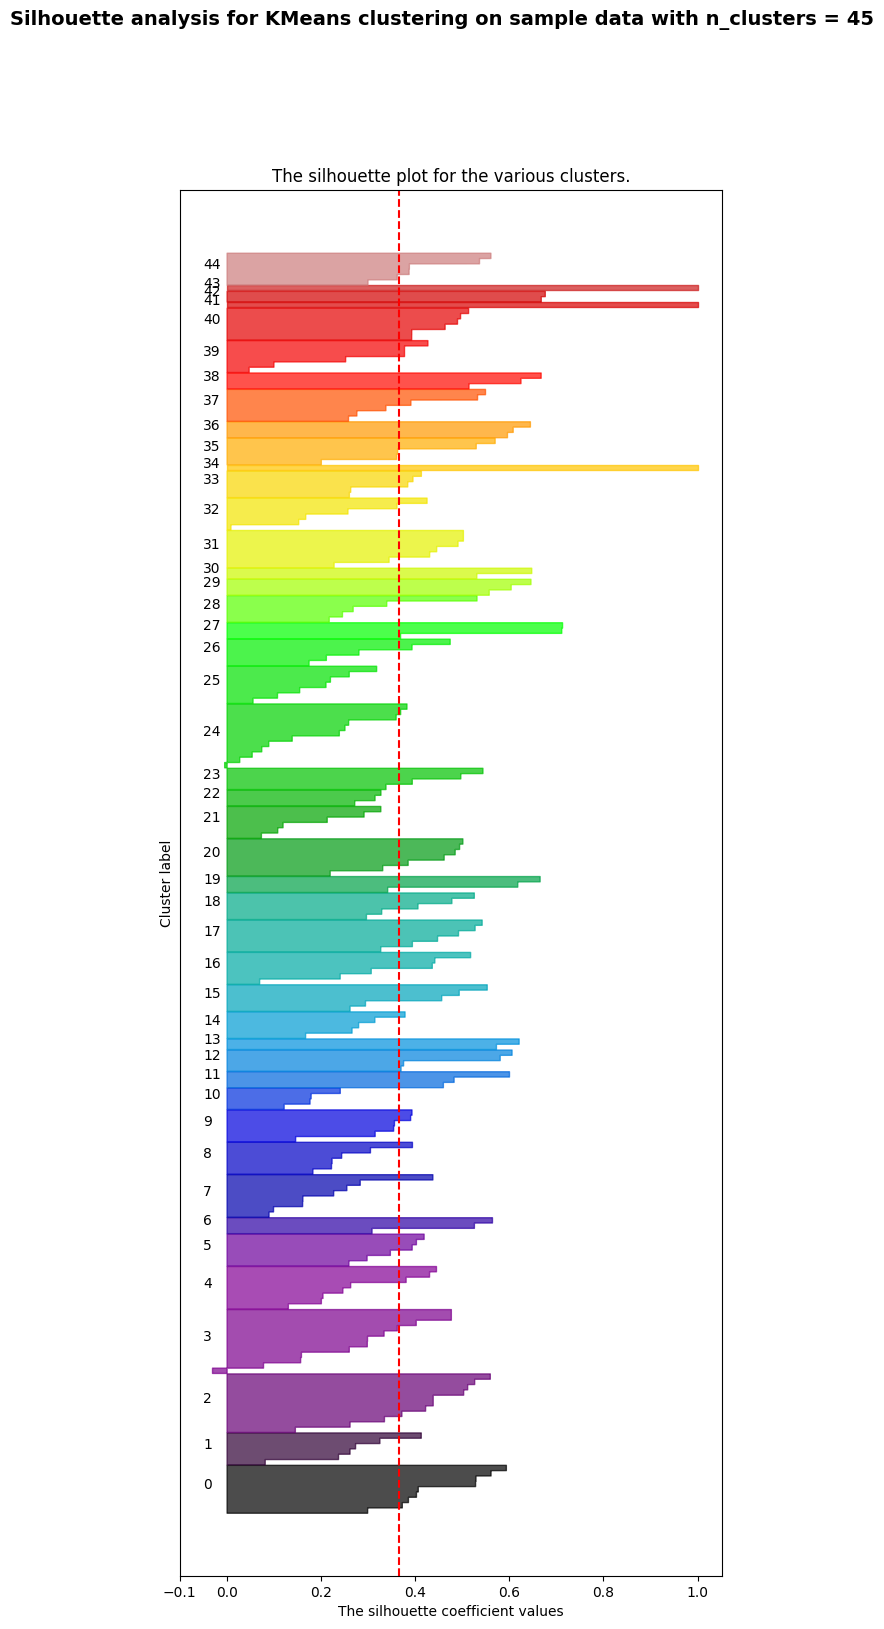

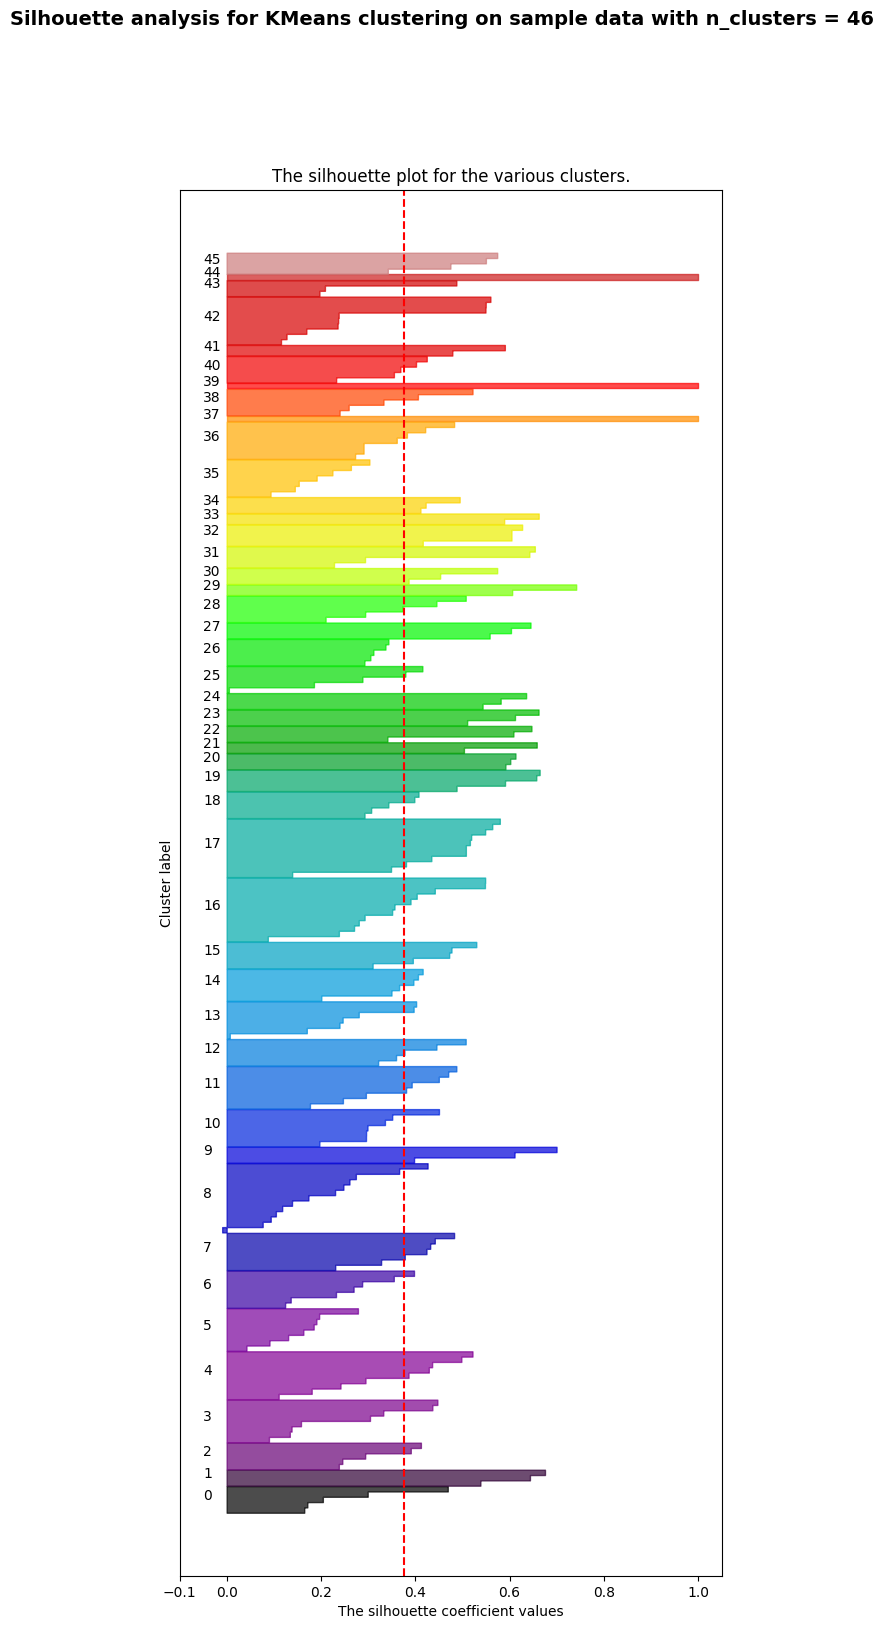

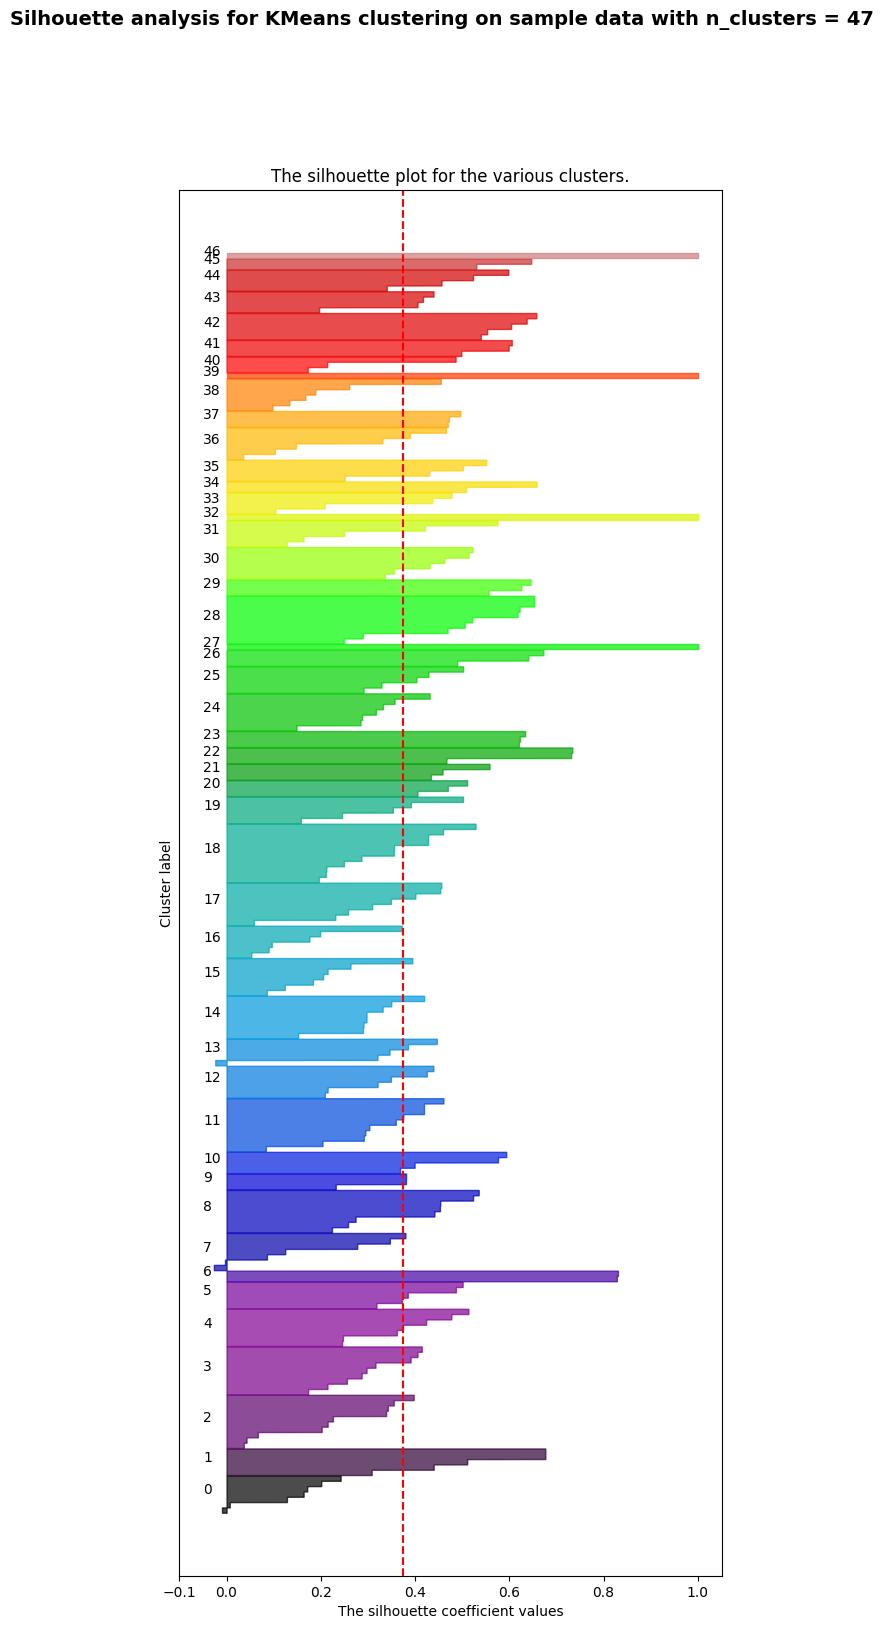

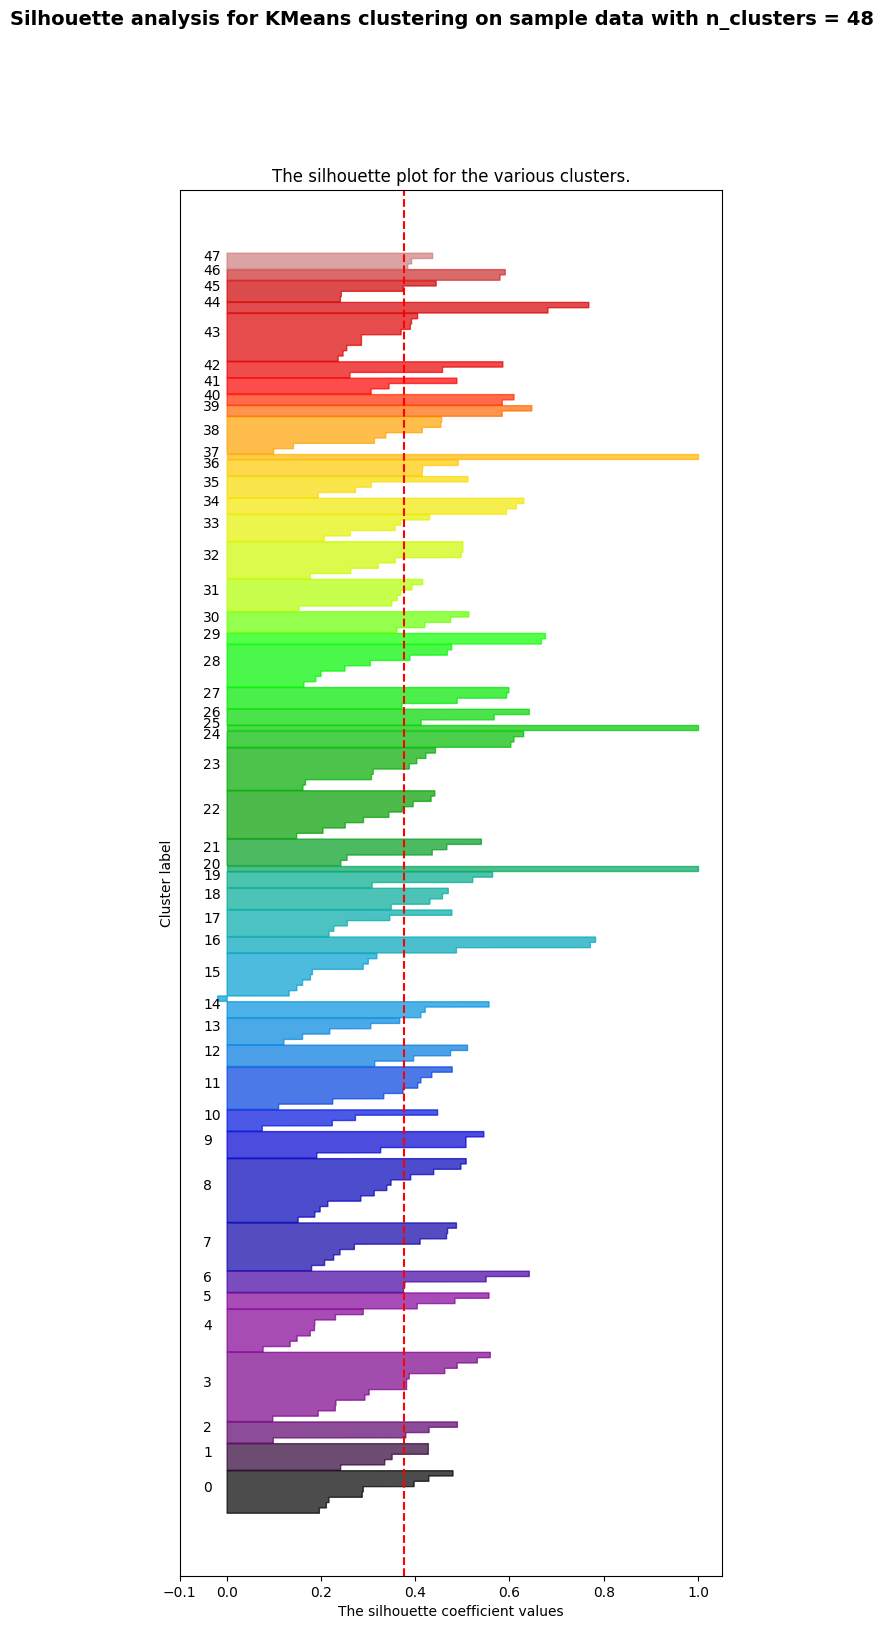

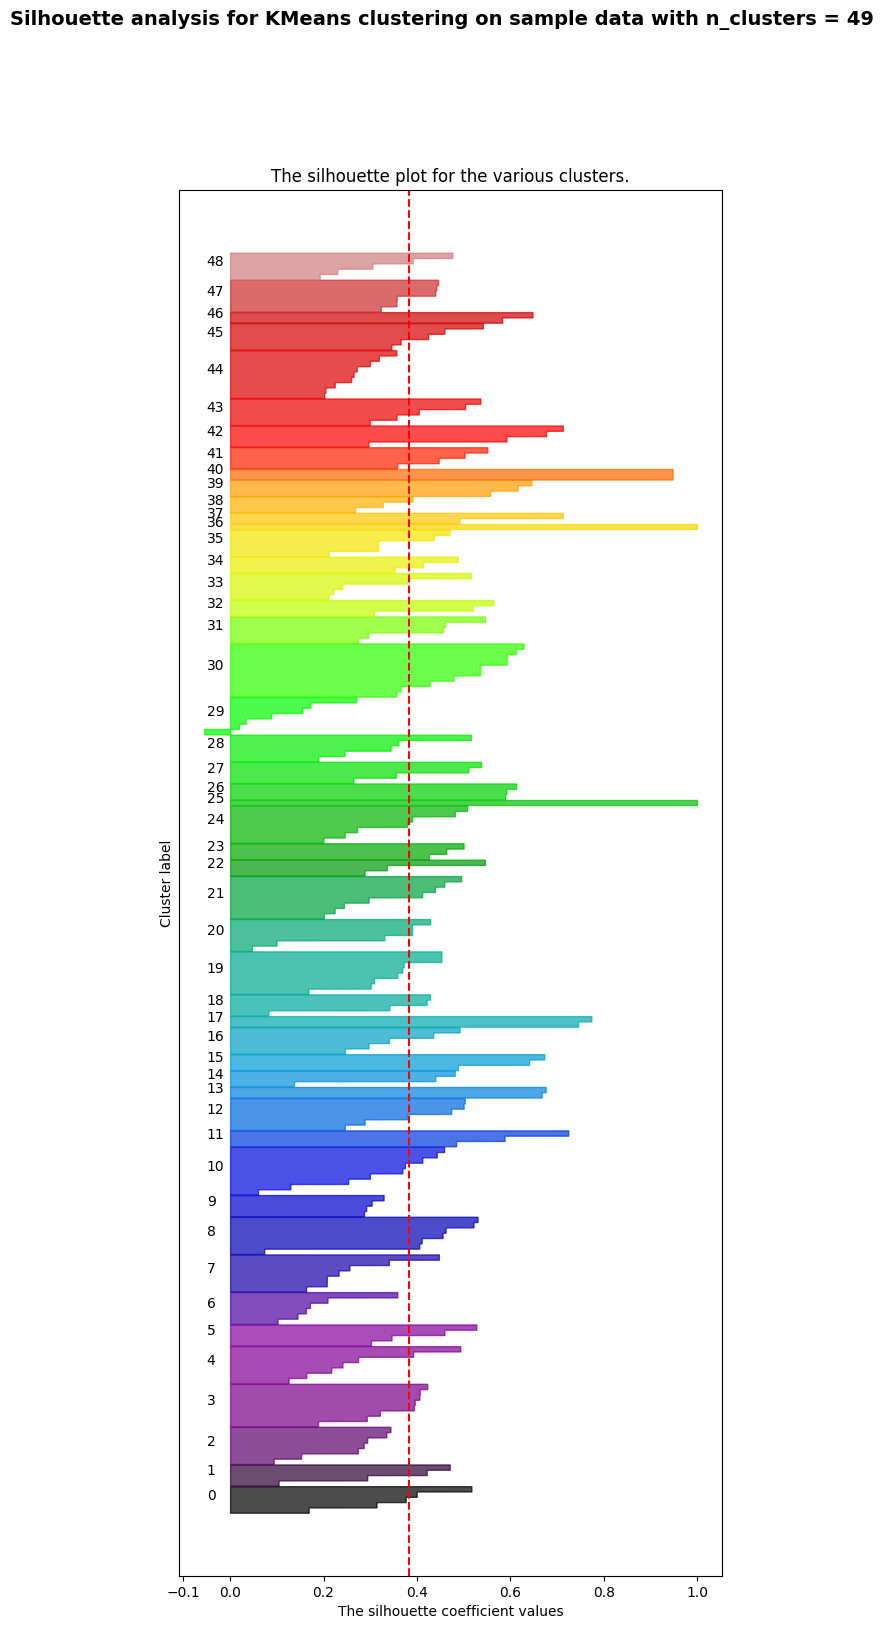

In [106]:


# # Train k-means
# kmeans = KMeans(n_clusters=5, random_state=42) # You can change the number of clusters
# kmeans.fit(X)

# # Get cluster centers
# centers = kmeans.cluster_centers_

# # Print the common color combinations
# for center in centers:
#     print("Primal Color: R:", int(center[0]), "G:", int(center[1]), "B:", int(center[2]))
#     print("Secondary Color: R:", int(center[3]), "G:", int(center[4]), "B:", int(center[5]))
#     print()


rgb_r_main_col  rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col  \
retailweek                                                                  
2014-12-28           205.0           155.0           155.0          245.0   
2014-12-28             0.0           104.0           139.0           95.0   
2014-12-28             0.0           154.0           205.0          245.0   
2014-12-28           205.0           173.0             0.0          205.0   
2014-12-28           115.0           115.0           115.0            0.0   
...                    ...             ...             ...            ...   
2017-04-30           188.0           238.0           104.0          255.0   
2017-04-30           164.0           211.0           238.0          255.0   
2017-04-30           180.0           238.0           180.0          255.0   
2017-04-30           248.0           248.0           255.0          209.0   
2017-04-30           174.0           238.0           238.0          139.0   

            rgb_g_sec_col  rgb_b_sec_col  
retailweek                                
2014-12-28          245.0          245.0  
2014-12-28          158.0          160.0  
2014-12-28          245.0          245.0  
2014-12-28          183.0          158.0  
2014-12-28          205.0            0.0  
...                   ...            ...  
2017-04-30          140.0          105.0  
2017-04-30          255.0          240.0  
2017-04-30          250.0          240.0  
2017-04-30          238.0          238.0  
2017-04-30           76.0           57.0  

[28782 rows x 6 columns]

In [111]:
import webcolors

In [118]:
def get_nearest_color(rgb):
    min_colors={}
    for key, name in webcolors.CSS21_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb[0])**2
        gd = (g_c) - rgb[1]**2
        bd = (b_c) - rgb[2]**2
        min_colors[(rd+gd+bd)] = name
    return min_colors[min(min_colors.keys())]

In [121]:
def get_closest_first_color(df):
    r,g,b = df['rgb_r_main_col'], df['rgb_g_main_col'],	df['rgb_b_main_col']
    return get_nearest_color([r,g,b])

def get_closest_sec_color(df):
    r,g,b = df['rgb_r_sec_col'], df['rgb_g_sec_col'],	df['rgb_b_sec_col']
    return get_nearest_color([r,g,b])
tmp=df_countries[1].copy()

tmp["main_color"] = tmp.apply(get_closest_first_color,axis=1)
tmp["sec_color"] = tmp.apply(get_closest_sec_color,axis=1)


In [123]:

tmp['main_color'].unique()

array(['silver', 'black', 'maroon', 'red', 'orange'], dtype=object)

In [138]:
tmp["category"].value_counts()

category
TRAINING              9348
RUNNING               6027
FOOTBALL GENERIC      3690
OUTDOOR               2337
FOOTBALL LICENSED     2091
SWIM                  1599
TENNIS                1599
INDOOR                1107
GOLF                   369
ACTION SPORTS          246
PORSCHE                123
BASKETBALL GENERIC     123
Name: count, dtype: int64

In [130]:
from sklearn.preprocessing import MultiLabelBinarizer
# Load data (assuming the data is in 'article_attributes.txt')
attributes_data = pd.read_csv('../data/01_raw/article_attributes.txt', delimiter=';')

# Split the sizes string into a list of individual sizes
attributes_data['sizes'] = attributes_data['sizes'].apply(lambda x: x.split(','))

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the sizes column
one_hot_sizes = mlb.fit_transform(attributes_data['sizes'])

# Convert one-hot encoded sizes to DataFrame
one_hot_sizes_df = pd.DataFrame(one_hot_sizes, columns=mlb.classes_)

# Concatenate one-hot encoded sizes with original data
final_data = pd.concat([attributes_data.drop('sizes', axis=1), one_hot_sizes_df], axis=1)



In [131]:

one_hot_sizes_df

l  m  s  xl  xs  xxl  xxs
0    1  1  1   1   1    1    1
1    1  1  1   1   1    1    1
2    1  1  1   1   1    1    1
3    1  1  1   1   1    1    1
4    1  1  1   1   1    1    1
..  .. .. ..  ..  ..  ...  ...
471  1  1  1   1   1    1    1
472  1  1  1   1   0    0    0
473  1  1  1   1   1    1    1
474  1  1  1   1   1    1    1
475  1  1  1   1   1    1    1

[476 rows x 7 columns]

In [ ]:
categorical = ['productgroup', 'gender', 'category', 'style', 'sizes']
invariant=['promo1', 'promo2']
target=['sales']
numerical = ['regular_price', 'current_price', 'ratio','rgb_r_main_col', 'rgb_g_main_col','rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col' ]

<Axes: ylabel='Frequency'>

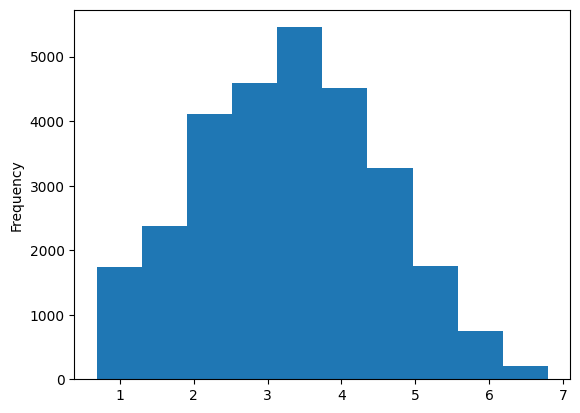

In [141]:
tmp['sales'].apply(np.log1p).plot.hist()

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [134]:

pd.get_dummies(tmp["productgroup"])

HARDWARE ACCESSORIES  PANTS  SHOES  SHORTS  SWEATSHIRTS  T-SHIRTS
retailweek                                                                   
2014-12-28                 False  False  False   False         True     False
2014-12-28                  True  False  False   False        False     False
2014-12-28                 False  False   True   False        False     False
2014-12-28                  True  False  False   False        False     False
2014-12-28                 False  False   True   False        False     False
...                          ...    ...    ...     ...          ...       ...
2017-04-30                 False  False  False    True        False     False
2017-04-30                  True  False  False   False        False     False
2017-04-30                 False  False   True   False        False     False
2017-04-30                  True  False  False   False        False     False
2017-04-30                 False  False   True   False        False     False

[28782 rows x 6 columns]

In [143]:
for i in df_countries:
    print(min(i.index),max(i.index))

2014-12-28 2017-04-30
2014-12-28 2017-04-30
2014-12-28 2017-04-30


In [15]:
import holidays

In [147]:
df_countries[0].index.values[0]

'2014-12-28'

In [18]:

Holidays = {"France":holidays.FR(),"Germany":holidays.DE(), "Austria":holidays.AT()}
def _is_holiday(date,country):
    #print(date,type(date))
    if date in Holidays[country]:
        return True
    return False

In [19]:
result=pd.Series(df_countries[0].index).apply(lambda x: _is_holiday(x,"Germany"))

In [179]:
result

0        0
1        0
2        0
3        0
4        0
        ..
39970    0
39971    0
39972    0
39973    0
39974    0
Name: Holiday, Length: 39975, dtype: int64

In [40]:
result.name="Holiday"
tmp=tmp.reset_index()

In [41]:
pd.concat([result,tmp],axis=1)

Holiday  retailweek  country article  sales  regular_price  \
0        False  2014-12-28  Germany  AA1821     62          31.95   
1        False  2014-12-28  Germany  PQ4964     24           3.95   
2        False  2014-12-28  Germany  GT5685     21         107.95   
3        False  2014-12-28  Germany  VD4566     49          69.95   
4        False  2014-12-28  Germany  KE3772     20           8.95   
...        ...         ...      ...     ...    ...            ...   
39970    False  2017-04-30  Germany  WC1828     20          76.95   
39971    False  2017-04-30  Germany  FE6641    135           6.95   
39972    False  2017-04-30  Germany  AL2298     10          83.95   
39973    False  2017-04-30  Germany  CF4856    221          85.95   
39974    False  2017-04-30  Germany  ZZ2466    109          63.95   

       current_price     ratio  promo1  promo2  ... cost    style  \
0              25.95  0.812207       1       0  ...  3.2     wide   
1               2.95  0.746835       1       0  ...  0.4     wide   
2              62.95  0.583140       1       0  ...  8.5     wide   
3              52.95  0.756969       1       0  ...  7.0     wide   
4               5.95  0.664804       1       0  ...  0.9     wide   
...              ...       ...     ...     ...  ...  ...      ...   
39970          23.95  0.311241       0       0  ...  7.7     wide   
39971           2.95  0.424460       0       0  ...  0.7     wide   
39972          25.95  0.309113       0       0  ...  8.4  regular   
39973          25.95  0.301920       0       0  ...  8.5     slim   
39974          19.95  0.311962       0       0  ...  6.4  regular   

                     sizes  gender rgb_r_main_col rgb_g_main_col  \
0             s,m,l,xl,xxl  unisex          205.0          133.0   
1             s,m,l,xl,xxl   women          250.0          128.0   
2      xxs,xs,s,m,l,xl,xxl   women           84.0          139.0   
3      xxs,xs,s,m,l,xl,xxl    kids          205.0          201.0   
4              xs,s,m,l,xl   women          162.0          181.0   
...                    ...     ...            ...            ...   
39970      xs,s,m,l,xl,xxl   women          205.0          129.0   
39971          xs,s,m,l,xl   women          131.0          139.0   
39972  xxs,xs,s,m,l,xl,xxl     men            0.0          197.0   
39973  xxs,xs,s,m,l,xl,xxl   women          218.0          112.0   
39974  xxs,xs,s,m,l,xl,xxl   women          174.0          238.0   

       rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col  
0                63.0           79.0           79.0           79.0  
1               114.0          238.0          180.0          180.0  
2                84.0          180.0          238.0          180.0  
3               201.0          139.0           10.0           80.0  
4               205.0           54.0           54.0           54.0  
...               ...            ...            ...            ...  
39970            98.0           54.0          100.0          139.0  
39971           131.0          255.0          245.0          238.0  
39972           205.0           36.0           36.0           36.0  
39973           214.0          188.0          238.0          104.0  
39974           238.0          139.0           76.0           57.0  

[39975 rows x 22 columns]

In [168]:
result.name = "Holiday"

In [169]:
result

0        0
1        0
2        0
3        0
4        0
        ..
39970    0
39971    0
39972    0
39973    0
39974    0
Name: Holiday, Length: 39975, dtype: int64

In [34]:
tmp=df_countries[0].copy()

In [171]:
tmp

country article  sales  regular_price  current_price     ratio  \
retailweek                                                                   
2014-12-28  Germany  AA1821     62          31.95          25.95  0.812207   
2014-12-28  Germany  PQ4964     24           3.95           2.95  0.746835   
2014-12-28  Germany  GT5685     21         107.95          62.95  0.583140   
2014-12-28  Germany  VD4566     49          69.95          52.95  0.756969   
2014-12-28  Germany  KE3772     20           8.95           5.95  0.664804   
...             ...     ...    ...            ...            ...       ...   
2017-04-30  Germany  WC1828     20          76.95          23.95  0.311241   
2017-04-30  Germany  FE6641    135           6.95           2.95  0.424460   
2017-04-30  Germany  AL2298     10          83.95          25.95  0.309113   
2017-04-30  Germany  CF4856    221          85.95          25.95  0.301920   
2017-04-30  Germany  ZZ2466    109          63.95          19.95  0.311962   

            promo1  promo2          productgroup          category  cost  \
retailweek                                                                 
2014-12-28       1       0              T-SHIRTS           RUNNING   3.2   
2014-12-28       1       0  HARDWARE ACCESSORIES              SWIM   0.4   
2014-12-28       1       0                 SHOES  FOOTBALL GENERIC   8.5   
2014-12-28       1       0                 PANTS           OUTDOOR   7.0   
2014-12-28       1       0  HARDWARE ACCESSORIES  FOOTBALL GENERIC   0.9   
...            ...     ...                   ...               ...   ...   
2017-04-30       0       0           SWEATSHIRTS           OUTDOOR   7.7   
2017-04-30       0       0  HARDWARE ACCESSORIES              SWIM   0.7   
2017-04-30       0       0                 SHOES           RUNNING   8.4   
2017-04-30       0       0                 SHOES           RUNNING   8.5   
2017-04-30       0       0                 SHOES          TRAINING   6.4   

              style                sizes  gender  rgb_r_main_col  \
retailweek                                                         
2014-12-28     wide         s,m,l,xl,xxl  unisex           205.0   
2014-12-28     wide         s,m,l,xl,xxl   women           250.0   
2014-12-28     wide  xxs,xs,s,m,l,xl,xxl   women            84.0   
2014-12-28     wide  xxs,xs,s,m,l,xl,xxl    kids           205.0   
2014-12-28     wide          xs,s,m,l,xl   women           162.0   
...             ...                  ...     ...             ...   
2017-04-30     wide      xs,s,m,l,xl,xxl   women           205.0   
2017-04-30     wide          xs,s,m,l,xl   women           131.0   
2017-04-30  regular  xxs,xs,s,m,l,xl,xxl     men             0.0   
2017-04-30     slim  xxs,xs,s,m,l,xl,xxl   women           218.0   
2017-04-30  regular  xxs,xs,s,m,l,xl,xxl   women           174.0   

            rgb_g_main_col  rgb_b_main_col  rgb_r_sec_col  rgb_g_sec_col  \
retailweek                                                                 
2014-12-28           133.0            63.0           79.0           79.0   
2014-12-28           128.0           114.0          238.0          180.0   
2014-12-28           139.0            84.0          180.0          238.0   
2014-12-28           201.0           201.0          139.0           10.0   
2014-12-28           181.0           205.0           54.0           54.0   
...                    ...             ...            ...            ...   
2017-04-30           129.0            98.0           54.0          100.0   
2017-04-30           139.0           131.0          255.0          245.0   
2017-04-30           197.0           205.0           36.0           36.0   
2017-04-30           112.0           214.0          188.0          238.0   
2017-04-30           238.0           238.0          139.0           76.0   

            rgb_b_sec_col  
retailweek                 
2014-12-28           79.0  
2014-12-28          180.0  
2014-12-28          18

In [152]:
df_countries[0].country.unique()[0]

'Germany'

In [64]:
def normalise_rgb(df):
    names=df.index
    total_sum = df[names[0]] + df[names[1]] + df[names[2]]
    return  df[names[0]]/total_sum , df[names[1]]/total_sum , df[names[2]]/total_sum

In [69]:
tmp=df_countries[0].filter(regex="(rbg)|(main)")
tmp.apply(normalise_rgb,axis=1).apply(pd.Series).reset_index(drop=True)

0         1         2
0      0.511222  0.331671  0.157107
1      0.508130  0.260163  0.231707
2      0.273616  0.452769  0.273616
3      0.337727  0.331137  0.331137
4      0.295620  0.330292  0.374088
...         ...       ...       ...
39970  0.474537  0.298611  0.226852
39971  0.326683  0.346633  0.326683
39972  0.000000  0.490050  0.509950
39973  0.400735  0.205882  0.393382
39974  0.267692  0.366154  0.366154

[39975 rows x 3 columns]

In [72]:
df_countries[0][tmp.columns] = tmp.apply(normalise_rgb,axis=1).apply(pd.Series).reset_index(drop=True).values

In [73]:
df_countries[0][tmp.columns]

rgb_r_main_col  rgb_g_main_col  rgb_b_main_col
retailweek                                                
2014-12-28        0.511222        0.331671        0.157107
2014-12-28        0.508130        0.260163        0.231707
2014-12-28        0.273616        0.452769        0.273616
2014-12-28        0.337727        0.331137        0.331137
2014-12-28        0.295620        0.330292        0.374088
...                    ...             ...             ...
2017-04-30        0.474537        0.298611        0.226852
2017-04-30        0.326683        0.346633        0.326683
2017-04-30        0.000000        0.490050        0.509950
2017-04-30        0.400735        0.205882        0.393382
2017-04-30        0.267692        0.366154        0.366154

[39975 rows x 3 columns]

In [75]:
tmp=df_countries[0].filter(regex="(rbg)|(sec_col)")
tmp.apply(normalise_rgb,axis=1).apply(pd.Series).reset_index(drop=True)
df_countries[0][tmp.columns] = tmp.apply(normalise_rgb,axis=1).apply(pd.Series).reset_index(drop=True).values
df_countries[0][tmp.columns]

rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col
retailweek                                             
2014-12-28       0.333333       0.333333       0.333333
2014-12-28       0.397993       0.301003       0.301003
2014-12-28       0.301003       0.397993       0.301003
2014-12-28       0.606987       0.043668       0.349345
2014-12-28       0.333333       0.333333       0.333333
...                   ...            ...            ...
2017-04-30       0.184300       0.341297       0.474403
2017-04-30       0.345528       0.331978       0.322493
2017-04-30       0.333333       0.333333       0.333333
2017-04-30       0.354717       0.449057       0.196226
2017-04-30       0.511029       0.279412       0.209559

[39975 rows x 3 columns]

In [77]:
my_tmp=df_countries[0].copy()
my_tmp["sec_color"] = 1

In [80]:
tmp=my_tmp.filter(regex="(rgb.*sec_col)")
tmp

rgb_r_sec_col  rgb_g_sec_col  rgb_b_sec_col
retailweek                                             
2014-12-28       0.333333       0.333333       0.333333
2014-12-28       0.397993       0.301003       0.301003
2014-12-28       0.301003       0.397993       0.301003
2014-12-28       0.606987       0.043668       0.349345
2014-12-28       0.333333       0.333333       0.333333
...                   ...            ...            ...
2017-04-30       0.184300       0.341297       0.474403
2017-04-30       0.345528       0.331978       0.322493
2017-04-30       0.333333       0.333333       0.333333
2017-04-30       0.354717       0.449057       0.196226
2017-04-30       0.511029       0.279412       0.209559

[39975 rows x 3 columns]